# Company Default Data

#### Importing the libraries

In [525]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [526]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 500)


pd.reset_option('display.max_rows') 
pd.reset_option('display.max_columns') 
pd.reset_option('display.width') 

In [527]:
print(pd.get_option("display.max_rows"))
print(pd.get_option("display.max_columns"))
print(pd.get_option("display.width"))

60
20
80


#### Importing the dataset

In [528]:
Default = pd.read_excel('Company_Data2015-2.xlsx')

#Glimpse of Data
Default.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

#### Fixing messy column names (containing spaces) for ease of use

In [529]:
Default.columns = Default.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')

In [530]:
Default.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
      

In [531]:
Default.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0           40.50  ...                0.00               0.00   
1          486.86  ...              -10.30             -39.74   
2         9097.64  ...            -5279.14           -5516.98   
3         1034.12  ...               -3.33              -7.21   
4         4685.81  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

#### First, let us check the number of rows (observations) and the number of columns (variables).

In [532]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Data types of all variables

In [533]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [534]:
Default.duplicated().sum()

0

In [535]:
Default.drop('Co_Code', axis = 1, inplace = True)

#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [536]:
Default.describe().T

count         mean           std      min  \
Networth_Next_Year               3586.0   725.045251   4769.681004 -8021.60   
Equity_Paid_Up                   3586.0    62.966584    778.761744     0.00   
Networth                         3586.0   649.746299   4091.988792 -7027.48   
Capital_Employed                 3586.0  2799.611054  26975.135385 -1824.75   
Total_Debt                       3586.0  1994.823779  23652.842746    -0.72   
...                                 ...          ...           ...      ...   
Debtors_Velocity_Days            3586.0   603.894032  10636.759580     0.00   
Creditors_Velocity_Days          3586.0  2057.854992  54169.479197     0.00   
Inventory_Velocity_Days          3483.0    79.644559    137.847792  -199.00   
Value_of_Output_by_Total_Assets  3586.0     0.819757      1.201400    -0.33   
Value_of_Output_by_Gross_Block   3586.0    61.884548    976.824352   -61.00   

                                    25%     50%       75%         max  
Networth_Next_Year               3.9850  19.015  123.8025   111729.10  
Equity_Paid_Up                   3.7500   8.290   19.5175    42263.46  
Networth                         3.8925  18.580  117.2975    81657.35  
Capital_Employed                 7.6025  39.090  226.6050   714001.25  
Total_Debt                       0.0300   7.490   72.3500   652823.81  
...                                 ...     ...       ...         ...  
Debtors_Velocity_Days            8.0000  49.000  106.0000   514721.00  
Creditors_Velocity_Days          8.0000  39.000   89.0000  2034145.00  
Inventory_Velocity_Days          0.0000  35.000   96.0000      996.00  
Value_of_Output_by_Total_Assets  0.0700   0.480    1.1600       17.63  
Value_of_Output_by_Gross_Block   0.2700   1.530    4.9100    43404.00  

[65 rows x 8 columns]

### Missing Values

In [537]:
missing_obj = Default.isnull().sum()
for key,value in missing_obj.iteritems():
    if value > 0:
        print(key,":",value)

Book_Value_Adj_Unit_Curr : 4
Current_Ratio_Latest : 1
Fixed_Assets_Ratio_Latest : 1
Inventory_Ratio_Latest : 1
Debtors_Ratio_Latest : 1
Total_Asset_Turnover_Ratio_Latest : 1
Interest_Cover_Ratio_Latest : 1
PBIDTM_perc_Latest : 1
PBITM_perc_Latest : 1
PBDTM_perc_Latest : 1
CPM_perc_Latest : 1
APATM_perc_Latest : 1
Inventory_Velocity_Days : 103


### 1.1 Outlier Treatment

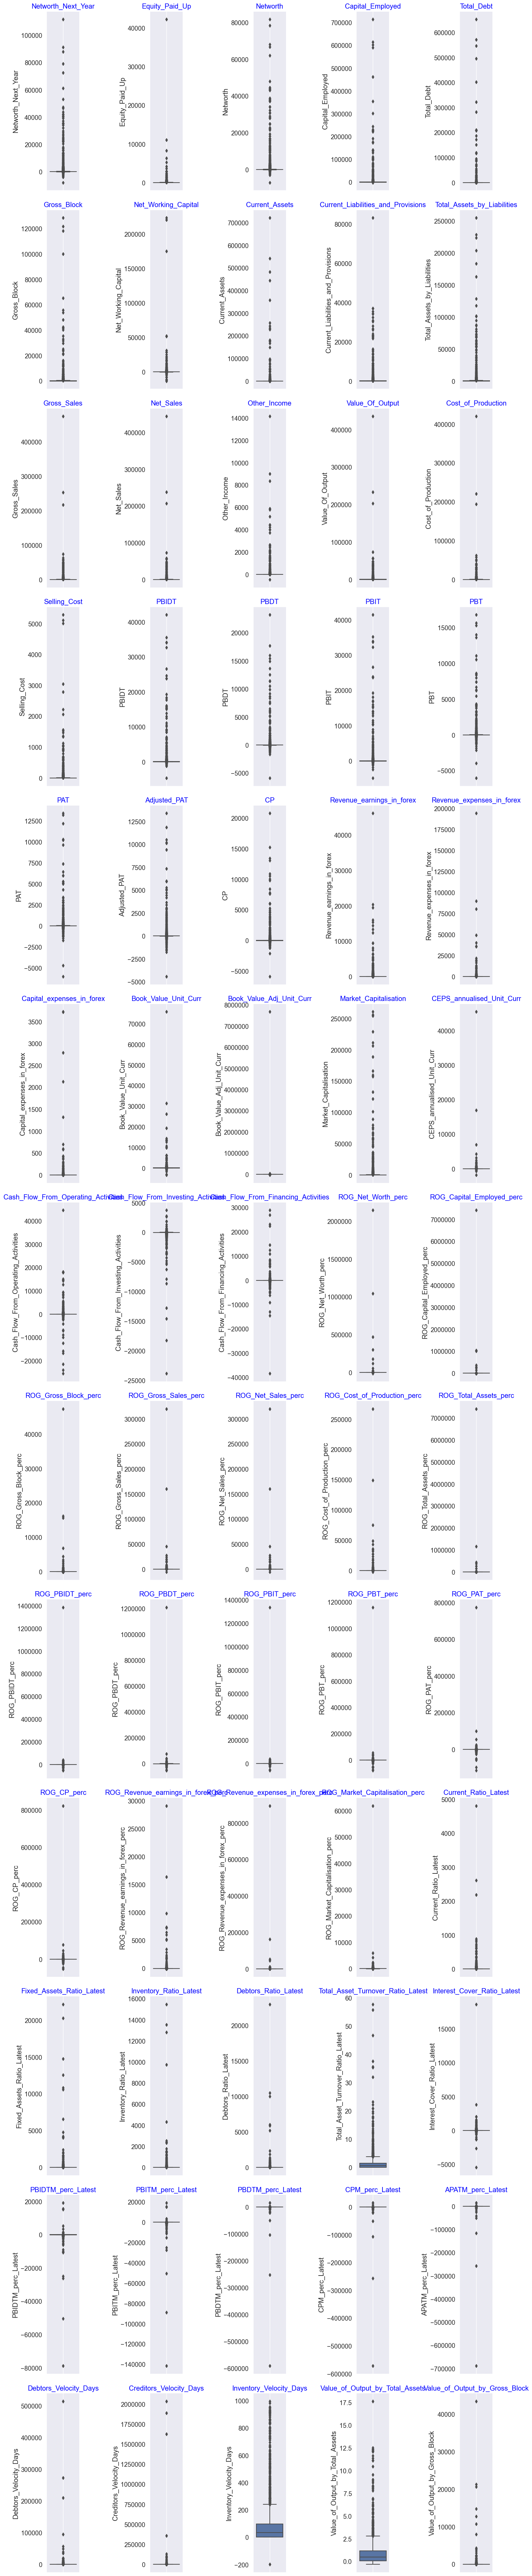

In [538]:
continuous=Default.dtypes[(Default.dtypes=='int64')|(Default.dtypes=='float64')].index
data_plot=Default[continuous]
# construct box plot for continuous variables
fig=plt.figure(figsize=(15,75))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

In [539]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [540]:
for feature in data_plot: 
    lr,ur=treat_outlier(Default[feature])
    Default[feature]=np.where(Default[feature]>ur,ur,Default[feature])
    Default[feature]=np.where(Default[feature]<lr,lr,Default[feature])

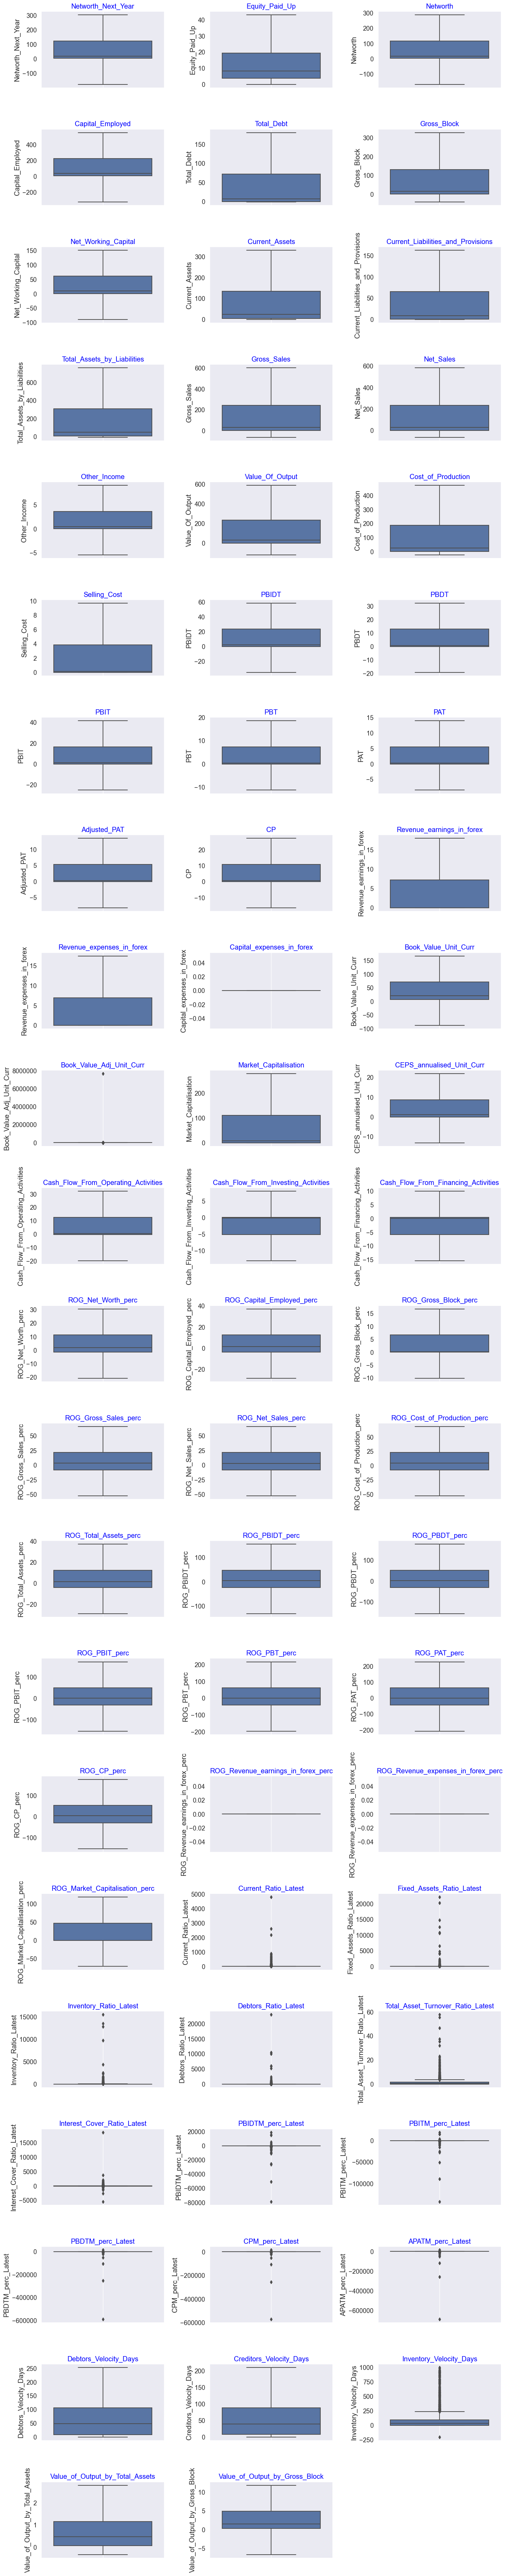

In [541]:
continuous=Default.dtypes[(Default.dtypes=='int64')|(Default.dtypes=='float64')].index
data_plot=Default[continuous]
fig=plt.figure(figsize=(15,75))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(22,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

### 1.2 Missing Value Treatment

In [542]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
Default[continuous] = pd.DataFrame(my_imputer.fit_transform(Default[continuous].values))

In [543]:
Default.isnull().sum()

Co_Name                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 66, dtype: int64

In [544]:
Default.head()

Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0      Hind.Cables          -175.74125        43.16875  -166.215   
1  Tata Tele. Mah.          -175.74125        43.16875  -166.215   
2     ABG Shipyard          -175.74125        43.16875   287.405   
3              GTL          -175.74125        43.16875  -166.215   
4  Bharati Defence          -175.74125        43.16875  -166.215   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0        -320.90125      180.83     328.8825            -89.40625   
1         555.10875      180.83     328.8825            -89.40625   
2         555.10875      180.83     328.8825            151.52375   
3         555.10875      180.83     328.8825            -89.40625   
4         555.10875      180.83     328.8825            151.52375   

   Current_Assets  Current_Liabilities_and_Provisions  ...  \
0        40.50000                           163.02625  ...   
1       332.19375                           163.02625  ...   
2       332.19375                           163.02625  ...   
3       332.19375                           163.02625  ...   
4       332.19375                           163.02625  ...   

   PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0                0.00               0.00               0.00             0.00   
1              -10.30             -39.74             -57.74           -57.74   
2            -5279.14           -5516.98           -7780.25         -7723.67   
3               -3.33              -7.21             -48.13           -47.70   
4             -295.55            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
0               0.00                    0.0                      0.0   
1             -87.18                   29.0                    101.0   
2           -7961.51                   97.0                    210.5   
3             -51.58                   93.0                     63.0   
4             274.79                  253.0                    210.5   

   Inventory_Velocity_Days  Value_of_Output_by_Total_Assets  \
0                     45.0                             0.00   
1                      2.0                             0.31   
2                      0.0                            -0.03   
3                      2.0                             0.24   
4                      0.0                             0.01   

   Value_of_Output_by_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 66 columns]

In [545]:
obj = Default.isnull().sum()
for key,value in obj.iteritems():
    if value > 0:
        print(key,":",value)
    else:
        print(key,":",0)

Co_Name : 0
Networth_Next_Year : 0
Equity_Paid_Up : 0
Networth : 0
Capital_Employed : 0
Total_Debt : 0
Gross_Block : 0
Net_Working_Capital : 0
Current_Assets : 0
Current_Liabilities_and_Provisions : 0
Total_Assets_by_Liabilities : 0
Gross_Sales : 0
Net_Sales : 0
Other_Income : 0
Value_Of_Output : 0
Cost_of_Production : 0
Selling_Cost : 0
PBIDT : 0
PBDT : 0
PBIT : 0
PBT : 0
PAT : 0
Adjusted_PAT : 0
CP : 0
Revenue_earnings_in_forex : 0
Revenue_expenses_in_forex : 0
Capital_expenses_in_forex : 0
Book_Value_Unit_Curr : 0
Book_Value_Adj_Unit_Curr : 0
Market_Capitalisation : 0
CEPS_annualised_Unit_Curr : 0
Cash_Flow_From_Operating_Activities : 0
Cash_Flow_From_Investing_Activities : 0
Cash_Flow_From_Financing_Activities : 0
ROG_Net_Worth_perc : 0
ROG_Capital_Employed_perc : 0
ROG_Gross_Block_perc : 0
ROG_Gross_Sales_perc : 0
ROG_Net_Sales_perc : 0
ROG_Cost_of_Production_perc : 0
ROG_Total_Assets_perc : 0
ROG_PBIDT_perc : 0
ROG_PBDT_perc : 0
ROG_PBIT_perc : 0
ROG_PBT_perc : 0
ROG_PAT_perc : 0

### 1.3 Transform Target variable into 0 and 1

In [546]:
Default['default'] = np.where((Default['Networth_Next_Year'] > 0), 0, 1)

In [547]:
Default[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1          -175.74125
1        1          -175.74125
2        1          -175.74125
3        1          -175.74125
4        1          -175.74125
5        1          -175.74125
6        1          -175.74125
7        1          -175.74125
8        1          -175.74125
9        1          -175.74125

### What does variable 'default' look like

In [548]:
Default['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [549]:
Default.default.sum() / len(Default.default)

0.10819854991634133

### 1.4 Univariate & bivariate analysis(including Heatmap)

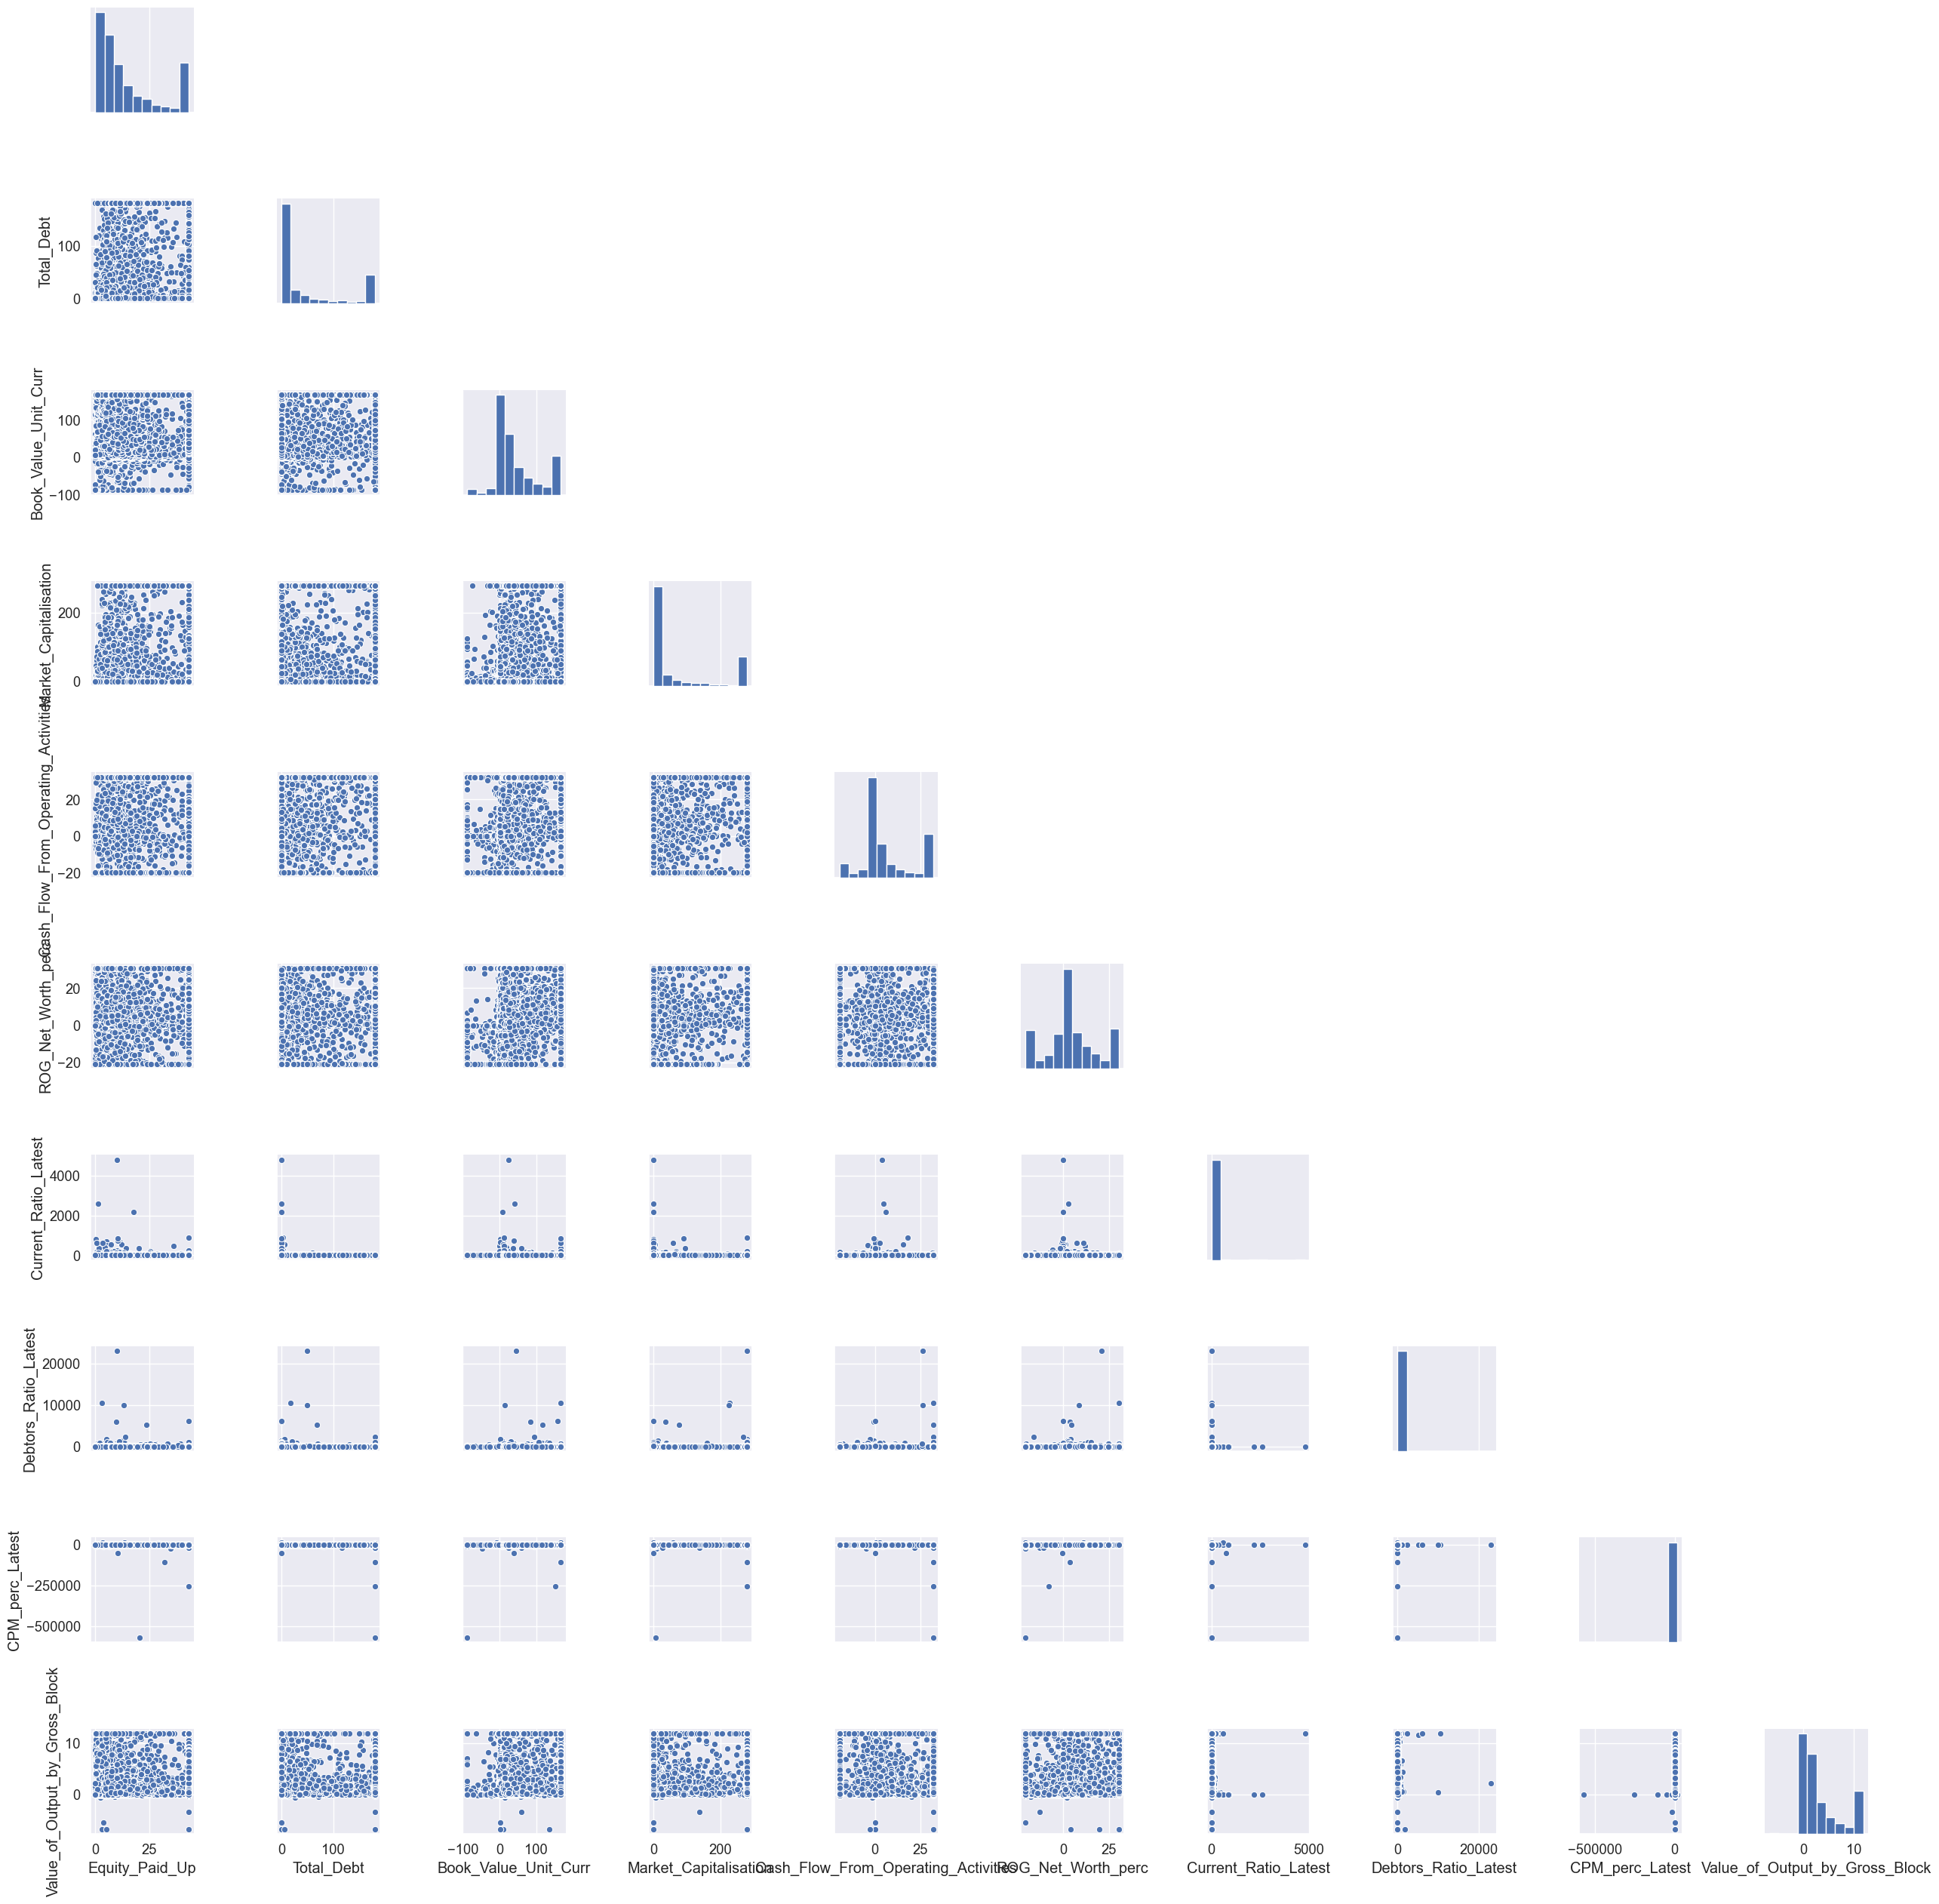

In [550]:
df = Default[['Equity_Paid_Up','Total_Debt','Book_Value_Unit_Curr','Market_Capitalisation','Cash_Flow_From_Operating_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest','Debtors_Ratio_Latest','CPM_perc_Latest','Value_of_Output_by_Gross_Block','default']]
sns.pairplot(df[df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index],corner=True)
plt.show()

In [551]:
df.to_csv('cleaded_data.csv',index=False)

In [552]:
#analyzing the dataset
import sweetviz as sv
report = sv.analyze(df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [553]:
#display the report
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Correlation heatmap

Since there were too many variables, i have plotted the correlation heatmap for the significant variables identified after the 
p value elimination method for stats model.

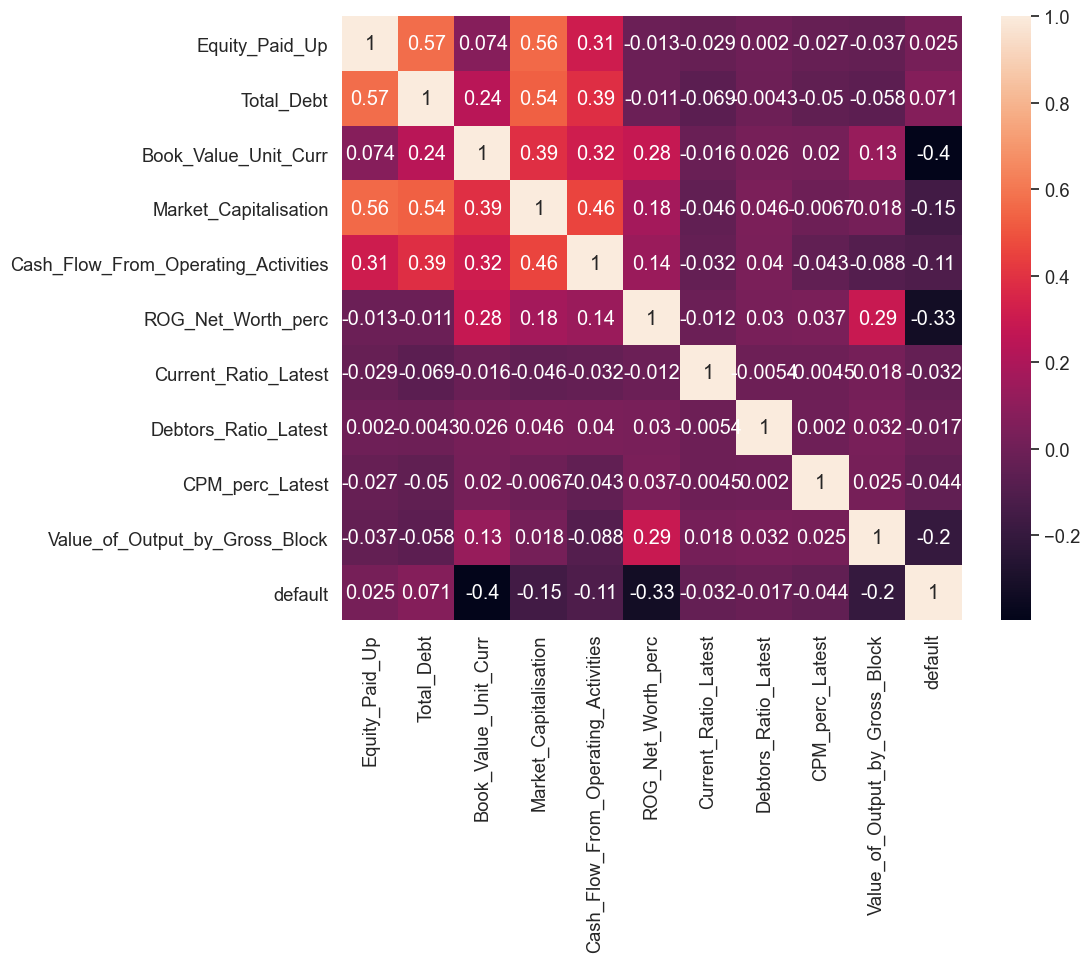

In [554]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(df.corr(), annot=True)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

We do not see any significant correlation neither between the independant varaibles nor in dependant variables. Pairplot also suggests that there is no correlation observed.

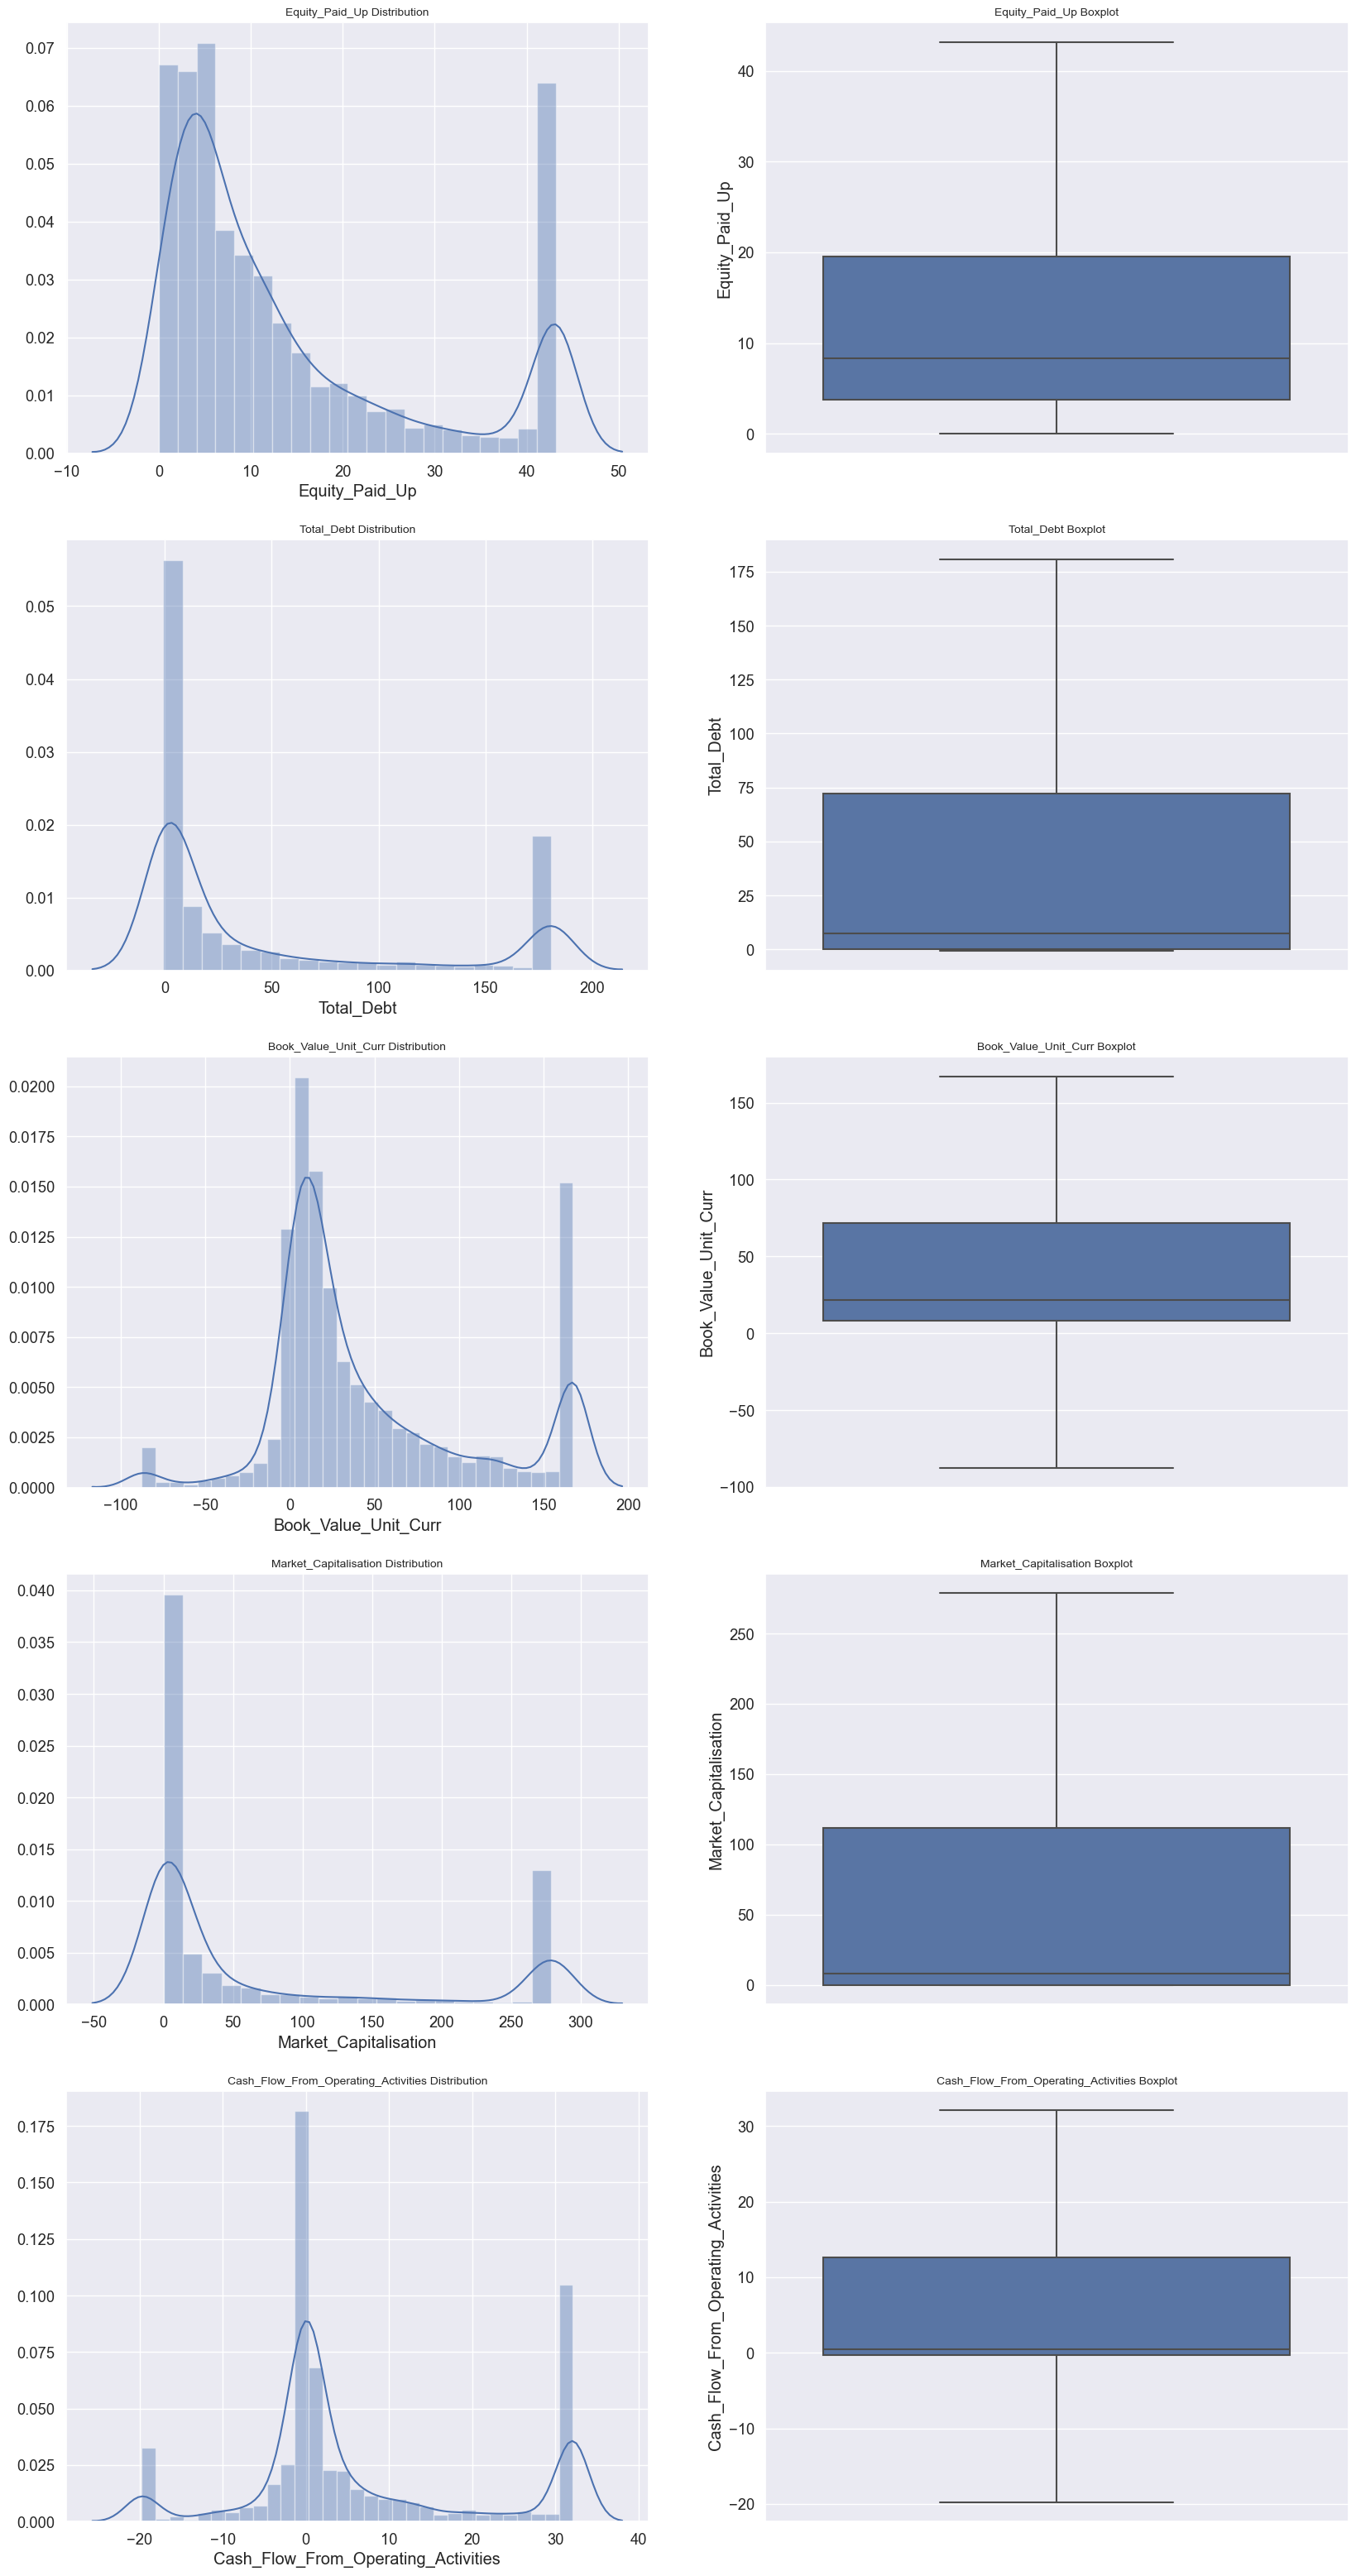

In [555]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,40)

a = sns.distplot(df['Equity_Paid_Up'] , ax=axes[0][0])
a.set_title("Equity_Paid_Up Distribution",fontsize=10)

a = sns.boxplot(df['Equity_Paid_Up'] , orient = "v" , ax=axes[0][1])
a.set_title("Equity_Paid_Up Boxplot",fontsize=10)

a = sns.distplot(df['Total_Debt'] , ax=axes[1][0])
a.set_title("Total_Debt Distribution",fontsize=10)

a = sns.boxplot(df['Total_Debt'] , orient = "v" , ax=axes[1][1])
a.set_title("Total_Debt Boxplot",fontsize=10)


a = sns.distplot(df['Book_Value_Unit_Curr'] , ax=axes[2][0])
a.set_title("Book_Value_Unit_Curr Distribution",fontsize=10)

a = sns.boxplot(df['Book_Value_Unit_Curr'] , orient = "v" , ax=axes[2][1])
a.set_title("Book_Value_Unit_Curr Boxplot",fontsize=10)


a = sns.distplot(df['Market_Capitalisation'] , ax=axes[3][0])
a.set_title("Market_Capitalisation Distribution",fontsize=10)

a = sns.boxplot(df['Market_Capitalisation'] , orient = "v" , ax=axes[3][1])
a.set_title("Market_Capitalisation Boxplot",fontsize=10)

a = sns.distplot(df['Cash_Flow_From_Operating_Activities'] , ax=axes[4][0])
a.set_title("Cash_Flow_From_Operating_Activities Distribution",fontsize=10)

a = sns.boxplot(df['Cash_Flow_From_Operating_Activities'] , orient = "v" , ax=axes[4][1])
a.set_title("Cash_Flow_From_Operating_Activities Boxplot",fontsize=10)

plt.show()

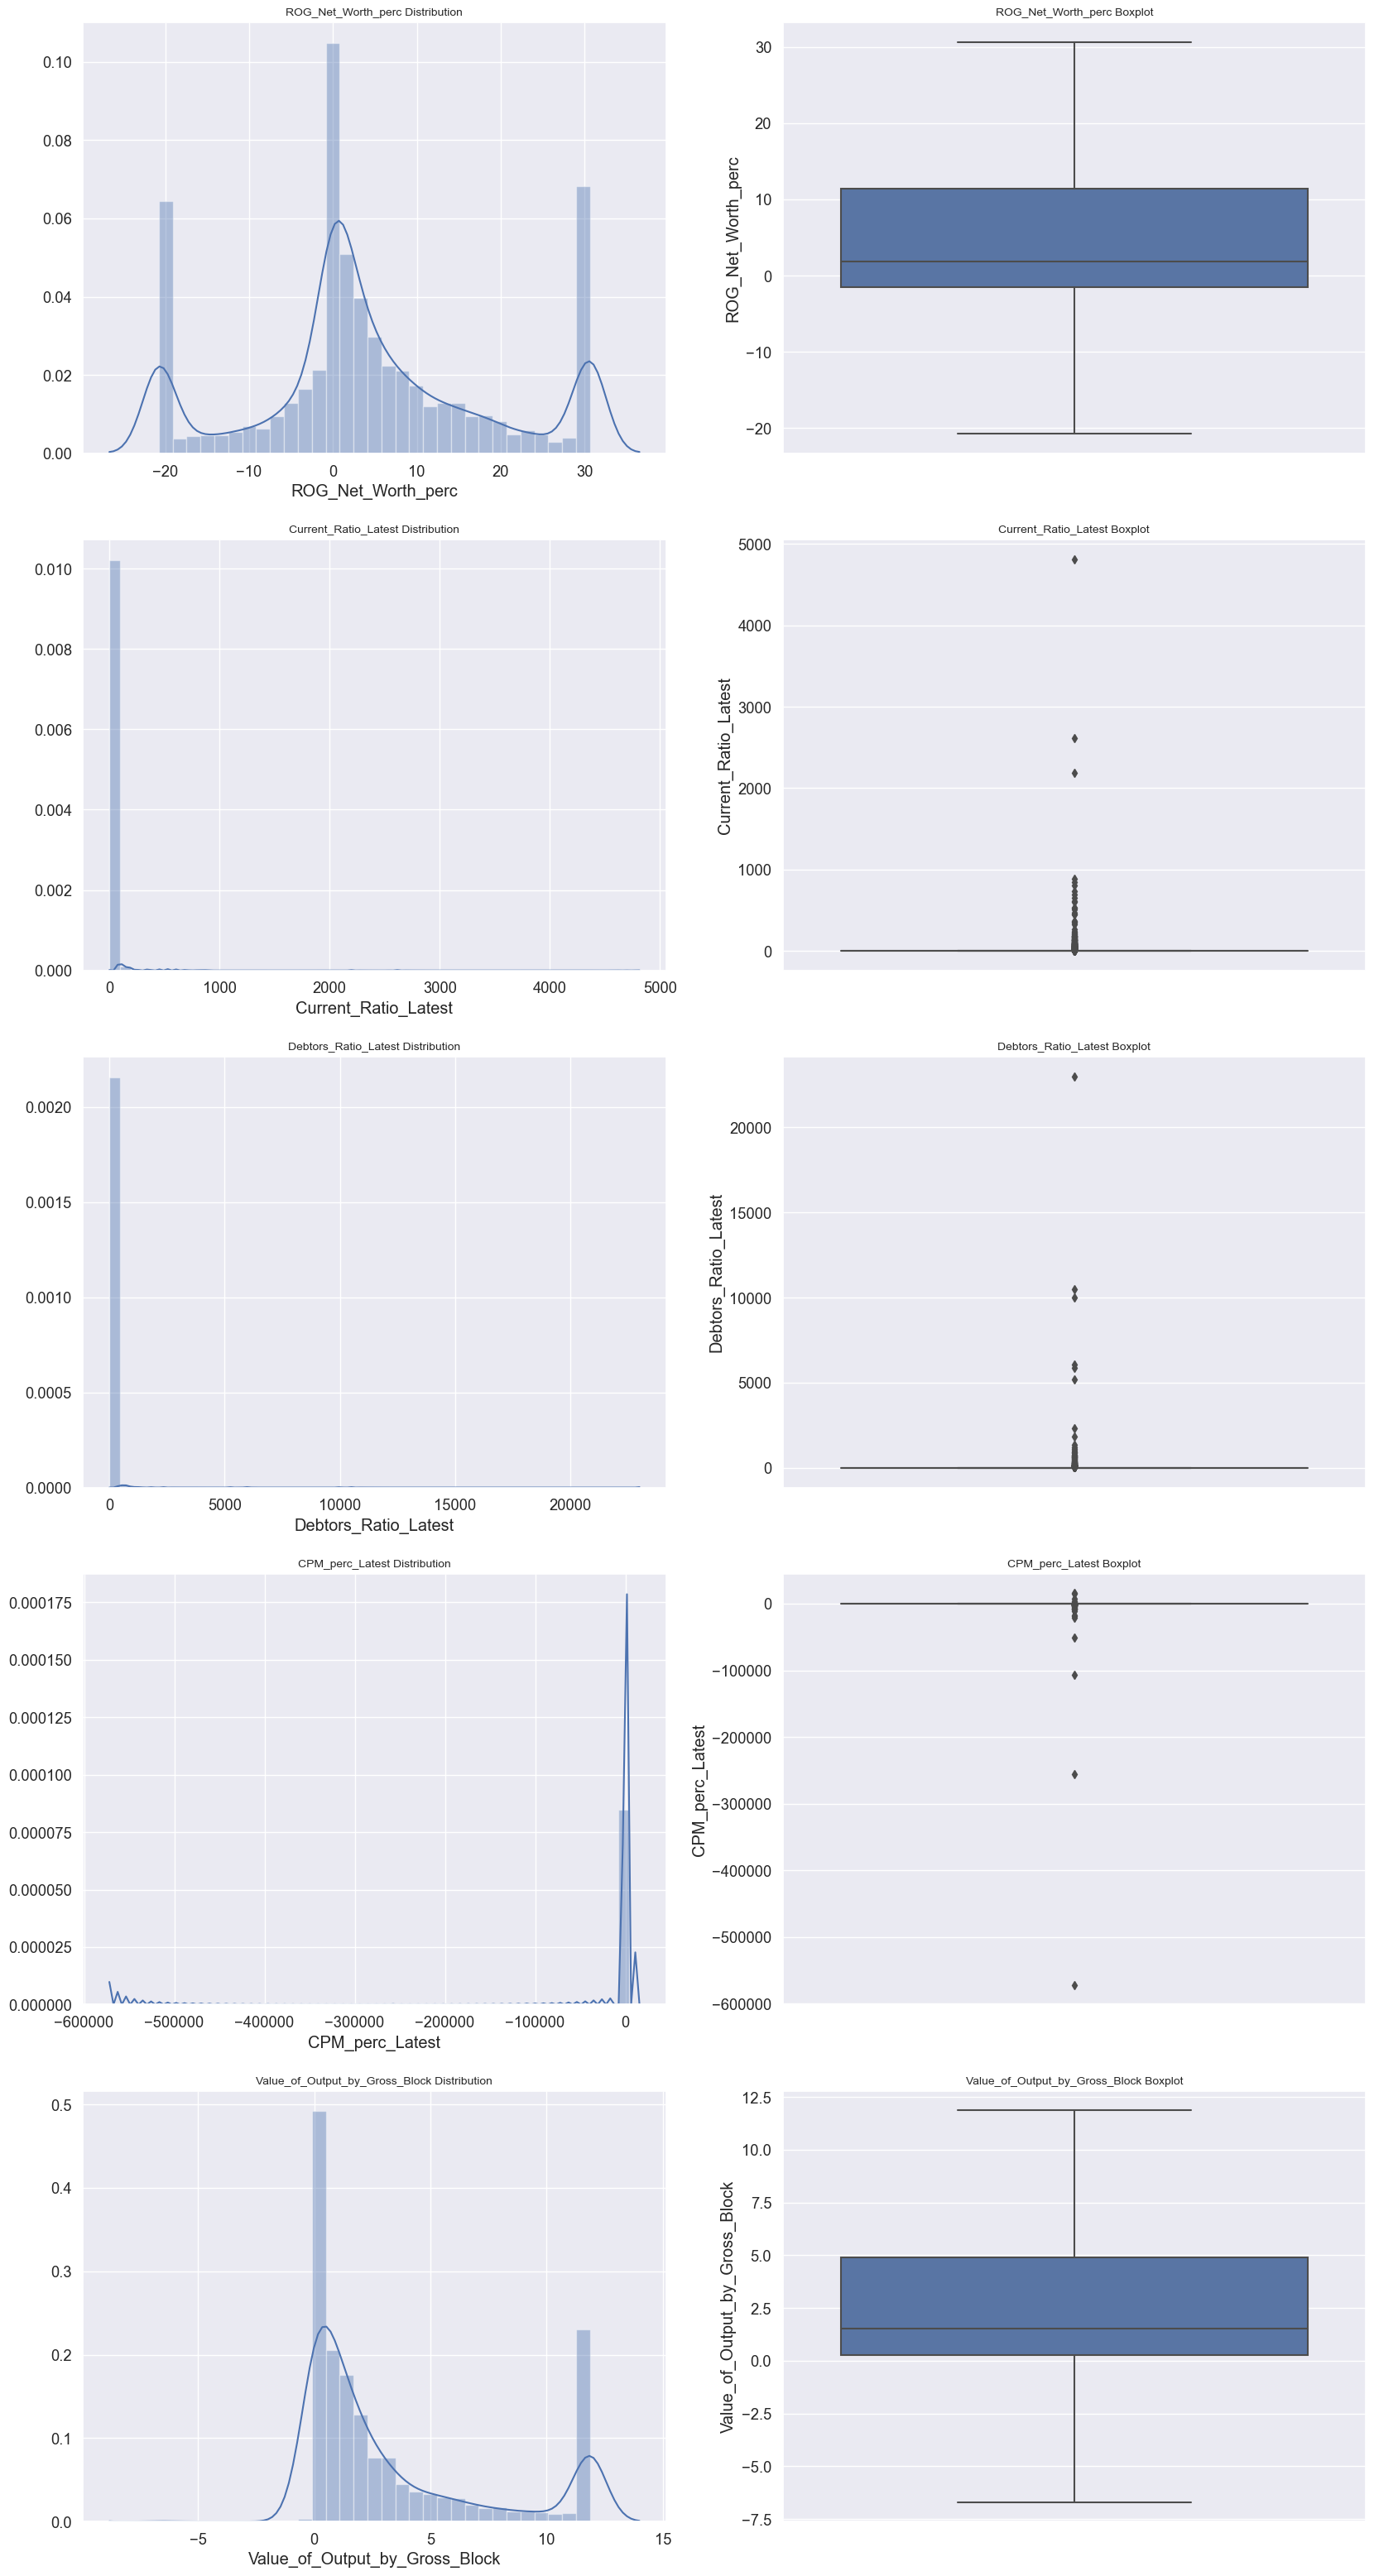

In [556]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,40)

a = sns.distplot(df['ROG_Net_Worth_perc'] , ax=axes[0][0])
a.set_title("ROG_Net_Worth_perc Distribution",fontsize=10)

a = sns.boxplot(df['ROG_Net_Worth_perc'] , orient = "v" , ax=axes[0][1])
a.set_title("ROG_Net_Worth_perc Boxplot",fontsize=10)


a = sns.distplot(df['Current_Ratio_Latest'] , ax=axes[1][0])
a.set_title("Current_Ratio_Latest Distribution",fontsize=10)

a = sns.boxplot(df['Current_Ratio_Latest'] , orient = "v" , ax=axes[1][1])
a.set_title("Current_Ratio_Latest Boxplot",fontsize=10)


a = sns.distplot(df['Debtors_Ratio_Latest'] , ax=axes[2][0])
a.set_title("Debtors_Ratio_Latest Distribution",fontsize=10)

a = sns.boxplot(df['Debtors_Ratio_Latest'] , orient = "v" , ax=axes[2][1])
a.set_title("Debtors_Ratio_Latest Boxplot",fontsize=10)


a = sns.distplot(df['CPM_perc_Latest'] , ax=axes[3][0])
a.set_title("CPM_perc_Latest Distribution",fontsize=10)

a = sns.boxplot(df['CPM_perc_Latest'] , orient = "v" , ax=axes[3][1])
a.set_title("CPM_perc_Latest Boxplot",fontsize=10)

a = sns.distplot(df['Value_of_Output_by_Gross_Block'] , ax=axes[4][0])
a.set_title("Value_of_Output_by_Gross_Block Distribution",fontsize=10)

a = sns.boxplot(df['Value_of_Output_by_Gross_Block'] , orient = "v" , ax=axes[4][1])
a.set_title("Value_of_Output_by_Gross_Block Boxplot",fontsize=10)

plt.show()

In [557]:
df[(df['Current_Ratio_Latest'] >= 1.5) & (df['Current_Ratio_Latest'] <= 3.0)]

Equity_Paid_Up  Total_Debt  Book_Value_Unit_Curr  Market_Capitalisation  \
23          43.16875      180.83               -79.680                9.16000   
161         22.38000       29.52                -9.570                3.58000   
201          8.00000      107.40               -36.440               39.44000   
207          3.64000       21.52               -27.720                0.00000   
208         12.84000       18.32                -8.920               58.17000   
...              ...         ...                   ...                    ...   
3549        43.16875        0.00                26.490              278.64375   
3560        43.16875      180.83               167.225              278.64375   
3565        43.16875      117.83               139.260              278.64375   
3566        43.16875      180.83               167.225              278.64375   
3574        43.16875       53.02                38.280              278.64375   

      Cash_Flow_From_Operating_Activities  ROG_Net_Worth_perc  \
23                                 -19.74            -20.7625   
161                                 26.22             -0.5200   
201                                  3.58            -20.7625   
207                                  4.86            -20.7625   
208                                  2.40              4.9000   
...                                   ...                 ...   
3549                                32.08              1.7600   
3560                                32.08              3.8900   
3565                                32.08              3.1400   
3566                               -19.74             10.7800   
3574                                32.08             17.0700   

      Current_Ratio_Latest  Debtors_Ratio_Latest  CPM_perc_Latest  \
23                    1.85                  0.59          -117.17   
161                   1.90                  0.00             0.00   
201                   1.53                  9.48           -74.66   
207                   3.00                 19.57            23.77   
208                   1.62                  8.90             0.46   
...                    ...                   ...              ...   
3549                  2.93                 64.03          3456.51   
3560                  2.17                  8.16            37.16   
3565                  2.32                  1.32             4.56   
3566                  2.02                  0.00            22.61   
3574                  1.79                 28.48            20.27   

      Value_of_Output_by_Gross_Block  default  
23                              0.87        1  
161                             0.00        1  
201                             0.13        1  
207                             0.20        1  
208                             2.69        1  
...                              ...      ...  
3549                            0.83        0  
3560                            2.40        0  
3565                            3.13        0  
3566                           11.87        0  
3574                            2.23        0  

[728 rows x 11 columns]

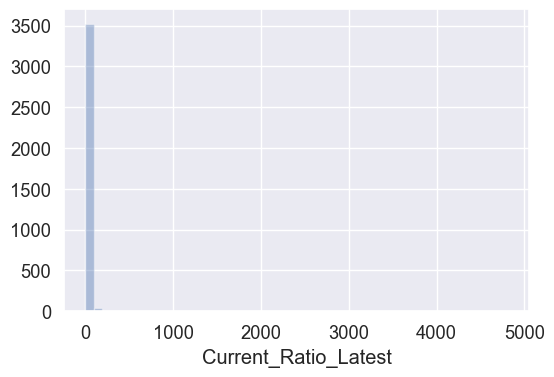

In [558]:
sns.distplot(df['Current_Ratio_Latest'],kde = False)

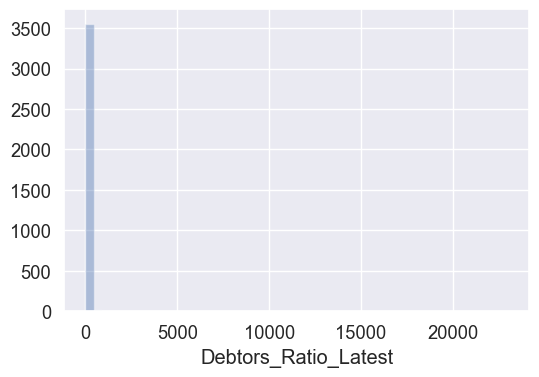

In [559]:
sns.distplot(df['Debtors_Ratio_Latest'],kde = False)

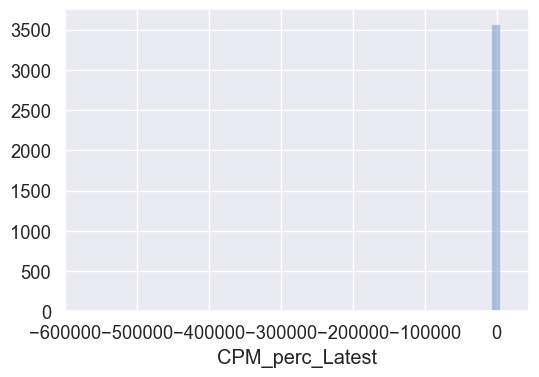

In [560]:
sns.distplot(df['CPM_perc_Latest'],kde = False)

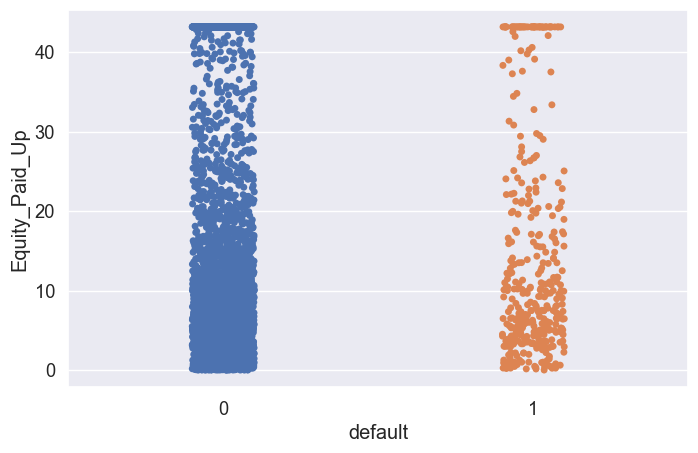

In [561]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Equity_Paid_Up'], jitter=True) 
plt.show()

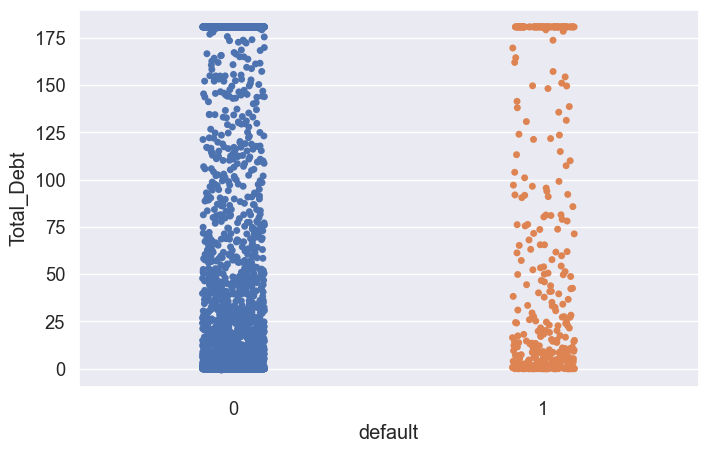

In [562]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Total_Debt'], jitter=True) 
plt.show()

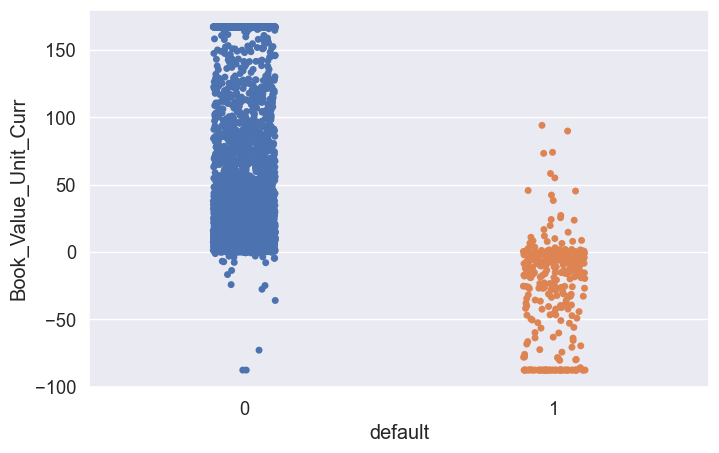

In [563]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Book_Value_Unit_Curr'], jitter=True) 
plt.show()

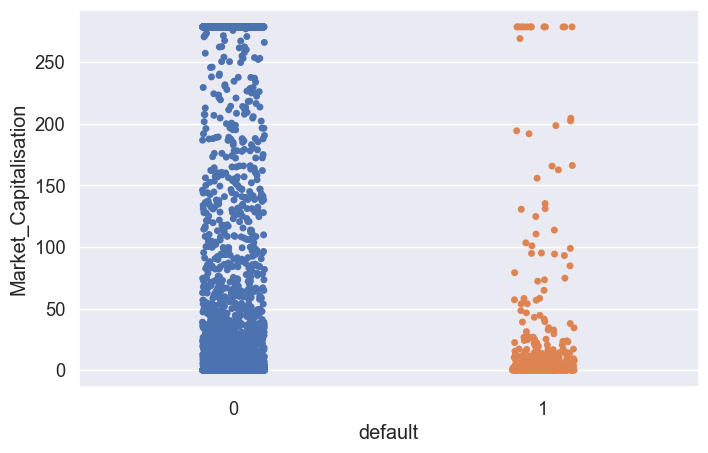

In [564]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Market_Capitalisation'], jitter=True) 
plt.show()

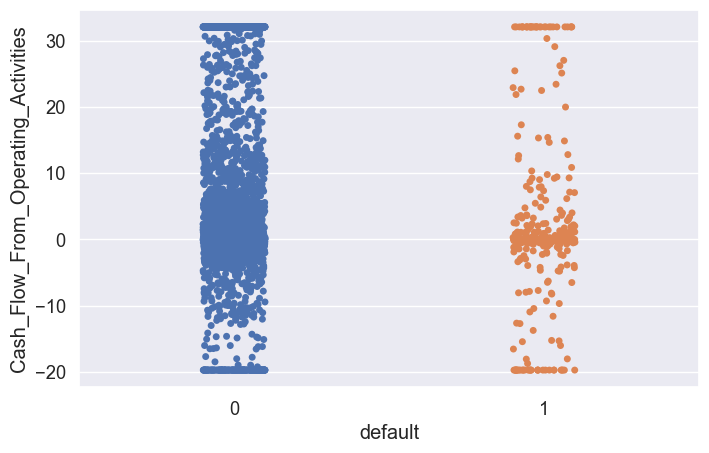

In [565]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Cash_Flow_From_Operating_Activities'], jitter=True) 
plt.show()

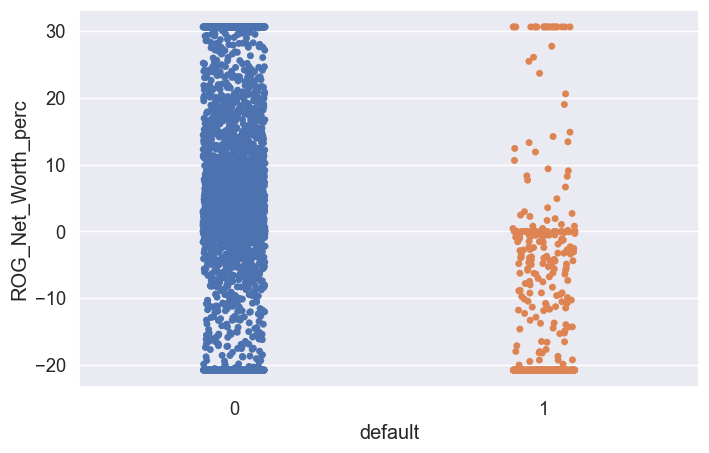

In [566]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['ROG_Net_Worth_perc'], jitter=True) 
plt.show()

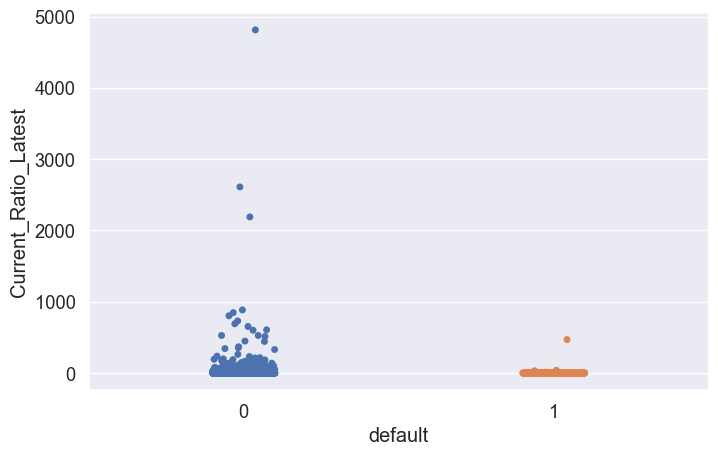

In [567]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Current_Ratio_Latest'], jitter=True) 
plt.show()

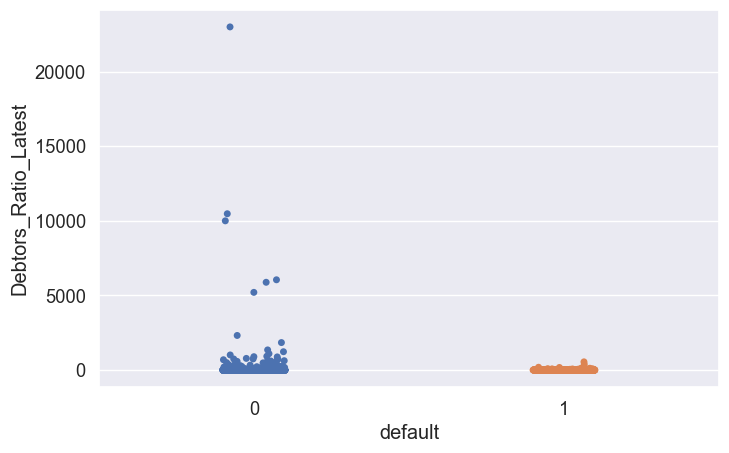

In [568]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Debtors_Ratio_Latest'], jitter=True) 
plt.show()

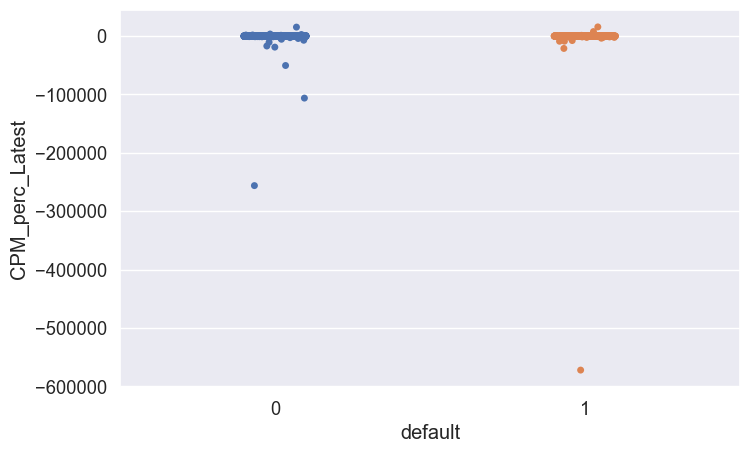

In [569]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['CPM_perc_Latest'], jitter=True) 
plt.show()

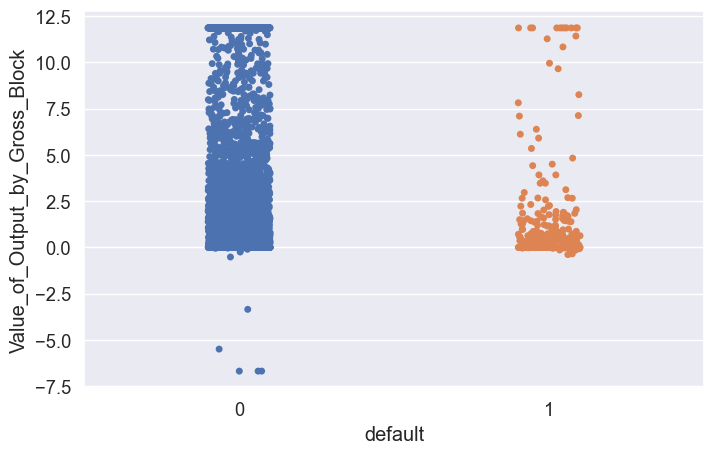

In [570]:
plt.figure(figsize=(8,5))
sns.stripplot(df["default"], df['Value_of_Output_by_Gross_Block'], jitter=True) 
plt.show()

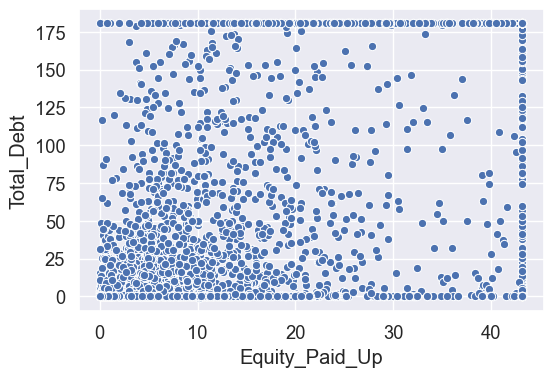

In [571]:
sns.scatterplot(data=df, x="Equity_Paid_Up", y="Total_Debt")

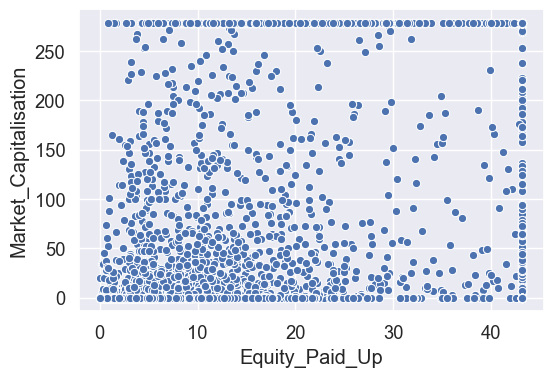

In [572]:
sns.scatterplot(data=df, x="Equity_Paid_Up", y="Market_Capitalisation")

### 1.5 Train Test Split

#### Checking the Variance Inflation Factor

In [573]:
Default['ROG_Revenue_earnings_in_forex_perc'].sum()

0.0

In [574]:
Default['ROG_Revenue_expenses_in_forex_perc'].sum()

0.0

In [575]:
Default['Capital_expenses_in_forex'].sum()

0.0

In [576]:
X = Default.drop(['default','Co_Name','Networth_Next_Year','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc','Capital_expenses_in_forex'], axis = 1)

In [577]:
X.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0        43.16875  -166.215        -320.90125      180.83     328.8825   
1        43.16875  -166.215         555.10875      180.83     328.8825   
2        43.16875   287.405         555.10875      180.83     328.8825   
3        43.16875  -166.215         555.10875      180.83     328.8825   
4        43.16875  -166.215         555.10875      180.83     328.8825   

   Net_Working_Capital  Current_Assets  Current_Liabilities_and_Provisions  \
0            -89.40625        40.50000                           163.02625   
1            -89.40625       332.19375                           163.02625   
2            151.52375       332.19375                           163.02625   
3            -89.40625       332.19375                           163.02625   
4            151.52375       332.19375                           163.02625   

   Total_Assets_by_Liabilities  Gross_Sales  ...  PBIDTM_perc_Latest  \
0                     109.6000      0.00000  ...                0.00   
1                     760.5175    603.46125  ...              -10.30   
2                     760.5175    392.13000  ...            -5279.14   
3                     760.5175    603.46125  ...               -3.33   
4                     760.5175     38.72000  ...             -295.55   

   PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00               0.00             0.00               0.00   
1             -39.74             -57.74           -57.74             -87.18   
2           -5516.98           -7780.25         -7723.67           -7961.51   
3              -7.21             -48.13           -47.70             -51.58   
4            -400.55            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                    0.0                      0.0                     45.0   
1                   29.0                    101.0                      2.0   
2                   97.0                    210.5                      0.0   
3                   93.0                     63.0                      2.0   
4                  253.0                    210.5                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 61 columns]

In [578]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [579]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables           VIF
55            APATM_perc_Latest  6.701785e+12
54              CPM_perc_Latest  4.887249e+12
52            PBITM_perc_Latest  4.010508e+11
51           PBIDTM_perc_Latest  1.381727e+11
53            PBDTM_perc_Latest  4.690566e+03
..                          ...           ...
50  Interest_Cover_Ratio_Latest  1.065412e+00
47       Inventory_Ratio_Latest  1.032421e+00
48         Debtors_Ratio_Latest  1.028482e+00
45         Current_Ratio_Latest  1.023714e+00
25     Book_Value_Adj_Unit_Curr  1.013464e+00

[61 rows x 2 columns]

In [580]:
X = X.drop('APATM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables          VIF
53                    PBDTM_perc_Latest  4690.160171
54                      CPM_perc_Latest  4420.218251
10                            Net_Sales  1689.378388
9                           Gross_Sales   954.789027
12                      Value_Of_Output   691.348383
34                 ROG_Gross_Sales_perc   540.721725
35                   ROG_Net_Sales_perc   540.134588
16                                 PBDT   117.265334
8           Total_Assets_by_Liabilities   105.356328
21                                   CP   103.752419
19                                  PAT    76.581060
18                                  PBT    75.273631
2                      Capital_Employed    73.329330
13                   Cost_of_Production    48.950211
6                        Current_Assets    32.836669
15                                PBIDT    32.217721
17                                 PBIT    28.679293
52                    PBITM_perc_Latest    27.531067
39                        ROG_PBDT_perc    25.132848
7    Current_Liabilities_and_Provisions    23.155824
41                         ROG_PBT_perc    19.298709
43                          ROG_CP_perc    18.307325
20                         Adjusted_PAT    17.074423
38                       ROG_PBIDT_perc    15.247945
42                         ROG_PAT_perc    14.676539
1                              Networth    12.585914
40                        ROG_PBIT_perc    12.484534
4                           Gross_Block    11.933111
51                   PBIDTM_perc_Latest    10.407077
3                            Total_Debt     6.982397
27            CEPS_annualised_Unit_Curr     6.570623
5                   Net_Working_Capital     5.290444
24                 Book_Value_Unit_Curr     5.067098
26                Market_Capitalisation     4.632845
14                         Selling_Cost     4.573205
11                         Other_Income     4.488972
0                        Equity_Paid_Up     4.247638
58      Value_of_Output_by_Total_Assets     4.141603
32            ROG_Capital_Employed_perc     4.027650
23            Revenue_expenses_in_forex     3.829551
28  Cash_Flow_From_Operating_Activities     3.743996
37                ROG_Total_Assets_perc     3.362500
22            Revenue_earnings_in_forex     3.124560
31                   ROG_Net_Worth_perc     2.929378
30  Cash_Flow_From_Financing_Activities     2.915858
59       Value_of_Output_by_Gross_Block     2.625609
29  Cash_Flow_From_Investing_Activities     2.478505
56              Creditors_Velocity_Days     2.273352
55                Debtors_Velocity_Days     2.207425
36          ROG_Cost_of_Production_perc     2.047294
49    Total_Asset_Turnover_Ratio_Latest     1.947259
44       ROG_Market_Capitalisation_perc     1.669815
33                 ROG_Gross_Block_perc     1.559654
57              Inventory_Velocity_Days     1.370687
46            Fixed_Assets_Ratio_Latest     1.101825
50          Interest_Cover_Ratio_Latest     1.065375
47               Inventory_Ratio_Latest     1.032068
48                 Debtors_Ratio_Latest     1.027107
45                 Current_Ratio_Latest     1.023708
25             Book_Value_Adj_Unit_Curr     1.013459

In [581]:
X = X.drop('PBDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables          VIF
10                            Net_Sales  1688.683975
9                           Gross_Sales   954.479942
12                      Value_Of_Output   691.251853
34                 ROG_Gross_Sales_perc   540.715721
35                   ROG_Net_Sales_perc   540.134572
16                                 PBDT   117.255460
8           Total_Assets_by_Liabilities   105.329407
21                                   CP   103.736833
19                                  PAT    76.558308
18                                  PBT    75.272702
2                      Capital_Employed    73.291965
13                   Cost_of_Production    48.944507
6                        Current_Assets    32.760475
15                                PBIDT    32.216474
17                                 PBIT    28.672532
39                        ROG_PBDT_perc    25.132377
7    Current_Liabilities_and_Provisions    23.138365
41                         ROG_PBT_perc    19.293137
43                          ROG_CP_perc    18.299803
20                         Adjusted_PAT    17.066884
38                       ROG_PBIDT_perc    15.221692
42                         ROG_PAT_perc    14.676094
52                    PBITM_perc_Latest    13.805193
1                              Networth    12.536993
40                        ROG_PBIT_perc    12.454471
4                           Gross_Block    11.928245
53                      CPM_perc_Latest     7.061793
3                            Total_Debt     6.971123
27            CEPS_annualised_Unit_Curr     6.565483
5                   Net_Working_Capital     5.290332
24                 Book_Value_Unit_Curr     5.063098
26                Market_Capitalisation     4.631791
14                         Selling_Cost     4.573141
11                         Other_Income     4.486777
51                   PBIDTM_perc_Latest     4.380760
0                        Equity_Paid_Up     4.246991
57      Value_of_Output_by_Total_Assets     4.141199
32            ROG_Capital_Employed_perc     4.026727
23            Revenue_expenses_in_forex     3.829213
28  Cash_Flow_From_Operating_Activities     3.743716
37                ROG_Total_Assets_perc     3.362499
22            Revenue_earnings_in_forex     3.124517
31                   ROG_Net_Worth_perc     2.929252
30  Cash_Flow_From_Financing_Activities     2.913988
58       Value_of_Output_by_Gross_Block     2.625474
29  Cash_Flow_From_Investing_Activities     2.478486
55              Creditors_Velocity_Days     2.273313
54                Debtors_Velocity_Days     2.207425
36          ROG_Cost_of_Production_perc     2.045844
49    Total_Asset_Turnover_Ratio_Latest     1.947246
44       ROG_Market_Capitalisation_perc     1.669747
33                 ROG_Gross_Block_perc     1.559607
56              Inventory_Velocity_Days     1.370687
46            Fixed_Assets_Ratio_Latest     1.101817
50          Interest_Cover_Ratio_Latest     1.065117
47               Inventory_Ratio_Latest     1.032066
48                 Debtors_Ratio_Latest     1.027097
45                 Current_Ratio_Latest     1.023476
25             Book_Value_Adj_Unit_Curr     1.013457

In [582]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
33                 ROG_Gross_Sales_perc  525.128851
34                   ROG_Net_Sales_perc  524.101982
9                           Gross_Sales  414.252654
11                      Value_Of_Output  402.953514
15                                 PBDT  117.241350
8           Total_Assets_by_Liabilities  104.745112
20                                   CP  103.720185
18                                  PAT   76.395289
17                                  PBT   75.115102
2                      Capital_Employed   73.288710
12                   Cost_of_Production   47.730103
6                        Current_Assets   32.759035
14                                PBIDT   32.208970
16                                 PBIT   28.655298
38                        ROG_PBDT_perc   25.128345
7    Current_Liabilities_and_Provisions   23.064188
40                         ROG_PBT_perc   19.292763
42                          ROG_CP_perc   18.299274
19                         Adjusted_PAT   17.063894
37                       ROG_PBIDT_perc   15.221414
41                         ROG_PAT_perc   14.674678
51                    PBITM_perc_Latest   13.803872
1                              Networth   12.491383
39                        ROG_PBIT_perc   12.453660
4                           Gross_Block   11.884849
52                      CPM_perc_Latest    7.061560
3                            Total_Debt    6.968139
26            CEPS_annualised_Unit_Curr    6.565340
5                   Net_Working_Capital    5.281389
23                 Book_Value_Unit_Curr    5.062024
25                Market_Capitalisation    4.630409
13                         Selling_Cost    4.536835
10                         Other_Income    4.486773
50                   PBIDTM_perc_Latest    4.380367
0                        Equity_Paid_Up    4.246963
56      Value_of_Output_by_Total_Assets    4.138000
31            ROG_Capital_Employed_perc    4.026716
22            Revenue_expenses_in_forex    3.813448
27  Cash_Flow_From_Operating_Activities    3.741115
36                ROG_Total_Assets_perc    3.359710
21            Revenue_earnings_in_forex    3.106988
30                   ROG_Net_Worth_perc    2.927239
29  Cash_Flow_From_Financing_Activities    2.913944
57       Value_of_Output_by_Gross_Block    2.623789
28  Cash_Flow_From_Investing_Activities    2.478134
54              Creditors_Velocity_Days    2.272997
53                Debtors_Velocity_Days    2.207364
35          ROG_Cost_of_Production_perc    2.040659
48    Total_Asset_Turnover_Ratio_Latest    1.947236
43       ROG_Market_Capitalisation_perc    1.669747
32                 ROG_Gross_Block_perc    1.559424
55              Inventory_Velocity_Days    1.370669
45            Fixed_Assets_Ratio_Latest    1.101759
49          Interest_Cover_Ratio_Latest    1.064217
46               Inventory_Ratio_Latest    1.031830
47                 Debtors_Ratio_Latest    1.026849
44                 Current_Ratio_Latest    1.023469
24             Book_Value_Adj_Unit_Curr    1.013453

In [583]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
9                           Gross_Sales  409.300841
11                      Value_Of_Output  398.479421
15                                 PBDT  116.750042
8           Total_Assets_by_Liabilities  104.743641
20                                   CP  103.364792
18                                  PAT   76.255679
17                                  PBT   75.069116
2                      Capital_Employed   73.275407
12                   Cost_of_Production   47.714827
6                        Current_Assets   32.712456
14                                PBIDT   32.095090
16                                 PBIT   28.609047
37                        ROG_PBDT_perc   25.107854
7    Current_Liabilities_and_Provisions   23.029787
39                         ROG_PBT_perc   19.286552
41                          ROG_CP_perc   18.259254
19                         Adjusted_PAT   17.019316
36                       ROG_PBIDT_perc   15.217764
40                         ROG_PAT_perc   14.654597
50                    PBITM_perc_Latest   13.801572
1                              Networth   12.477842
38                        ROG_PBIT_perc   12.448240
4                           Gross_Block   11.884029
51                      CPM_perc_Latest    7.059428
3                            Total_Debt    6.968114
26            CEPS_annualised_Unit_Curr    6.563914
5                   Net_Working_Capital    5.279628
23                 Book_Value_Unit_Curr    5.061286
25                Market_Capitalisation    4.630178
13                         Selling_Cost    4.536465
10                         Other_Income    4.483625
49                   PBIDTM_perc_Latest    4.379658
0                        Equity_Paid_Up    4.245493
55      Value_of_Output_by_Total_Assets    4.137904
31            ROG_Capital_Employed_perc    4.026687
22            Revenue_expenses_in_forex    3.811826
27  Cash_Flow_From_Operating_Activities    3.740810
35                ROG_Total_Assets_perc    3.359274
21            Revenue_earnings_in_forex    3.106420
30                   ROG_Net_Worth_perc    2.926758
29  Cash_Flow_From_Financing_Activities    2.913944
56       Value_of_Output_by_Gross_Block    2.622604
28  Cash_Flow_From_Investing_Activities    2.476369
53              Creditors_Velocity_Days    2.272660
52                Debtors_Velocity_Days    2.207360
33                   ROG_Net_Sales_perc    2.152654
34          ROG_Cost_of_Production_perc    2.036446
47    Total_Asset_Turnover_Ratio_Latest    1.947150
42       ROG_Market_Capitalisation_perc    1.669556
32                 ROG_Gross_Block_perc    1.557579
54              Inventory_Velocity_Days    1.370652
44            Fixed_Assets_Ratio_Latest    1.101754
48          Interest_Cover_Ratio_Latest    1.064215
45               Inventory_Ratio_Latest    1.031612
46                 Debtors_Ratio_Latest    1.026797
43                 Current_Ratio_Latest    1.023469
24             Book_Value_Adj_Unit_Curr    1.013236

In [584]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
14                                 PBDT  116.725559
8           Total_Assets_by_Liabilities  104.715607
19                                   CP  103.341162
17                                  PAT   76.219751
16                                  PBT   74.942581
2                      Capital_Employed   73.265855
10                      Value_Of_Output   57.211581
11                   Cost_of_Production   45.640572
6                        Current_Assets   32.701691
13                                PBIDT   32.084208
15                                 PBIT   28.583399
36                        ROG_PBDT_perc   25.097052
7    Current_Liabilities_and_Provisions   23.029783
38                         ROG_PBT_perc   19.286489
40                          ROG_CP_perc   18.247133
18                         Adjusted_PAT   17.007127
35                       ROG_PBIDT_perc   15.217757
39                         ROG_PAT_perc   14.649545
49                    PBITM_perc_Latest   13.801118
1                              Networth   12.454662
37                        ROG_PBIT_perc   12.443690
4                           Gross_Block   11.862603
50                      CPM_perc_Latest    7.059400
3                            Total_Debt    6.965104
25            CEPS_annualised_Unit_Curr    6.563882
5                   Net_Working_Capital    5.279285
22                 Book_Value_Unit_Curr    5.059824
24                Market_Capitalisation    4.624106
12                         Selling_Cost    4.509547
9                          Other_Income    4.481282
48                   PBIDTM_perc_Latest    4.379356
0                        Equity_Paid_Up    4.245491
54      Value_of_Output_by_Total_Assets    4.137848
30            ROG_Capital_Employed_perc    4.023195
21            Revenue_expenses_in_forex    3.805639
26  Cash_Flow_From_Operating_Activities    3.740760
34                ROG_Total_Assets_perc    3.341475
20            Revenue_earnings_in_forex    3.098749
29                   ROG_Net_Worth_perc    2.926567
28  Cash_Flow_From_Financing_Activities    2.912610
55       Value_of_Output_by_Gross_Block    2.622547
27  Cash_Flow_From_Investing_Activities    2.470514
52              Creditors_Velocity_Days    2.272118
51                Debtors_Velocity_Days    2.205457
32                   ROG_Net_Sales_perc    2.149330
33          ROG_Cost_of_Production_perc    2.034440
46    Total_Asset_Turnover_Ratio_Latest    1.947143
41       ROG_Market_Capitalisation_perc    1.668998
31                 ROG_Gross_Block_perc    1.557501
53              Inventory_Velocity_Days    1.369798
43            Fixed_Assets_Ratio_Latest    1.101450
47          Interest_Cover_Ratio_Latest    1.064153
44               Inventory_Ratio_Latest    1.031323
45                 Debtors_Ratio_Latest    1.026547
42                 Current_Ratio_Latest    1.023468
23             Book_Value_Adj_Unit_Curr    1.013182

In [585]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
8           Total_Assets_by_Liabilities  104.635471
2                      Capital_Employed   73.169867
16                                  PAT   67.125288
10                      Value_Of_Output   57.211565
15                                  PBT   55.005638
11                   Cost_of_Production   45.617921
6                        Current_Assets   32.682848
13                                PBIDT   31.655651
14                                 PBIT   28.579706
35                        ROG_PBDT_perc   24.378345
7    Current_Liabilities_and_Provisions   23.014068
18                                   CP   19.539828
37                         ROG_PBT_perc   19.284813
39                          ROG_CP_perc   17.859842
17                         Adjusted_PAT   17.000125
34                       ROG_PBIDT_perc   15.156894
38                         ROG_PAT_perc   14.648423
48                    PBITM_perc_Latest   13.797580
1                              Networth   12.443975
36                        ROG_PBIT_perc   12.440841
4                           Gross_Block   11.857400
49                      CPM_perc_Latest    7.058650
3                            Total_Debt    6.957697
24            CEPS_annualised_Unit_Curr    6.552825
5                   Net_Working_Capital    5.279045
21                 Book_Value_Unit_Curr    5.054995
23                Market_Capitalisation    4.623969
12                         Selling_Cost    4.496553
9                          Other_Income    4.477063
47                   PBIDTM_perc_Latest    4.378720
0                        Equity_Paid_Up    4.237482
53      Value_of_Output_by_Total_Assets    4.137705
29            ROG_Capital_Employed_perc    4.021844
20            Revenue_expenses_in_forex    3.805639
25  Cash_Flow_From_Operating_Activities    3.740754
33                ROG_Total_Assets_perc    3.340946
19            Revenue_earnings_in_forex    3.094543
28                   ROG_Net_Worth_perc    2.924481
27  Cash_Flow_From_Financing_Activities    2.909947
54       Value_of_Output_by_Gross_Block    2.622237
26  Cash_Flow_From_Investing_Activities    2.470385
51              Creditors_Velocity_Days    2.271401
50                Debtors_Velocity_Days    2.204103
31                   ROG_Net_Sales_perc    2.148669
32          ROG_Cost_of_Production_perc    2.034101
45    Total_Asset_Turnover_Ratio_Latest    1.947135
40       ROG_Market_Capitalisation_perc    1.668951
30                 ROG_Gross_Block_perc    1.557089
52              Inventory_Velocity_Days    1.369726
42            Fixed_Assets_Ratio_Latest    1.101444
46          Interest_Cover_Ratio_Latest    1.064109
43               Inventory_Ratio_Latest    1.031250
44                 Debtors_Ratio_Latest    1.026380
41                 Current_Ratio_Latest    1.023452
22             Book_Value_Adj_Unit_Curr    1.013181

In [586]:
X = X.drop('Total_Assets_by_Liabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
15                                  PAT  67.109523
9                       Value_Of_Output  57.126880
14                                  PBT  54.981690
10                   Cost_of_Production  45.418334
12                                PBIDT  31.257447
6                        Current_Assets  30.822872
13                                 PBIT  28.518605
34                        ROG_PBDT_perc  24.378270
2                      Capital_Employed  23.755323
17                                   CP  19.532237
36                         ROG_PBT_perc  19.284764
38                          ROG_CP_perc  17.859266
7    Current_Liabilities_and_Provisions  17.846103
16                         Adjusted_PAT  16.994380
33                       ROG_PBIDT_perc  15.156611
37                         ROG_PAT_perc  14.647179
47                    PBITM_perc_Latest  13.797537
35                        ROG_PBIT_perc  12.438108
1                              Networth  12.426164
4                           Gross_Block  11.741122
48                      CPM_perc_Latest   7.056561
3                            Total_Debt   6.940934
23            CEPS_annualised_Unit_Curr   6.547482
5                   Net_Working_Capital   5.085575
20                 Book_Value_Unit_Curr   5.050755
22                Market_Capitalisation   4.615605
11                         Selling_Cost   4.482249
8                          Other_Income   4.471774
46                   PBIDTM_perc_Latest   4.378702
0                        Equity_Paid_Up   4.235279
52      Value_of_Output_by_Total_Assets   4.110401
28            ROG_Capital_Employed_perc   4.019042
19            Revenue_expenses_in_forex   3.800614
24  Cash_Flow_From_Operating_Activities   3.739117
32                ROG_Total_Assets_perc   3.337142
18            Revenue_earnings_in_forex   3.094507
27                   ROG_Net_Worth_perc   2.924476
26  Cash_Flow_From_Financing_Activities   2.909768
53       Value_of_Output_by_Gross_Block   2.619713
25  Cash_Flow_From_Investing_Activities   2.470184
50              Creditors_Velocity_Days   2.271269
49                Debtors_Velocity_Days   2.204079
30                   ROG_Net_Sales_perc   2.148626
31          ROG_Cost_of_Production_perc   2.033965
44    Total_Asset_Turnover_Ratio_Latest   1.938019
39       ROG_Market_Capitalisation_perc   1.668950
29                 ROG_Gross_Block_perc   1.556427
51              Inventory_Velocity_Days   1.369129
41            Fixed_Assets_Ratio_Latest   1.101396
45          Interest_Cover_Ratio_Latest   1.062707
42               Inventory_Ratio_Latest   1.031060
43                 Debtors_Ratio_Latest   1.026165
40                 Current_Ratio_Latest   1.023431
21             Book_Value_Adj_Unit_Curr   1.013171

In [587]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
9                       Value_Of_Output  56.995798
10                   Cost_of_Production  45.384979
12                                PBIDT  31.113585
6                        Current_Assets  30.821923
13                                 PBIT  28.517924
33                        ROG_PBDT_perc  24.374800
2                      Capital_Employed  23.661143
14                                  PBT  21.577831
35                         ROG_PBT_perc  18.871571
16                                   CP  18.073468
37                          ROG_CP_perc  17.847519
7    Current_Liabilities_and_Provisions  17.829980
32                       ROG_PBIDT_perc  15.148456
15                         Adjusted_PAT  14.636406
36                         ROG_PAT_perc  14.065634
46                    PBITM_perc_Latest  13.796458
34                        ROG_PBIT_perc  12.435024
1                              Networth  12.389680
4                           Gross_Block  11.701102
47                      CPM_perc_Latest   7.056383
3                            Total_Debt   6.936714
22            CEPS_annualised_Unit_Curr   6.542789
5                   Net_Working_Capital   5.085481
19                 Book_Value_Unit_Curr   5.049703
21                Market_Capitalisation   4.614015
11                         Selling_Cost   4.482242
8                          Other_Income   4.424507
45                   PBIDTM_perc_Latest   4.378115
0                        Equity_Paid_Up   4.230399
51      Value_of_Output_by_Total_Assets   4.109583
27            ROG_Capital_Employed_perc   4.019013
18            Revenue_expenses_in_forex   3.800031
23  Cash_Flow_From_Operating_Activities   3.739096
31                ROG_Total_Assets_perc   3.337086
17            Revenue_earnings_in_forex   3.088862
25  Cash_Flow_From_Financing_Activities   2.909732
26                   ROG_Net_Worth_perc   2.903323
52       Value_of_Output_by_Gross_Block   2.619519
24  Cash_Flow_From_Investing_Activities   2.470175
49              Creditors_Velocity_Days   2.269673
48                Debtors_Velocity_Days   2.202939
29                   ROG_Net_Sales_perc   2.146688
30          ROG_Cost_of_Production_perc   2.033570
43    Total_Asset_Turnover_Ratio_Latest   1.937625
38       ROG_Market_Capitalisation_perc   1.668698
28                 ROG_Gross_Block_perc   1.555886
50              Inventory_Velocity_Days   1.369065
40            Fixed_Assets_Ratio_Latest   1.100464
44          Interest_Cover_Ratio_Latest   1.062700
41               Inventory_Ratio_Latest   1.029965
42                 Debtors_Ratio_Latest   1.025448
39                 Current_Ratio_Latest   1.023358
20             Book_Value_Adj_Unit_Curr   1.013161

In [588]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
6                        Current_Assets  30.776738
11                                PBIDT  29.998018
12                                 PBIT  28.504408
32                        ROG_PBDT_perc  24.371923
2                      Capital_Employed  23.581719
13                                  PBT  21.544132
34                         ROG_PBT_perc  18.870316
15                                   CP  18.070737
36                          ROG_CP_perc  17.846012
7    Current_Liabilities_and_Provisions  17.366035
31                       ROG_PBIDT_perc  15.138373
14                         Adjusted_PAT  14.575504
35                         ROG_PAT_perc  14.064667
45                    PBITM_perc_Latest  13.780954
33                        ROG_PBIT_perc  12.432390
1                              Networth  12.377645
9                    Cost_of_Production  11.531220
4                           Gross_Block  11.501556
46                      CPM_perc_Latest   7.053060
3                            Total_Debt   6.930938
21            CEPS_annualised_Unit_Curr   6.541180
5                   Net_Working_Capital   5.084305
18                 Book_Value_Unit_Curr   5.049342
20                Market_Capitalisation   4.611128
10                         Selling_Cost   4.388494
44                   PBIDTM_perc_Latest   4.373495
8                          Other_Income   4.372687
0                        Equity_Paid_Up   4.208314
50      Value_of_Output_by_Total_Assets   4.109485
26            ROG_Capital_Employed_perc   4.018971
17            Revenue_expenses_in_forex   3.799756
22  Cash_Flow_From_Operating_Activities   3.714728
30                ROG_Total_Assets_perc   3.336891
16            Revenue_earnings_in_forex   3.076377
24  Cash_Flow_From_Financing_Activities   2.909512
25                   ROG_Net_Worth_perc   2.903270
51       Value_of_Output_by_Gross_Block   2.611303
23  Cash_Flow_From_Investing_Activities   2.467549
48              Creditors_Velocity_Days   2.264890
47                Debtors_Velocity_Days   2.185840
28                   ROG_Net_Sales_perc   2.144164
29          ROG_Cost_of_Production_perc   2.033063
42    Total_Asset_Turnover_Ratio_Latest   1.936995
37       ROG_Market_Capitalisation_perc   1.668038
27                 ROG_Gross_Block_perc   1.555491
49              Inventory_Velocity_Days   1.364985
39            Fixed_Assets_Ratio_Latest   1.099975
43          Interest_Cover_Ratio_Latest   1.062699
40               Inventory_Ratio_Latest   1.029951
41                 Debtors_Ratio_Latest   1.025427
38                 Current_Ratio_Latest   1.023335
19             Book_Value_Adj_Unit_Curr   1.013088

In [589]:
X = X.drop('Current_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
10                                PBIDT  29.979266
11                                 PBIT  28.477739
31                        ROG_PBDT_perc  24.358632
12                                  PBT  21.498101
2                      Capital_Employed  21.206591
33                         ROG_PBT_perc  18.848454
14                                   CP  18.069004
35                          ROG_CP_perc  17.845655
30                       ROG_PBIDT_perc  15.135734
13                         Adjusted_PAT  14.412207
34                         ROG_PAT_perc  14.059741
44                    PBITM_perc_Latest  13.768029
32                        ROG_PBIT_perc  12.428186
1                              Networth  12.260429
4                           Gross_Block  11.266516
8                    Cost_of_Production  10.998267
6    Current_Liabilities_and_Provisions  10.698777
45                      CPM_perc_Latest   7.048970
3                            Total_Debt   6.852088
20            CEPS_annualised_Unit_Curr   6.535572
17                 Book_Value_Unit_Curr   5.047587
19                Market_Capitalisation   4.607337
9                          Selling_Cost   4.386565
43                   PBIDTM_perc_Latest   4.370725
7                          Other_Income   4.348235
0                        Equity_Paid_Up   4.207554
49      Value_of_Output_by_Total_Assets   4.095416
25            ROG_Capital_Employed_perc   4.018577
16            Revenue_expenses_in_forex   3.799286
21  Cash_Flow_From_Operating_Activities   3.700436
5                   Net_Working_Capital   3.412900
29                ROG_Total_Assets_perc   3.334072
15            Revenue_earnings_in_forex   3.075798
23  Cash_Flow_From_Financing_Activities   2.909436
24                   ROG_Net_Worth_perc   2.902793
50       Value_of_Output_by_Gross_Block   2.609036
22  Cash_Flow_From_Investing_Activities   2.466421
47              Creditors_Velocity_Days   2.264093
46                Debtors_Velocity_Days   2.178055
27                   ROG_Net_Sales_perc   2.143973
28          ROG_Cost_of_Production_perc   2.032770
41    Total_Asset_Turnover_Ratio_Latest   1.936931
36       ROG_Market_Capitalisation_perc   1.666505
26                 ROG_Gross_Block_perc   1.554934
48              Inventory_Velocity_Days   1.364953
38            Fixed_Assets_Ratio_Latest   1.099940
42          Interest_Cover_Ratio_Latest   1.057250
39               Inventory_Ratio_Latest   1.029497
40                 Debtors_Ratio_Latest   1.024844
37                 Current_Ratio_Latest   1.023332
18             Book_Value_Adj_Unit_Curr   1.013048

In [590]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
30                        ROG_PBDT_perc  24.242764
2                      Capital_Employed  21.185177
11                                  PBT  21.056163
32                         ROG_PBT_perc  18.782486
34                          ROG_CP_perc  17.813554
13                                   CP  16.865232
29                       ROG_PBIDT_perc  14.638389
12                         Adjusted_PAT  14.331092
33                         ROG_PAT_perc  14.059654
43                    PBITM_perc_Latest  13.764111
10                                 PBIT  12.287503
31                        ROG_PBIT_perc  12.272597
1                              Networth  12.065269
4                           Gross_Block  11.068386
8                    Cost_of_Production  10.991754
6    Current_Liabilities_and_Provisions  10.680079
44                      CPM_perc_Latest   7.041742
3                            Total_Debt   6.847959
19            CEPS_annualised_Unit_Curr   6.511151
16                 Book_Value_Unit_Curr   5.015887
18                Market_Capitalisation   4.607304
9                          Selling_Cost   4.382774
42                   PBIDTM_perc_Latest   4.370104
7                          Other_Income   4.347087
0                        Equity_Paid_Up   4.203497
48      Value_of_Output_by_Total_Assets   4.095347
24            ROG_Capital_Employed_perc   4.013988
15            Revenue_expenses_in_forex   3.799053
20  Cash_Flow_From_Operating_Activities   3.684177
5                   Net_Working_Capital   3.412888
28                ROG_Total_Assets_perc   3.334070
14            Revenue_earnings_in_forex   3.074895
22  Cash_Flow_From_Financing_Activities   2.907636
23                   ROG_Net_Worth_perc   2.902323
49       Value_of_Output_by_Gross_Block   2.608829
21  Cash_Flow_From_Investing_Activities   2.465950
46              Creditors_Velocity_Days   2.263452
45                Debtors_Velocity_Days   2.178042
26                   ROG_Net_Sales_perc   2.143668
27          ROG_Cost_of_Production_perc   2.032636
40    Total_Asset_Turnover_Ratio_Latest   1.936830
35       ROG_Market_Capitalisation_perc   1.664613
25                 ROG_Gross_Block_perc   1.554697
47              Inventory_Velocity_Days   1.364870
37            Fixed_Assets_Ratio_Latest   1.099932
41          Interest_Cover_Ratio_Latest   1.057123
38               Inventory_Ratio_Latest   1.029455
39                 Debtors_Ratio_Latest   1.024785
36                 Current_Ratio_Latest   1.023326
17             Book_Value_Adj_Unit_Curr   1.013035

In [591]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
2                      Capital_Employed  21.185136
11                                  PBT  21.054528
13                                   CP  16.726216
12                         Adjusted_PAT  14.324708
42                    PBITM_perc_Latest  13.723194
10                                 PBIT  12.278453
1                              Networth  12.053025
29                       ROG_PBIDT_perc  11.955391
30                        ROG_PBIT_perc  11.626613
32                         ROG_PAT_perc  11.178967
4                           Gross_Block  11.067223
8                    Cost_of_Production  10.990507
6    Current_Liabilities_and_Provisions  10.675338
31                         ROG_PBT_perc  10.377158
33                          ROG_CP_perc   9.351633
43                      CPM_perc_Latest   7.023906
3                            Total_Debt   6.846506
19            CEPS_annualised_Unit_Curr   6.510893
16                 Book_Value_Unit_Curr   5.013640
18                Market_Capitalisation   4.607137
9                          Selling_Cost   4.381910
41                   PBIDTM_perc_Latest   4.360357
7                          Other_Income   4.345705
0                        Equity_Paid_Up   4.202545
47      Value_of_Output_by_Total_Assets   4.095347
24            ROG_Capital_Employed_perc   4.007744
15            Revenue_expenses_in_forex   3.798733
20  Cash_Flow_From_Operating_Activities   3.683996
5                   Net_Working_Capital   3.411467
28                ROG_Total_Assets_perc   3.334065
14            Revenue_earnings_in_forex   3.074888
22  Cash_Flow_From_Financing_Activities   2.906805
23                   ROG_Net_Worth_perc   2.898794
48       Value_of_Output_by_Gross_Block   2.608378
21  Cash_Flow_From_Investing_Activities   2.465739
45              Creditors_Velocity_Days   2.260762
44                Debtors_Velocity_Days   2.177569
26                   ROG_Net_Sales_perc   2.142579
27          ROG_Cost_of_Production_perc   2.031394
39    Total_Asset_Turnover_Ratio_Latest   1.936667
34       ROG_Market_Capitalisation_perc   1.664591
25                 ROG_Gross_Block_perc   1.554673
46              Inventory_Velocity_Days   1.364480
36            Fixed_Assets_Ratio_Latest   1.099786
40          Interest_Cover_Ratio_Latest   1.057107
37               Inventory_Ratio_Latest   1.029445
38                 Debtors_Ratio_Latest   1.024730
35                 Current_Ratio_Latest   1.023324
17             Book_Value_Adj_Unit_Curr   1.012683

In [592]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
10                                  PBT  21.050155
12                                   CP  16.638443
11                         Adjusted_PAT  14.312306
41                    PBITM_perc_Latest  13.722221
9                                  PBIT  12.236969
28                       ROG_PBIDT_perc  11.950544
29                        ROG_PBIT_perc  11.623947
31                         ROG_PAT_perc  11.178746
7                    Cost_of_Production  10.985852
3                           Gross_Block  10.563820
5    Current_Liabilities_and_Provisions  10.517081
30                         ROG_PBT_perc  10.376392
32                          ROG_CP_perc   9.349248
1                              Networth   7.638842
42                      CPM_perc_Latest   7.021823
18            CEPS_annualised_Unit_Curr   6.507905
2                            Total_Debt   5.776036
15                 Book_Value_Unit_Curr   5.013638
17                Market_Capitalisation   4.595777
8                          Selling_Cost   4.375969
40                   PBIDTM_perc_Latest   4.359735
6                          Other_Income   4.322966
0                        Equity_Paid_Up   4.117314
46      Value_of_Output_by_Total_Assets   4.013058
23            ROG_Capital_Employed_perc   3.993501
14            Revenue_expenses_in_forex   3.797833
19  Cash_Flow_From_Operating_Activities   3.681073
27                ROG_Total_Assets_perc   3.334059
4                   Net_Working_Capital   3.243942
13            Revenue_earnings_in_forex   3.073944
21  Cash_Flow_From_Financing_Activities   2.906768
22                   ROG_Net_Worth_perc   2.882524
47       Value_of_Output_by_Gross_Block   2.582057
20  Cash_Flow_From_Investing_Activities   2.464032
44              Creditors_Velocity_Days   2.255621
43                Debtors_Velocity_Days   2.177507
25                   ROG_Net_Sales_perc   2.139503
26          ROG_Cost_of_Production_perc   2.030883
38    Total_Asset_Turnover_Ratio_Latest   1.936147
33       ROG_Market_Capitalisation_perc   1.661690
24                 ROG_Gross_Block_perc   1.554664
45              Inventory_Velocity_Days   1.362679
35            Fixed_Assets_Ratio_Latest   1.099785
39          Interest_Cover_Ratio_Latest   1.053351
36               Inventory_Ratio_Latest   1.029409
37                 Debtors_Ratio_Latest   1.024334
34                 Current_Ratio_Latest   1.023289
16             Book_Value_Adj_Unit_Curr   1.012657

In [593]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
11                                   CP  15.222933
40                    PBITM_perc_Latest  13.721533
27                       ROG_PBIDT_perc  11.872681
9                                  PBIT  11.604463
28                        ROG_PBIT_perc  11.479988
30                         ROG_PAT_perc  11.177468
7                    Cost_of_Production  10.982582
3                           Gross_Block  10.532220
5    Current_Liabilities_and_Provisions  10.512429
29                         ROG_PBT_perc  10.059698
31                          ROG_CP_perc   9.218875
1                              Networth   7.596977
41                      CPM_perc_Latest   7.021783
10                         Adjusted_PAT   6.735053
17            CEPS_annualised_Unit_Curr   6.490790
2                            Total_Debt   5.733810
14                 Book_Value_Unit_Curr   5.012579
16                Market_Capitalisation   4.592879
8                          Selling_Cost   4.374583
39                   PBIDTM_perc_Latest   4.359732
6                          Other_Income   4.255727
0                        Equity_Paid_Up   4.116892
45      Value_of_Output_by_Total_Assets   4.012975
22            ROG_Capital_Employed_perc   3.989487
13            Revenue_expenses_in_forex   3.795221
18  Cash_Flow_From_Operating_Activities   3.670200
26                ROG_Total_Assets_perc   3.333006
4                   Net_Working_Capital   3.241800
12            Revenue_earnings_in_forex   3.071244
20  Cash_Flow_From_Financing_Activities   2.905767
21                   ROG_Net_Worth_perc   2.862458
46       Value_of_Output_by_Gross_Block   2.581994
19  Cash_Flow_From_Investing_Activities   2.461860
43              Creditors_Velocity_Days   2.255580
42                Debtors_Velocity_Days   2.177478
24                   ROG_Net_Sales_perc   2.138200
25          ROG_Cost_of_Production_perc   2.030150
37    Total_Asset_Turnover_Ratio_Latest   1.936062
32       ROG_Market_Capitalisation_perc   1.661663
23                 ROG_Gross_Block_perc   1.552921
44              Inventory_Velocity_Days   1.362679
34            Fixed_Assets_Ratio_Latest   1.099276
38          Interest_Cover_Ratio_Latest   1.053351
35               Inventory_Ratio_Latest   1.028877
36                 Debtors_Ratio_Latest   1.023764
33                 Current_Ratio_Latest   1.023286
15             Book_Value_Adj_Unit_Curr   1.012644

In [594]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
39                    PBITM_perc_Latest  13.700446
26                       ROG_PBIDT_perc  11.737641
27                        ROG_PBIT_perc  11.479918
29                         ROG_PAT_perc  11.136603
7                    Cost_of_Production  10.982302
5    Current_Liabilities_and_Provisions  10.331754
28                         ROG_PBT_perc  10.058294
3                           Gross_Block   9.947595
30                          ROG_CP_perc   8.900263
9                                  PBIT   7.742553
1                              Networth   7.367870
40                      CPM_perc_Latest   7.013012
16            CEPS_annualised_Unit_Curr   5.834256
2                            Total_Debt   5.652908
10                         Adjusted_PAT   5.434371
13                 Book_Value_Unit_Curr   4.766576
15                Market_Capitalisation   4.592232
8                          Selling_Cost   4.374569
38                   PBIDTM_perc_Latest   4.353486
6                          Other_Income   4.254638
0                        Equity_Paid_Up   4.116607
44      Value_of_Output_by_Total_Assets   4.012427
21            ROG_Capital_Employed_perc   3.988333
12            Revenue_expenses_in_forex   3.794757
17  Cash_Flow_From_Operating_Activities   3.669258
25                ROG_Total_Assets_perc   3.332162
4                   Net_Working_Capital   3.241788
11            Revenue_earnings_in_forex   3.070339
19  Cash_Flow_From_Financing_Activities   2.900540
20                   ROG_Net_Worth_perc   2.862351
45       Value_of_Output_by_Gross_Block   2.580797
18  Cash_Flow_From_Investing_Activities   2.461745
42              Creditors_Velocity_Days   2.254554
41                Debtors_Velocity_Days   2.176843
23                   ROG_Net_Sales_perc   2.138042
24          ROG_Cost_of_Production_perc   2.029234
36    Total_Asset_Turnover_Ratio_Latest   1.935882
31       ROG_Market_Capitalisation_perc   1.661139
22                 ROG_Gross_Block_perc   1.551659
43              Inventory_Velocity_Days   1.362582
33            Fixed_Assets_Ratio_Latest   1.099250
37          Interest_Cover_Ratio_Latest   1.053036
34               Inventory_Ratio_Latest   1.028793
35                 Debtors_Ratio_Latest   1.023631
32                 Current_Ratio_Latest   1.023252
14             Book_Value_Adj_Unit_Curr   1.012623

In [595]:
X = X.drop('PBITM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
26                       ROG_PBIDT_perc  11.668642
27                        ROG_PBIT_perc  11.477535
29                         ROG_PAT_perc  11.127358
7                    Cost_of_Production  10.978692
5    Current_Liabilities_and_Provisions  10.331740
28                         ROG_PBT_perc  10.043037
3                           Gross_Block   9.947532
30                          ROG_CP_perc   8.866335
9                                  PBIT   7.732032
1                              Networth   7.367821
16            CEPS_annualised_Unit_Curr   5.818977
2                            Total_Debt   5.652904
10                         Adjusted_PAT   5.430031
13                 Book_Value_Unit_Curr   4.752010
15                Market_Capitalisation   4.579086
8                          Selling_Cost   4.374250
6                          Other_Income   4.252006
0                        Equity_Paid_Up   4.115830
43      Value_of_Output_by_Total_Assets   4.010038
21            ROG_Capital_Employed_perc   3.986804
12            Revenue_expenses_in_forex   3.794590
17  Cash_Flow_From_Operating_Activities   3.667358
25                ROG_Total_Assets_perc   3.332078
4                   Net_Working_Capital   3.241781
11            Revenue_earnings_in_forex   3.070285
19  Cash_Flow_From_Financing_Activities   2.900128
20                   ROG_Net_Worth_perc   2.861924
44       Value_of_Output_by_Gross_Block   2.580668
18  Cash_Flow_From_Investing_Activities   2.458523
41              Creditors_Velocity_Days   2.254293
40                Debtors_Velocity_Days   2.176840
23                   ROG_Net_Sales_perc   2.136775
24          ROG_Cost_of_Production_perc   2.029189
36    Total_Asset_Turnover_Ratio_Latest   1.935874
31       ROG_Market_Capitalisation_perc   1.657822
22                 ROG_Gross_Block_perc   1.551658
42              Inventory_Velocity_Days   1.362502
39                      CPM_perc_Latest   1.345720
38                   PBIDTM_perc_Latest   1.330076
33            Fixed_Assets_Ratio_Latest   1.099245
37          Interest_Cover_Ratio_Latest   1.052965
34               Inventory_Ratio_Latest   1.028791
35                 Debtors_Ratio_Latest   1.023590
32                 Current_Ratio_Latest   1.023175
14             Book_Value_Adj_Unit_Curr   1.012619

In [596]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
7                    Cost_of_Production  10.978505
5    Current_Liabilities_and_Provisions  10.331546
27                         ROG_PBT_perc  10.021765
3                           Gross_Block   9.947506
28                         ROG_PAT_perc   9.502676
9                                  PBIT   7.723596
1                              Networth   7.358719
16            CEPS_annualised_Unit_Curr   5.818433
2                            Total_Debt   5.652193
26                        ROG_PBIT_perc   5.633804
10                         Adjusted_PAT   5.428010
29                          ROG_CP_perc   4.953660
13                 Book_Value_Unit_Curr   4.751938
15                Market_Capitalisation   4.577515
8                          Selling_Cost   4.371561
6                          Other_Income   4.251197
0                        Equity_Paid_Up   4.115794
42      Value_of_Output_by_Total_Assets   4.009927
21            ROG_Capital_Employed_perc   3.982400
12            Revenue_expenses_in_forex   3.793686
17  Cash_Flow_From_Operating_Activities   3.667326
25                ROG_Total_Assets_perc   3.330730
4                   Net_Working_Capital   3.241705
11            Revenue_earnings_in_forex   3.070035
19  Cash_Flow_From_Financing_Activities   2.898576
20                   ROG_Net_Worth_perc   2.860731
43       Value_of_Output_by_Gross_Block   2.580344
18  Cash_Flow_From_Investing_Activities   2.458432
40              Creditors_Velocity_Days   2.253063
39                Debtors_Velocity_Days   2.174452
23                   ROG_Net_Sales_perc   2.132052
24          ROG_Cost_of_Production_perc   2.023942
35    Total_Asset_Turnover_Ratio_Latest   1.934855
30       ROG_Market_Capitalisation_perc   1.656838
22                 ROG_Gross_Block_perc   1.547946
41              Inventory_Velocity_Days   1.362323
38                      CPM_perc_Latest   1.345720
37                   PBIDTM_perc_Latest   1.330020
32            Fixed_Assets_Ratio_Latest   1.099174
36          Interest_Cover_Ratio_Latest   1.052965
33               Inventory_Ratio_Latest   1.028686
34                 Debtors_Ratio_Latest   1.023567
31                 Current_Ratio_Latest   1.023032
14             Book_Value_Adj_Unit_Curr   1.012599

In [597]:
X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
26                         ROG_PBT_perc  10.020280
27                         ROG_PAT_perc   9.501419
3                           Gross_Block   9.216039
5    Current_Liabilities_and_Provisions   8.901208
8                                  PBIT   7.718164
1                              Networth   7.351626
15            CEPS_annualised_Unit_Curr   5.818244
2                            Total_Debt   5.651503
25                        ROG_PBIT_perc   5.628985
9                          Adjusted_PAT   5.423045
28                          ROG_CP_perc   4.951063
12                 Book_Value_Unit_Curr   4.749507
14                Market_Capitalisation   4.577112
7                          Selling_Cost   4.268622
6                          Other_Income   4.198684
0                        Equity_Paid_Up   4.107639
20            ROG_Capital_Employed_perc   3.977285
41      Value_of_Output_by_Total_Assets   3.790997
11            Revenue_expenses_in_forex   3.740626
16  Cash_Flow_From_Operating_Activities   3.666071
24                ROG_Total_Assets_perc   3.318442
10            Revenue_earnings_in_forex   3.070021
4                   Net_Working_Capital   3.008467
18  Cash_Flow_From_Financing_Activities   2.897171
19                   ROG_Net_Worth_perc   2.857690
42       Value_of_Output_by_Gross_Block   2.564087
17  Cash_Flow_From_Investing_Activities   2.451832
39              Creditors_Velocity_Days   2.189797
38                Debtors_Velocity_Days   2.166021
22                   ROG_Net_Sales_perc   2.131074
23          ROG_Cost_of_Production_perc   2.023927
34    Total_Asset_Turnover_Ratio_Latest   1.932437
29       ROG_Market_Capitalisation_perc   1.650231
21                 ROG_Gross_Block_perc   1.547887
40              Inventory_Velocity_Days   1.356517
37                      CPM_perc_Latest   1.338842
36                   PBIDTM_perc_Latest   1.329172
31            Fixed_Assets_Ratio_Latest   1.098982
35          Interest_Cover_Ratio_Latest   1.052920
32               Inventory_Ratio_Latest   1.026575
33                 Debtors_Ratio_Latest   1.023164
30                 Current_Ratio_Latest   1.023000
13             Book_Value_Adj_Unit_Curr   1.012582

In [598]:
X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
3                           Gross_Block  9.214823
5    Current_Liabilities_and_Provisions  8.897166
8                                  PBIT  7.676207
1                              Networth  7.350577
15            CEPS_annualised_Unit_Curr  5.814761
2                            Total_Debt  5.651495
9                          Adjusted_PAT  5.392945
26                         ROG_PAT_perc  5.364091
27                          ROG_CP_perc  4.898560
12                 Book_Value_Unit_Curr  4.744546
14                Market_Capitalisation  4.577100
7                          Selling_Cost  4.267147
6                          Other_Income  4.198562
0                        Equity_Paid_Up  4.107571
25                        ROG_PBIT_perc  4.072381
20            ROG_Capital_Employed_perc  3.940333
40      Value_of_Output_by_Total_Assets  3.786171
11            Revenue_expenses_in_forex  3.740580
16  Cash_Flow_From_Operating_Activities  3.665741
24                ROG_Total_Assets_perc  3.316288
10            Revenue_earnings_in_forex  3.068998
4                   Net_Working_Capital  3.008193
18  Cash_Flow_From_Financing_Activities  2.896795
19                   ROG_Net_Worth_perc  2.831511
41       Value_of_Output_by_Gross_Block  2.560870
17  Cash_Flow_From_Investing_Activities  2.451193
38              Creditors_Velocity_Days  2.188559
37                Debtors_Velocity_Days  2.164413
22                   ROG_Net_Sales_perc  2.130667
23          ROG_Cost_of_Production_perc  2.023821
33    Total_Asset_Turnover_Ratio_Latest  1.932428
28       ROG_Market_Capitalisation_perc  1.649328
21                 ROG_Gross_Block_perc  1.547885
39              Inventory_Velocity_Days  1.356208
36                      CPM_perc_Latest  1.338815
35                   PBIDTM_perc_Latest  1.329100
30            Fixed_Assets_Ratio_Latest  1.098598
34          Interest_Cover_Ratio_Latest  1.052908
31               Inventory_Ratio_Latest  1.026570
32                 Debtors_Ratio_Latest  1.023114
29                 Current_Ratio_Latest  1.022985
13             Book_Value_Adj_Unit_Curr  1.012032

In [599]:
X = X.drop('Gross_Block', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
4    Current_Liabilities_and_Provisions  7.912161
7                                  PBIT  7.628782
1                              Networth  7.272071
14            CEPS_annualised_Unit_Curr  5.768808
8                          Adjusted_PAT  5.389435
25                         ROG_PAT_perc  5.363592
2                            Total_Debt  4.966705
26                          ROG_CP_perc  4.896830
11                 Book_Value_Unit_Curr  4.741759
13                Market_Capitalisation  4.556231
6                          Selling_Cost  4.215042
5                          Other_Income  4.118022
24                        ROG_PBIT_perc  4.071947
0                        Equity_Paid_Up  4.029501
19            ROG_Capital_Employed_perc  3.923116
39      Value_of_Output_by_Total_Assets  3.734000
10            Revenue_expenses_in_forex  3.711557
15  Cash_Flow_From_Operating_Activities  3.650404
23                ROG_Total_Assets_perc  3.298681
9             Revenue_earnings_in_forex  3.056397
3                   Net_Working_Capital  2.985054
17  Cash_Flow_From_Financing_Activities  2.879859
18                   ROG_Net_Worth_perc  2.826714
16  Cash_Flow_From_Investing_Activities  2.435296
40       Value_of_Output_by_Gross_Block  2.374571
37              Creditors_Velocity_Days  2.180369
36                Debtors_Velocity_Days  2.163520
21                   ROG_Net_Sales_perc  2.129791
22          ROG_Cost_of_Production_perc  2.023762
32    Total_Asset_Turnover_Ratio_Latest  1.931023
27       ROG_Market_Capitalisation_perc  1.648806
20                 ROG_Gross_Block_perc  1.547423
38              Inventory_Velocity_Days  1.353616
35                      CPM_perc_Latest  1.338098
34                   PBIDTM_perc_Latest  1.329096
29            Fixed_Assets_Ratio_Latest  1.098401
33          Interest_Cover_Ratio_Latest  1.052793
30               Inventory_Ratio_Latest  1.026523
28                 Current_Ratio_Latest  1.022949
31                 Debtors_Ratio_Latest  1.022705
12             Book_Value_Adj_Unit_Curr  1.012032

In [600]:
X = X.drop('Current_Liabilities_and_Provisions', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
6                                  PBIT  7.584487
1                              Networth  7.230901
13            CEPS_annualised_Unit_Curr  5.768808
7                          Adjusted_PAT  5.389432
24                         ROG_PAT_perc  5.363467
25                          ROG_CP_perc  4.894978
10                 Book_Value_Unit_Curr  4.737452
12                Market_Capitalisation  4.506900
5                          Selling_Cost  4.083692
23                        ROG_PBIT_perc  4.071910
2                            Total_Debt  3.997303
0                        Equity_Paid_Up  3.945684
18            ROG_Capital_Employed_perc  3.888899
4                          Other_Income  3.844914
38      Value_of_Output_by_Total_Assets  3.721099
14  Cash_Flow_From_Operating_Activities  3.646895
9             Revenue_expenses_in_forex  3.626650
22                ROG_Total_Assets_perc  3.233958
8             Revenue_earnings_in_forex  3.046634
3                   Net_Working_Capital  2.976840
16  Cash_Flow_From_Financing_Activities  2.862129
17                   ROG_Net_Worth_perc  2.825626
15  Cash_Flow_From_Investing_Activities  2.435239
39       Value_of_Output_by_Gross_Block  2.374331
35                Debtors_Velocity_Days  2.157677
20                   ROG_Net_Sales_perc  2.127991
36              Creditors_Velocity_Days  2.126049
21          ROG_Cost_of_Production_perc  2.021754
31    Total_Asset_Turnover_Ratio_Latest  1.921140
26       ROG_Market_Capitalisation_perc  1.639941
19                 ROG_Gross_Block_perc  1.546652
37              Inventory_Velocity_Days  1.352071
34                      CPM_perc_Latest  1.336251
33                   PBIDTM_perc_Latest  1.329087
28            Fixed_Assets_Ratio_Latest  1.098259
32          Interest_Cover_Ratio_Latest  1.048706
29               Inventory_Ratio_Latest  1.025495
27                 Current_Ratio_Latest  1.022205
30                 Debtors_Ratio_Latest  1.021146
11             Book_Value_Adj_Unit_Curr  1.011979

In [601]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1                              Networth  6.843978
12            CEPS_annualised_Unit_Curr  5.561722
23                         ROG_PAT_perc  5.280624
24                          ROG_CP_perc  4.893775
9                  Book_Value_Unit_Curr  4.671770
11                Market_Capitalisation  4.500234
5                          Selling_Cost  4.078617
0                        Equity_Paid_Up  3.918205
6                          Adjusted_PAT  3.915716
22                        ROG_PBIT_perc  3.899649
17            ROG_Capital_Employed_perc  3.878222
4                          Other_Income  3.800532
2                            Total_Debt  3.744635
37      Value_of_Output_by_Total_Assets  3.717376
13  Cash_Flow_From_Operating_Activities  3.628759
8             Revenue_expenses_in_forex  3.624918
21                ROG_Total_Assets_perc  3.233933
7             Revenue_earnings_in_forex  3.046413
3                   Net_Working_Capital  2.972808
15  Cash_Flow_From_Financing_Activities  2.848740
16                   ROG_Net_Worth_perc  2.824879
14  Cash_Flow_From_Investing_Activities  2.435099
38       Value_of_Output_by_Gross_Block  2.373530
34                Debtors_Velocity_Days  2.152343
35              Creditors_Velocity_Days  2.125010
19                   ROG_Net_Sales_perc  2.124438
20          ROG_Cost_of_Production_perc  2.021008
30    Total_Asset_Turnover_Ratio_Latest  1.920963
25       ROG_Market_Capitalisation_perc  1.639939
18                 ROG_Gross_Block_perc  1.545486
36              Inventory_Velocity_Days  1.351788
33                      CPM_perc_Latest  1.333884
32                   PBIDTM_perc_Latest  1.328997
27            Fixed_Assets_Ratio_Latest  1.098132
31          Interest_Cover_Ratio_Latest  1.047828
28               Inventory_Ratio_Latest  1.022455
26                 Current_Ratio_Latest  1.022154
29                 Debtors_Ratio_Latest  1.021110
10             Book_Value_Adj_Unit_Curr  1.011959

In [602]:
X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11            CEPS_annualised_Unit_Curr  5.354947
22                         ROG_PAT_perc  5.272792
23                          ROG_CP_perc  4.892194
10                Market_Capitalisation  4.164694
4                          Selling_Cost  4.073862
21                        ROG_PBIT_perc  3.899374
16            ROG_Capital_Employed_perc  3.862279
8                  Book_Value_Unit_Curr  3.831962
1                            Total_Debt  3.740752
3                          Other_Income  3.673760
36      Value_of_Output_by_Total_Assets  3.639974
7             Revenue_expenses_in_forex  3.624776
5                          Adjusted_PAT  3.610857
12  Cash_Flow_From_Operating_Activities  3.593487
0                        Equity_Paid_Up  3.584637
20                ROG_Total_Assets_perc  3.233693
6             Revenue_earnings_in_forex  3.044247
14  Cash_Flow_From_Financing_Activities  2.848581
15                   ROG_Net_Worth_perc  2.824515
2                   Net_Working_Capital  2.777834
13  Cash_Flow_From_Investing_Activities  2.424899
37       Value_of_Output_by_Gross_Block  2.373355
33                Debtors_Velocity_Days  2.146191
18                   ROG_Net_Sales_perc  2.124428
34              Creditors_Velocity_Days  2.123474
19          ROG_Cost_of_Production_perc  2.020967
29    Total_Asset_Turnover_Ratio_Latest  1.920530
24       ROG_Market_Capitalisation_perc  1.628882
17                 ROG_Gross_Block_perc  1.545326
35              Inventory_Velocity_Days  1.346524
32                      CPM_perc_Latest  1.332291
31                   PBIDTM_perc_Latest  1.328974
26            Fixed_Assets_Ratio_Latest  1.097623
30          Interest_Cover_Ratio_Latest  1.045351
27               Inventory_Ratio_Latest  1.022368
25                 Current_Ratio_Latest  1.021645
28                 Debtors_Ratio_Latest  1.019709
9              Book_Value_Adj_Unit_Curr  1.011851

In [603]:
X = X.drop('CEPS_annualised_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
21                         ROG_PAT_perc  5.272595
22                          ROG_CP_perc  4.854136
10                Market_Capitalisation  4.115809
4                          Selling_Cost  4.070299
20                        ROG_PBIT_perc  3.899192
15            ROG_Capital_Employed_perc  3.860483
1                            Total_Debt  3.737540
3                          Other_Income  3.664523
7             Revenue_expenses_in_forex  3.624222
11  Cash_Flow_From_Operating_Activities  3.587182
0                        Equity_Paid_Up  3.545757
35      Value_of_Output_by_Total_Assets  3.543282
19                ROG_Total_Assets_perc  3.232569
6             Revenue_earnings_in_forex  3.039883
5                          Adjusted_PAT  2.954584
13  Cash_Flow_From_Financing_Activities  2.848391
2                   Net_Working_Capital  2.760566
14                   ROG_Net_Worth_perc  2.696979
12  Cash_Flow_From_Investing_Activities  2.422264
8                  Book_Value_Unit_Curr  2.374574
36       Value_of_Output_by_Gross_Block  2.353673
32                Debtors_Velocity_Days  2.141676
17                   ROG_Net_Sales_perc  2.124304
33              Creditors_Velocity_Days  2.121030
18          ROG_Cost_of_Production_perc  2.020959
28    Total_Asset_Turnover_Ratio_Latest  1.920485
23       ROG_Market_Capitalisation_perc  1.627900
16                 ROG_Gross_Block_perc  1.544307
34              Inventory_Velocity_Days  1.345589
31                      CPM_perc_Latest  1.331412
30                   PBIDTM_perc_Latest  1.328973
25            Fixed_Assets_Ratio_Latest  1.097532
29          Interest_Cover_Ratio_Latest  1.045286
26               Inventory_Ratio_Latest  1.022313
24                 Current_Ratio_Latest  1.021485
27                 Debtors_Ratio_Latest  1.019070
9              Book_Value_Adj_Unit_Curr  1.011850

In [604]:
X = X.drop('ROG_PAT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
10                Market_Capitalisation  4.112502
4                          Selling_Cost  4.070168
15            ROG_Capital_Employed_perc  3.857366
1                            Total_Debt  3.733796
3                          Other_Income  3.662790
7             Revenue_expenses_in_forex  3.623924
11  Cash_Flow_From_Operating_Activities  3.584403
0                        Equity_Paid_Up  3.545741
34      Value_of_Output_by_Total_Assets  3.542570
19                ROG_Total_Assets_perc  3.232546
20                        ROG_PBIT_perc  3.227546
21                          ROG_CP_perc  3.224682
6             Revenue_earnings_in_forex  3.038773
5                          Adjusted_PAT  2.891231
13  Cash_Flow_From_Financing_Activities  2.846455
2                   Net_Working_Capital  2.760303
14                   ROG_Net_Worth_perc  2.683254
12  Cash_Flow_From_Investing_Activities  2.421573
8                  Book_Value_Unit_Curr  2.370714
35       Value_of_Output_by_Gross_Block  2.347612
31                Debtors_Velocity_Days  2.140720
17                   ROG_Net_Sales_perc  2.124297
32              Creditors_Velocity_Days  2.120985
18          ROG_Cost_of_Production_perc  2.017287
27    Total_Asset_Turnover_Ratio_Latest  1.920112
22       ROG_Market_Capitalisation_perc  1.625682
16                 ROG_Gross_Block_perc  1.535757
33              Inventory_Velocity_Days  1.344978
30                      CPM_perc_Latest  1.331279
29                   PBIDTM_perc_Latest  1.328943
24            Fixed_Assets_Ratio_Latest  1.097527
28          Interest_Cover_Ratio_Latest  1.045221
25               Inventory_Ratio_Latest  1.022303
23                 Current_Ratio_Latest  1.021415
26                 Debtors_Ratio_Latest  1.019069
9              Book_Value_Adj_Unit_Curr  1.011786

In [605]:
X.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Net_Working_Capital', 'Other_Income',
       'Selling_Cost', 'Adjusted_PAT', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'CPM_perc_Latest',
       'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Tot

In [606]:
#formula = 'default ~ '

#for index, row in vif_df.iterrows():
#    formula += row['variables'] 
#    if index != 24:
#        formula += ' + '
#print(formula)

In [607]:
from sklearn.model_selection import train_test_split

In [608]:
y = Default['default']

In [609]:
for feature in X.columns:
    try:
        1/(1+np.exp(-X[feature]))
        #np.log(X[feature])
    except Exception as e:
        print(feature)
        #print(e)

Book_Value_Adj_Unit_Curr
Current_Ratio_Latest
Fixed_Assets_Ratio_Latest
Inventory_Ratio_Latest
Debtors_Ratio_Latest
Interest_Cover_Ratio_Latest
PBIDTM_perc_Latest
CPM_perc_Latest
Inventory_Velocity_Days


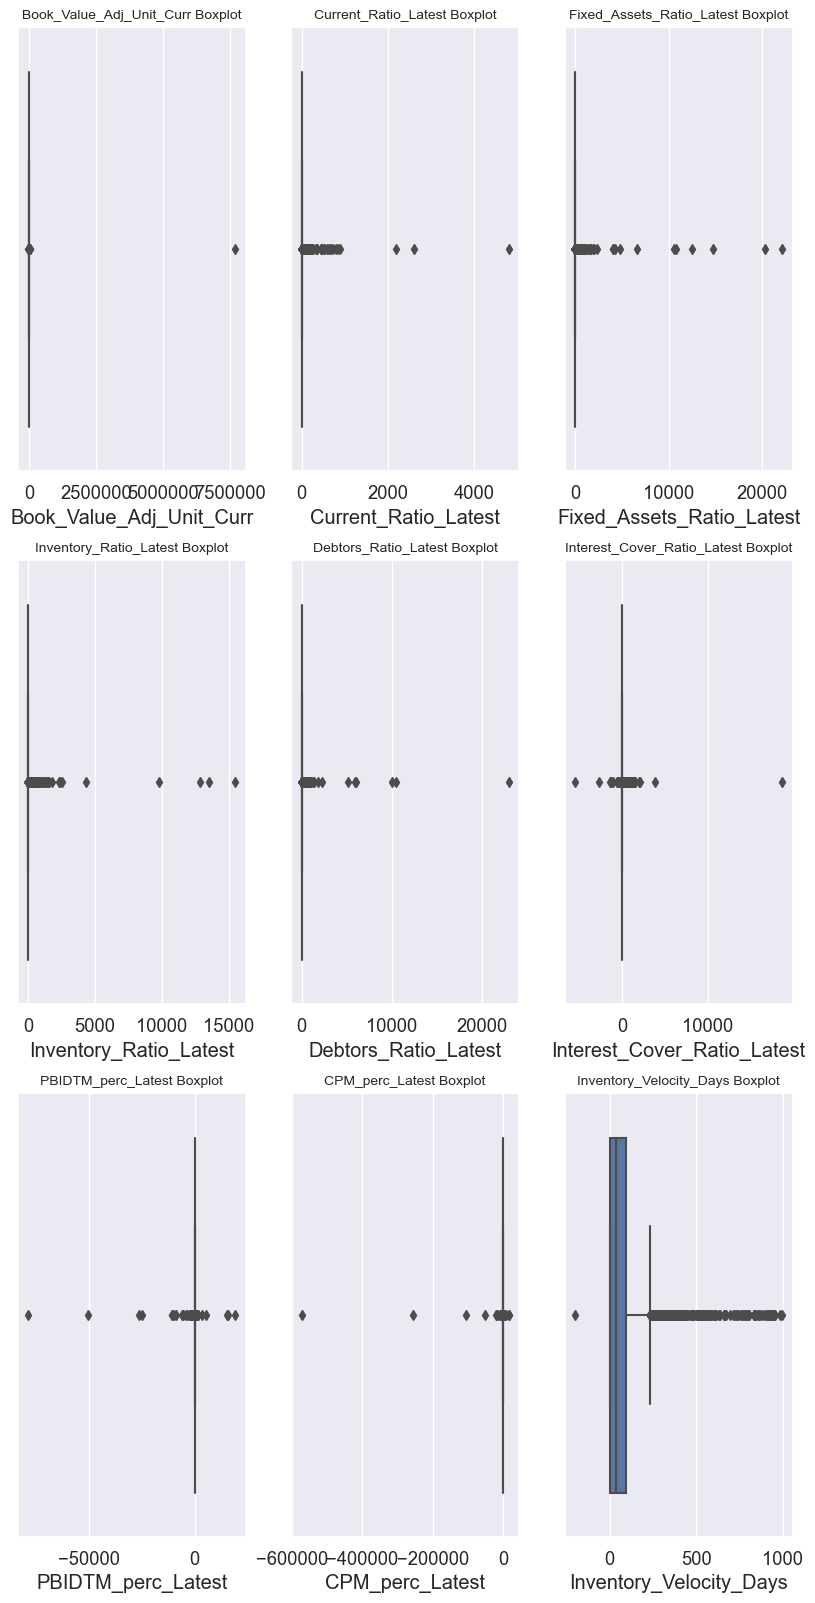

In [610]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(10,20)

a = sns.boxplot(X['Book_Value_Adj_Unit_Curr'] , ax=axes[0][0])
a.set_title("Book_Value_Adj_Unit_Curr Boxplot",fontsize=10)

a = sns.boxplot(X['Current_Ratio_Latest'] , ax=axes[0][1])
a.set_title("Current_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Fixed_Assets_Ratio_Latest'] , ax=axes[0][2])
a.set_title("Fixed_Assets_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Inventory_Ratio_Latest'] , ax=axes[1][0])
a.set_title("Inventory_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Debtors_Ratio_Latest'] , ax=axes[1][1])
a.set_title("Debtors_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Interest_Cover_Ratio_Latest'] , ax=axes[1][2])
a.set_title("Interest_Cover_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['PBIDTM_perc_Latest'] , ax=axes[2][0])
a.set_title("PBIDTM_perc_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['CPM_perc_Latest'] , ax=axes[2][1])
a.set_title("CPM_perc_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Inventory_Velocity_Days'] , ax=axes[2][2])
a.set_title("Inventory_Velocity_Days Boxplot",fontsize=10)

plt.show()

In [611]:
for feature in X: 
    lr,ur=treat_outlier(X[feature])
    X[feature]=np.where(X[feature]>ur,ur,X[feature])
    X[feature]=np.where(X[feature]<lr,lr,X[feature])

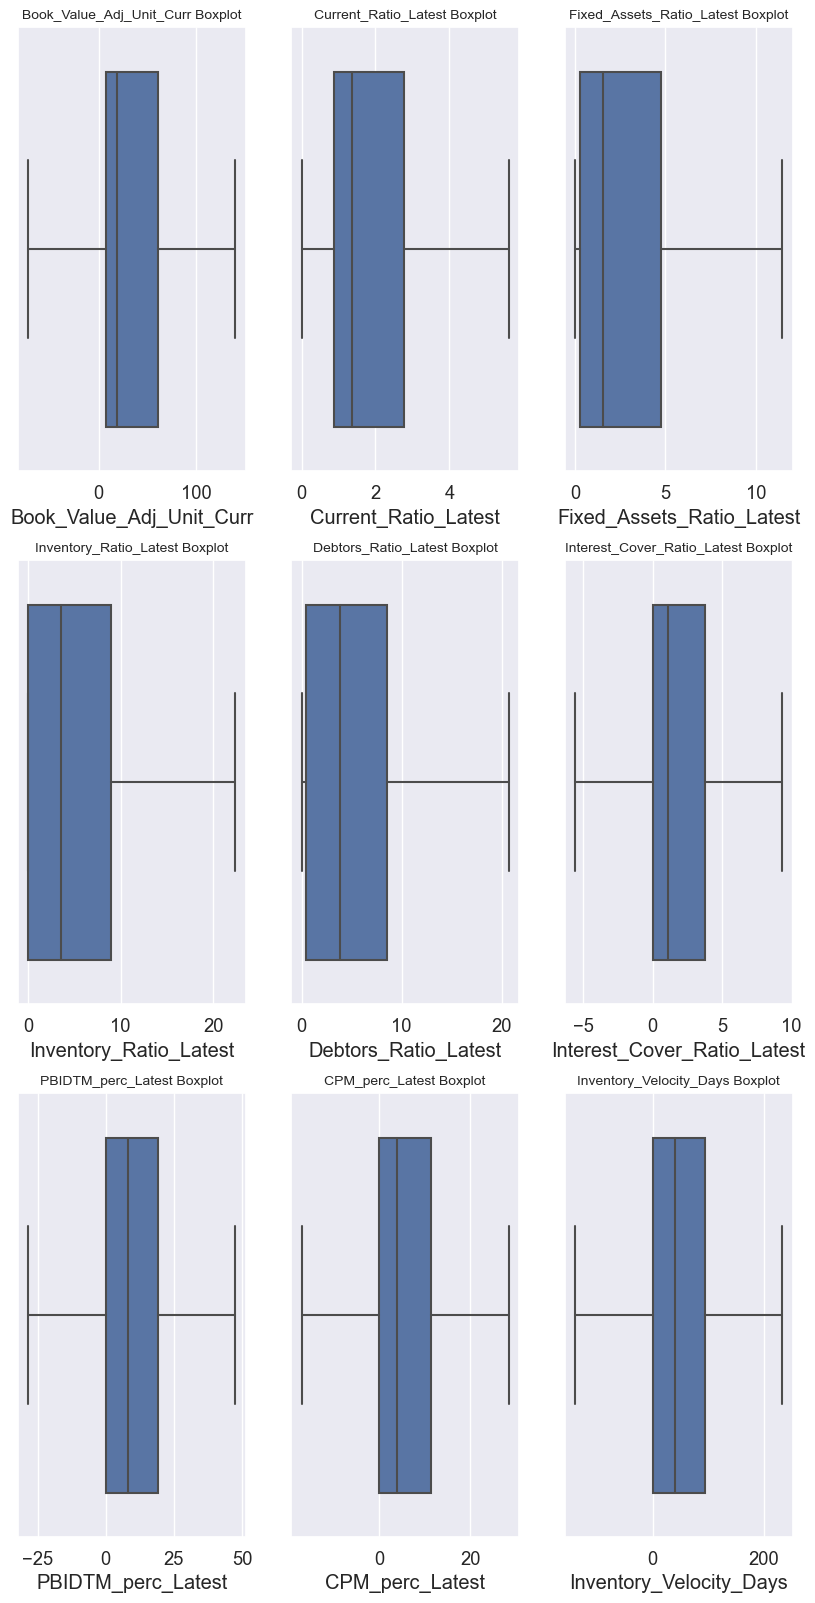

In [612]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(10,20)

a = sns.boxplot(X['Book_Value_Adj_Unit_Curr'] , ax=axes[0][0])
a.set_title("Book_Value_Adj_Unit_Curr Boxplot",fontsize=10)

a = sns.boxplot(X['Current_Ratio_Latest'] , ax=axes[0][1])
a.set_title("Current_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Fixed_Assets_Ratio_Latest'] , ax=axes[0][2])
a.set_title("Fixed_Assets_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Inventory_Ratio_Latest'] , ax=axes[1][0])
a.set_title("Inventory_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Debtors_Ratio_Latest'] , ax=axes[1][1])
a.set_title("Debtors_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Interest_Cover_Ratio_Latest'] , ax=axes[1][2])
a.set_title("Interest_Cover_Ratio_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['PBIDTM_perc_Latest'] , ax=axes[2][0])
a.set_title("PBIDTM_perc_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['CPM_perc_Latest'] , ax=axes[2][1])
a.set_title("CPM_perc_Latest Boxplot",fontsize=10)

a = sns.boxplot(X['Inventory_Velocity_Days'] , ax=axes[2][2])
a.set_title("Inventory_Velocity_Days Boxplot",fontsize=10)

plt.show()

In [613]:
from sklearn.model_selection import train_test_split

In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [615]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

### 1.6 Build Logistic Regression Model on most important variables on Train Dataset

In [616]:
#Default_train[Default_train.Capital_expenses_in_forex > 0].Capital_expenses_in_forex
#Default_train[Default_train.ROG_Revenue_earnings_in_forex_perc > 0].ROG_Revenue_earnings_in_forex_perc
#Default_train[Default_train.ROG_Revenue_expenses_in_forex_perc > 0].ROG_Revenue_expenses_in_forex_perc

In [617]:
#Default_train = Default_train.drop(['Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBIDTM_perc_Latest','CPM_perc_Latest','Inventory_Velocity_Days'], axis = 1)
#Default_test =  Default_test.drop(['Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBIDTM_perc_Latest','CPM_perc_Latest','Inventory_Velocity_Days'], axis = 1)

In [618]:
import statsmodels.formula.api as SM
formula_str = 'default ~ '+ ' + '.join(Default_train)
#print(formula_str)
model_1 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113023
         Iterations 11


#### Checking the coefficients

In [619]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           36
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6569
Time:                        10:46:24   Log-Likelihood:                -271.48
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.255e-195
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0860      0.260      0.331      0.740      -0.423       0.595
Equity_Paid_Up                         -0.0333      0.013     -2.620      0.009      -0.058      -0.008
Total_Debt                              0.0149      0.004      3.735      0.000       0.007       0.023
Net_Working_Capital                    -0.0034      0.004     -0.879      0.379      -0.011       0.004
Other_Income                            0.0382      0.060      0.634      0.526      -0.080       0.156
Selling_Cost                            0.0164      0.076      0.216      0.829      -0.132       0.165
Adjusted_PAT                           -0.0350      0.043     -0.813      0.416      -0.119       0.049
Revenue_earnings_in_forex               0.0086      0.031      0.277      0.782      -0.052       0.069
Revenue_expenses_in_forex               0.0258      0.033      0.786      0.432      -0.039       0.090
Book_Value_Unit_Curr                   -0.0883      0.045     -1.976      0.048      -0.176      -0.001
Book_Value_Adj_Unit_Curr               -0.0238      0.045     -0.530      0.596      -0.112       0.064
Market_Capitalisation                  -0.0031      0.003     -1.222      0.222      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0416      0.022     -1.892      0.059      -0.085       0.002
Cash_Flow_From_Investing_Activities    -0.0499      0.043     -1.157      0.247      -0.134       0.035
Cash_Flow_From_Financing_Activities    -0.0222      0.038     -0.583      0.560      -0.097       0.052
ROG_Net_Worth_perc                     -0.0212      0.011     -1.949      0.051      -0.042       0.000
ROG_Capital_Employed_perc               0.0236      0.011      2.245      0.025       0.003       0.044
ROG_Gross_Block_perc                   -0.0120      0.021     -0.577      0.564      -0.053       0.029
ROG_Net_Sales_perc                     -0.0025      0.004     -0.560      0.575      -0.011       0.006
ROG_Cost_of_Production_perc             0.0011      0.004      0.263      0.793      -0.007       0.009
ROG_Total_Assets_perc                  -0.0229      0.011     -2.153      0.031      -0.044      -0.002
ROG_PBIT_perc                           0.0003      0.002      0.162      0.871      -0.004       0.005
ROG_CP_perc                            -0.0010      0.002     -0.464      0.643      -0.005       0.003
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.915      0.360      -0.008       0.003
Current_Ratio_Latest                   -0.5373      0.094     -5.701      0.000      -0.722      -0.353
Fixed_Assets_Ratio_Latest              -0.0114      0.094     -0.121      0.904      -0.196       0.173
Inventory_Ratio_Latest                 -0.0408      0.023     -1.781      0.075      -0.086       0.004
Debtors_Ratio_Latest                   -0.0580      0.026     -2.211      0.027      -0.109      -0.007
Total_Asset_Turno

There are many insignificant features.Now we will try eliminating 1 at a time to see the feature significance.

### Model 2 - Eliminating the feature with highest p value first i.e Fixed_Assets_Ratio_Latest

In [620]:
model_2 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113026
         Iterations 11


#### Checking the coefficients

In [621]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           35
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6569
Time:                        10:46:24   Log-Likelihood:                -271.49
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.330e-195
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0858      0.260      0.331      0.741      -0.423       0.594
Equity_Paid_Up                         -0.0333      0.013     -2.617      0.009      -0.058      -0.008
Total_Debt                              0.0149      0.004      3.744      0.000       0.007       0.023
Net_Working_Capital                    -0.0034      0.004     -0.881      0.378      -0.011       0.004
Other_Income                            0.0384      0.060      0.639      0.523      -0.080       0.156
Selling_Cost                            0.0166      0.076      0.218      0.827      -0.132       0.165
Adjusted_PAT                           -0.0345      0.043     -0.805      0.421      -0.119       0.050
Revenue_earnings_in_forex               0.0087      0.031      0.280      0.780      -0.052       0.070
Revenue_expenses_in_forex               0.0257      0.033      0.783      0.434      -0.039       0.090
Book_Value_Unit_Curr                   -0.0879      0.044     -1.978      0.048      -0.175      -0.001
Book_Value_Adj_Unit_Curr               -0.0242      0.045     -0.543      0.587      -0.112       0.063
Market_Capitalisation                  -0.0031      0.003     -1.237      0.216      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0416      0.022     -1.893      0.058      -0.085       0.001
Cash_Flow_From_Investing_Activities    -0.0500      0.043     -1.160      0.246      -0.134       0.034
Cash_Flow_From_Financing_Activities    -0.0221      0.038     -0.581      0.561      -0.097       0.053
ROG_Net_Worth_perc                     -0.0212      0.011     -1.954      0.051      -0.042    7.01e-05
ROG_Capital_Employed_perc               0.0236      0.011      2.244      0.025       0.003       0.044
ROG_Gross_Block_perc                   -0.0119      0.021     -0.572      0.568      -0.052       0.029
ROG_Net_Sales_perc                     -0.0025      0.004     -0.566      0.571      -0.011       0.006
ROG_Cost_of_Production_perc             0.0011      0.004      0.261      0.794      -0.007       0.009
ROG_Total_Assets_perc                  -0.0230      0.011     -2.160      0.031      -0.044      -0.002
ROG_PBIT_perc                           0.0003      0.002      0.162      0.871      -0.004       0.005
ROG_CP_perc                            -0.0010      0.002     -0.466      0.641      -0.005       0.003
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.917      0.359      -0.008       0.003
Current_Ratio_Latest                   -0.5379      0.094     -5.712      0.000      -0.722      -0.353
Inventory_Ratio_Latest                 -0.0409      0.023     -1.793      0.073      -0.086       0.004
Debtors_Ratio_Latest                   -0.0581      0.026     -2.216      0.027      -0.110      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2355      0.234     -1.005      0.315      -0.695       0.224
Interest_Cover_Ra

Inventory_Velocity_Days has the highest p value, therefore, we will eliminate it.

## Model 3

In [622]:
model_3 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113030
         Iterations 11


In [623]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6569
Time:                        10:46:25   Log-Likelihood:                -271.50
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.405e-196
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0917      0.256      0.359      0.720      -0.409       0.593
Equity_Paid_Up                         -0.0333      0.013     -2.623      0.009      -0.058      -0.008
Total_Debt                              0.0149      0.004      3.747      0.000       0.007       0.023
Net_Working_Capital                    -0.0033      0.004     -0.872      0.383      -0.011       0.004
Other_Income                            0.0382      0.060      0.635      0.526      -0.080       0.156
Selling_Cost                            0.0160      0.076      0.211      0.833      -0.133       0.165
Adjusted_PAT                           -0.0349      0.043     -0.817      0.414      -0.119       0.049
Revenue_earnings_in_forex               0.0090      0.031      0.291      0.771      -0.052       0.070
Revenue_expenses_in_forex               0.0256      0.033      0.782      0.434      -0.039       0.090
Book_Value_Unit_Curr                   -0.0880      0.044     -1.977      0.048      -0.175      -0.001
Book_Value_Adj_Unit_Curr               -0.0240      0.045     -0.538      0.591      -0.111       0.063
Market_Capitalisation                  -0.0031      0.003     -1.231      0.218      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0417      0.022     -1.896      0.058      -0.085       0.001
Cash_Flow_From_Investing_Activities    -0.0500      0.043     -1.160      0.246      -0.134       0.034
Cash_Flow_From_Financing_Activities    -0.0223      0.038     -0.585      0.558      -0.097       0.052
ROG_Net_Worth_perc                     -0.0213      0.011     -1.961      0.050      -0.043   -1.47e-05
ROG_Capital_Employed_perc               0.0236      0.011      2.244      0.025       0.003       0.044
ROG_Gross_Block_perc                   -0.0117      0.021     -0.564      0.573      -0.052       0.029
ROG_Net_Sales_perc                     -0.0024      0.004     -0.553      0.580      -0.011       0.006
ROG_Cost_of_Production_perc             0.0010      0.004      0.239      0.811      -0.007       0.009
ROG_Total_Assets_perc                  -0.0230      0.011     -2.164      0.030      -0.044      -0.002
ROG_PBIT_perc                           0.0003      0.002      0.155      0.877      -0.004       0.005
ROG_CP_perc                            -0.0009      0.002     -0.457      0.648      -0.005       0.003
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.917      0.359      -0.008       0.003
Current_Ratio_Latest                   -0.5371      0.094     -5.717      0.000      -0.721      -0.353
Inventory_Ratio_Latest                 -0.0413      0.023     -1.823      0.068      -0.086       0.003
Debtors_Ratio_Latest                   -0.0579      0.026     -2.213      0.027      -0.109      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2340      0.234     -1.000      0.317      -0.693       0.225
Interest_Cover_Ra

ROG_PBIT_perc	is now with the highest p value so lets eliminate that too

### Model 4

In [624]:
model_4 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113035
         Iterations 11


In [625]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6569
Time:                        10:46:25   Log-Likelihood:                -271.51
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.299e-197
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0906      0.256      0.354      0.723      -0.410       0.591
Equity_Paid_Up                         -0.0334      0.013     -2.628      0.009      -0.058      -0.008
Total_Debt                              0.0150      0.004      3.750      0.000       0.007       0.023
Net_Working_Capital                    -0.0033      0.004     -0.867      0.386      -0.011       0.004
Other_Income                            0.0380      0.060      0.631      0.528      -0.080       0.156
Selling_Cost                            0.0158      0.076      0.209      0.834      -0.133       0.164
Adjusted_PAT                           -0.0350      0.043     -0.818      0.413      -0.119       0.049
Revenue_earnings_in_forex               0.0087      0.031      0.282      0.778      -0.052       0.069
Revenue_expenses_in_forex               0.0260      0.033      0.793      0.428      -0.038       0.090
Book_Value_Unit_Curr                   -0.0884      0.044     -1.993      0.046      -0.175      -0.001
Book_Value_Adj_Unit_Curr               -0.0237      0.044     -0.532      0.595      -0.111       0.064
Market_Capitalisation                  -0.0031      0.003     -1.222      0.222      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0414      0.022     -1.893      0.058      -0.084       0.001
Cash_Flow_From_Investing_Activities    -0.0493      0.043     -1.150      0.250      -0.133       0.035
Cash_Flow_From_Financing_Activities    -0.0220      0.038     -0.579      0.562      -0.096       0.052
ROG_Net_Worth_perc                     -0.0212      0.011     -1.958      0.050      -0.042    1.68e-05
ROG_Capital_Employed_perc               0.0236      0.010      2.251      0.024       0.003       0.044
ROG_Gross_Block_perc                   -0.0118      0.021     -0.569      0.569      -0.052       0.029
ROG_Net_Sales_perc                     -0.0024      0.004     -0.544      0.587      -0.011       0.006
ROG_Cost_of_Production_perc             0.0010      0.004      0.234      0.815      -0.007       0.009
ROG_Total_Assets_perc                  -0.0229      0.011     -2.160      0.031      -0.044      -0.002
ROG_CP_perc                            -0.0007      0.001     -0.539      0.590      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.925      0.355      -0.008       0.003
Current_Ratio_Latest                   -0.5365      0.094     -5.718      0.000      -0.720      -0.353
Inventory_Ratio_Latest                 -0.0412      0.023     -1.821      0.069      -0.086       0.003
Debtors_Ratio_Latest                   -0.0581      0.026     -2.225      0.026      -0.109      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2332      0.234     -0.998      0.318      -0.691       0.225
Interest_Cover_Ratio_Latest            -0.0985      0.049     -2.011      0.044      -0.195      -0.003
PBIDTM_perc_Lates

Selling_Cost is still having a high p value so lets eliminate it

### Model 5

In [626]:
model_5 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113044
         Iterations 11


In [627]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6569
Time:                        10:46:25   Log-Likelihood:                -271.53
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.636e-198
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0862      0.255      0.338      0.735      -0.413       0.585
Equity_Paid_Up                         -0.0335      0.013     -2.633      0.008      -0.058      -0.009
Total_Debt                              0.0151      0.004      3.855      0.000       0.007       0.023
Net_Working_Capital                    -0.0033      0.004     -0.855      0.393      -0.011       0.004
Other_Income                            0.0400      0.059      0.674      0.500      -0.076       0.156
Adjusted_PAT                           -0.0354      0.043     -0.828      0.407      -0.119       0.048
Revenue_earnings_in_forex               0.0102      0.030      0.342      0.732      -0.048       0.069
Revenue_expenses_in_forex               0.0273      0.032      0.852      0.394      -0.036       0.090
Book_Value_Unit_Curr                   -0.0880      0.044     -1.978      0.048      -0.175      -0.001
Book_Value_Adj_Unit_Curr               -0.0241      0.045     -0.539      0.590      -0.112       0.063
Market_Capitalisation                  -0.0030      0.002     -1.207      0.227      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0418      0.022     -1.924      0.054      -0.084       0.001
Cash_Flow_From_Investing_Activities    -0.0519      0.041     -1.266      0.205      -0.132       0.028
Cash_Flow_From_Financing_Activities    -0.0237      0.037     -0.639      0.523      -0.096       0.049
ROG_Net_Worth_perc                     -0.0213      0.011     -1.971      0.049      -0.043      -0.000
ROG_Capital_Employed_perc               0.0236      0.010      2.246      0.025       0.003       0.044
ROG_Gross_Block_perc                   -0.0118      0.021     -0.571      0.568      -0.052       0.029
ROG_Net_Sales_perc                     -0.0024      0.004     -0.541      0.588      -0.011       0.006
ROG_Cost_of_Production_perc             0.0010      0.004      0.233      0.816      -0.007       0.009
ROG_Total_Assets_perc                  -0.0228      0.011     -2.153      0.031      -0.044      -0.002
ROG_CP_perc                            -0.0007      0.001     -0.538      0.591      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.940      0.347      -0.008       0.003
Current_Ratio_Latest                   -0.5362      0.094     -5.712      0.000      -0.720      -0.352
Inventory_Ratio_Latest                 -0.0417      0.023     -1.848      0.065      -0.086       0.003
Debtors_Ratio_Latest                   -0.0575      0.026     -2.216      0.027      -0.108      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2314      0.233     -0.992      0.321      -0.689       0.226
Interest_Cover_Ratio_Latest            -0.0982      0.049     -2.006      0.045      -0.194      -0.002
PBIDTM_perc_Latest                     -0.0511      0.016     -3.250      0.001      -0.082      -0.020
CPM_perc_Latest  

Revenue_earnings_in_forex is still insignificant so lets eliminate it

### Model 6

In [628]:
model_6 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113068
         Iterations 11


In [629]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6568
Time:                        10:46:26   Log-Likelihood:                -271.59
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.383e-198
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0877      0.255      0.344      0.731      -0.411       0.587
Equity_Paid_Up                         -0.0333      0.013     -2.621      0.009      -0.058      -0.008
Total_Debt                              0.0153      0.004      3.919      0.000       0.008       0.023
Net_Working_Capital                    -0.0033      0.004     -0.858      0.391      -0.011       0.004
Other_Income                            0.0416      0.059      0.704      0.481      -0.074       0.158
Adjusted_PAT                           -0.0341      0.043     -0.802      0.422      -0.117       0.049
Revenue_expenses_in_forex               0.0318      0.029      1.091      0.275      -0.025       0.089
Book_Value_Unit_Curr                   -0.0882      0.044     -2.011      0.044      -0.174      -0.002
Book_Value_Adj_Unit_Curr               -0.0235      0.044     -0.534      0.594      -0.110       0.063
Market_Capitalisation                  -0.0030      0.002     -1.203      0.229      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0411      0.022     -1.900      0.057      -0.084       0.001
Cash_Flow_From_Investing_Activities    -0.0516      0.041     -1.259      0.208      -0.132       0.029
Cash_Flow_From_Financing_Activities    -0.0236      0.037     -0.637      0.524      -0.096       0.049
ROG_Net_Worth_perc                     -0.0215      0.011     -1.989      0.047      -0.043      -0.000
ROG_Capital_Employed_perc               0.0237      0.010      2.256      0.024       0.003       0.044
ROG_Gross_Block_perc                   -0.0115      0.021     -0.559      0.576      -0.052       0.029
ROG_Net_Sales_perc                     -0.0024      0.004     -0.541      0.588      -0.011       0.006
ROG_Cost_of_Production_perc             0.0010      0.004      0.234      0.815      -0.007       0.009
ROG_Total_Assets_perc                  -0.0228      0.011     -2.149      0.032      -0.044      -0.002
ROG_CP_perc                            -0.0007      0.001     -0.539      0.590      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.907      0.364      -0.008       0.003
Current_Ratio_Latest                   -0.5368      0.094     -5.721      0.000      -0.721      -0.353
Inventory_Ratio_Latest                 -0.0417      0.023     -1.853      0.064      -0.086       0.002
Debtors_Ratio_Latest                   -0.0573      0.026     -2.214      0.027      -0.108      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2275      0.233     -0.978      0.328      -0.684       0.228
Interest_Cover_Ratio_Latest            -0.0973      0.049     -1.994      0.046      -0.193      -0.002
PBIDTM_perc_Latest                     -0.0508      0.016     -3.242      0.001      -0.082      -0.020
CPM_perc_Latest                         0.0427      0.024      1.745      0.081      -0.005       0.091
Debtors_Velocity_

ROG_Cost_of_Production_perc is still insignificant so lets elimiate it.

### Model 7

In [630]:
model_7 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113080
         Iterations 11


In [631]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6568
Time:                        10:46:26   Log-Likelihood:                -271.62
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.390e-199
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0934      0.253      0.368      0.713      -0.403       0.590
Equity_Paid_Up                         -0.0332      0.013     -2.613      0.009      -0.058      -0.008
Total_Debt                              0.0152      0.004      3.914      0.000       0.008       0.023
Net_Working_Capital                    -0.0033      0.004     -0.870      0.384      -0.011       0.004
Other_Income                            0.0419      0.059      0.709      0.479      -0.074       0.158
Adjusted_PAT                           -0.0343      0.043     -0.805      0.421      -0.118       0.049
Revenue_expenses_in_forex               0.0318      0.029      1.090      0.276      -0.025       0.089
Book_Value_Unit_Curr                   -0.0875      0.044     -1.998      0.046      -0.173      -0.002
Book_Value_Adj_Unit_Curr               -0.0241      0.044     -0.548      0.584      -0.110       0.062
Market_Capitalisation                  -0.0030      0.002     -1.200      0.230      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0410      0.022     -1.895      0.058      -0.083       0.001
Cash_Flow_From_Investing_Activities    -0.0511      0.041     -1.249      0.211      -0.131       0.029
Cash_Flow_From_Financing_Activities    -0.0234      0.037     -0.631      0.528      -0.096       0.049
ROG_Net_Worth_perc                     -0.0215      0.011     -1.990      0.047      -0.043      -0.000
ROG_Capital_Employed_perc               0.0238      0.010      2.266      0.023       0.003       0.044
ROG_Gross_Block_perc                   -0.0110      0.020     -0.536      0.592      -0.051       0.029
ROG_Net_Sales_perc                     -0.0018      0.004     -0.492      0.623      -0.009       0.005
ROG_Total_Assets_perc                  -0.0228      0.011     -2.148      0.032      -0.044      -0.002
ROG_CP_perc                            -0.0007      0.001     -0.535      0.593      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.917      0.359      -0.008       0.003
Current_Ratio_Latest                   -0.5366      0.094     -5.719      0.000      -0.720      -0.353
Inventory_Ratio_Latest                 -0.0418      0.023     -1.857      0.063      -0.086       0.002
Debtors_Ratio_Latest                   -0.0575      0.026     -2.222      0.026      -0.108      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2270      0.233     -0.975      0.329      -0.683       0.229
Interest_Cover_Ratio_Latest            -0.0971      0.049     -1.990      0.047      -0.193      -0.001
PBIDTM_perc_Latest                     -0.0506      0.016     -3.232      0.001      -0.081      -0.020
CPM_perc_Latest                         0.0425      0.024      1.737      0.082      -0.005       0.090
Debtors_Velocity_Days                  -0.0035      0.001     -2.431      0.015      -0.006      -0.001
Creditors_Velocit

ROG_Net_Sales_perc is still insignificant so lets eliminate it.

### Model 8

In [632]:
model_8 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113130
         Iterations 11


In [633]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6566
Time:                        10:46:27   Log-Likelihood:                -271.74
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.451e-200
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0896      0.253      0.354      0.724      -0.407       0.586
Equity_Paid_Up                         -0.0332      0.013     -2.618      0.009      -0.058      -0.008
Total_Debt                              0.0153      0.004      3.926      0.000       0.008       0.023
Net_Working_Capital                    -0.0032      0.004     -0.841      0.401      -0.011       0.004
Other_Income                            0.0435      0.059      0.735      0.462      -0.072       0.159
Adjusted_PAT                           -0.0333      0.042     -0.785      0.432      -0.117       0.050
Revenue_expenses_in_forex               0.0320      0.029      1.096      0.273      -0.025       0.089
Book_Value_Unit_Curr                   -0.0873      0.044     -1.993      0.046      -0.173      -0.001
Book_Value_Adj_Unit_Curr               -0.0246      0.044     -0.558      0.577      -0.111       0.062
Market_Capitalisation                  -0.0030      0.002     -1.219      0.223      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0406      0.022     -1.881      0.060      -0.083       0.002
Cash_Flow_From_Investing_Activities    -0.0506      0.041     -1.241      0.215      -0.131       0.029
Cash_Flow_From_Financing_Activities    -0.0228      0.037     -0.616      0.538      -0.095       0.050
ROG_Net_Worth_perc                     -0.0217      0.011     -2.009      0.044      -0.043      -0.001
ROG_Capital_Employed_perc               0.0239      0.010      2.277      0.023       0.003       0.044
ROG_Gross_Block_perc                   -0.0120      0.020     -0.588      0.557      -0.052       0.028
ROG_Total_Assets_perc                  -0.0229      0.011     -2.161      0.031      -0.044      -0.002
ROG_CP_perc                            -0.0008      0.001     -0.607      0.544      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0028      0.003     -0.984      0.325      -0.008       0.003
Current_Ratio_Latest                   -0.5369      0.094     -5.734      0.000      -0.720      -0.353
Inventory_Ratio_Latest                 -0.0413      0.022     -1.836      0.066      -0.085       0.003
Debtors_Ratio_Latest                   -0.0577      0.026     -2.229      0.026      -0.108      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2304      0.232     -0.991      0.322      -0.686       0.225
Interest_Cover_Ratio_Latest            -0.0979      0.049     -2.009      0.044      -0.193      -0.002
PBIDTM_perc_Latest                     -0.0510      0.016     -3.257      0.001      -0.082      -0.020
CPM_perc_Latest                         0.0425      0.024      1.741      0.082      -0.005       0.090
Debtors_Velocity_Days                  -0.0034      0.001     -2.406      0.016      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.002      1.772      0.076      -0.000       0.006
Value_of_Output_b

Book_Value_Adj_Unit_Curr is still insignificant. Lets eliminate that too.

### Model 9

In [634]:
model_9 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113212
         Iterations 10


In [635]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6564
Time:                        10:46:27   Log-Likelihood:                -271.93
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.749e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0893      0.253      0.353      0.724      -0.407       0.585
Equity_Paid_Up                         -0.0334      0.013     -2.638      0.008      -0.058      -0.009
Total_Debt                              0.0154      0.004      3.951      0.000       0.008       0.023
Net_Working_Capital                    -0.0032      0.004     -0.846      0.398      -0.011       0.004
Other_Income                            0.0441      0.059      0.747      0.455      -0.072       0.160
Adjusted_PAT                           -0.0329      0.043     -0.774      0.439      -0.116       0.050
Revenue_expenses_in_forex               0.0318      0.029      1.085      0.278      -0.026       0.089
Book_Value_Unit_Curr                   -0.1112      0.011    -10.005      0.000      -0.133      -0.089
Market_Capitalisation                  -0.0031      0.002     -1.231      0.218      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0409      0.022     -1.903      0.057      -0.083       0.001
Cash_Flow_From_Investing_Activities    -0.0504      0.041     -1.236      0.216      -0.130       0.029
Cash_Flow_From_Financing_Activities    -0.0227      0.037     -0.615      0.538      -0.095       0.050
ROG_Net_Worth_perc                     -0.0219      0.011     -2.018      0.044      -0.043      -0.001
ROG_Capital_Employed_perc               0.0238      0.010      2.271      0.023       0.003       0.044
ROG_Gross_Block_perc                   -0.0122      0.020     -0.601      0.548      -0.052       0.028
ROG_Total_Assets_perc                  -0.0228      0.011     -2.155      0.031      -0.044      -0.002
ROG_CP_perc                            -0.0007      0.001     -0.585      0.559      -0.003       0.002
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.962      0.336      -0.008       0.003
Current_Ratio_Latest                   -0.5404      0.094     -5.760      0.000      -0.724      -0.357
Inventory_Ratio_Latest                 -0.0413      0.023     -1.835      0.066      -0.085       0.003
Debtors_Ratio_Latest                   -0.0575      0.026     -2.222      0.026      -0.108      -0.007
Total_Asset_Turnover_Ratio_Latest      -0.2325      0.233     -1.000      0.317      -0.688       0.223
Interest_Cover_Ratio_Latest            -0.0984      0.049     -2.019      0.044      -0.194      -0.003
PBIDTM_perc_Latest                     -0.0510      0.016     -3.255      0.001      -0.082      -0.020
CPM_perc_Latest                         0.0428      0.024      1.753      0.080      -0.005       0.091
Debtors_Velocity_Days                  -0.0034      0.001     -2.421      0.015      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.002      1.778      0.075      -0.000       0.006
Value_of_Output_by_Total_Assets         0.8052      0.393      2.049      0.040       0.035       1.575
Value_of_Output_b

ROG_CP_perc seems to be insignificant with a high p value so lets eliminate this too.

### Model 10

In [636]:
model_10 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113283
         Iterations 10


In [637]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6561
Time:                        10:46:27   Log-Likelihood:                -272.11
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.651e-201
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0827      0.253      0.327      0.744      -0.413       0.579
Equity_Paid_Up                         -0.0337      0.013     -2.662      0.008      -0.058      -0.009
Total_Debt                              0.0155      0.004      3.980      0.000       0.008       0.023
Net_Working_Capital                    -0.0031      0.004     -0.830      0.407      -0.011       0.004
Other_Income                            0.0409      0.059      0.695      0.487      -0.074       0.156
Adjusted_PAT                           -0.0358      0.042     -0.846      0.397      -0.119       0.047
Revenue_expenses_in_forex               0.0315      0.029      1.076      0.282      -0.026       0.089
Book_Value_Unit_Curr                   -0.1109      0.011    -10.008      0.000      -0.133      -0.089
Market_Capitalisation                  -0.0031      0.002     -1.231      0.218      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0407      0.022     -1.890      0.059      -0.083       0.001
Cash_Flow_From_Investing_Activities    -0.0505      0.041     -1.240      0.215      -0.130       0.029
Cash_Flow_From_Financing_Activities    -0.0223      0.037     -0.605      0.545      -0.095       0.050
ROG_Net_Worth_perc                     -0.0231      0.011     -2.172      0.030      -0.044      -0.002
ROG_Capital_Employed_perc               0.0234      0.010      2.239      0.025       0.003       0.044
ROG_Gross_Block_perc                   -0.0117      0.020     -0.576      0.565      -0.052       0.028
ROG_Total_Assets_perc                  -0.0232      0.011     -2.196      0.028      -0.044      -0.002
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.948      0.343      -0.008       0.003
Current_Ratio_Latest                   -0.5394      0.094     -5.756      0.000      -0.723      -0.356
Inventory_Ratio_Latest                 -0.0405      0.022     -1.808      0.071      -0.084       0.003
Debtors_Ratio_Latest                   -0.0568      0.026     -2.198      0.028      -0.107      -0.006
Total_Asset_Turnover_Ratio_Latest      -0.2375      0.232     -1.024      0.306      -0.692       0.217
Interest_Cover_Ratio_Latest            -0.0981      0.049     -2.017      0.044      -0.193      -0.003
PBIDTM_perc_Latest                     -0.0516      0.016     -3.285      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0432      0.025      1.757      0.079      -0.005       0.091
Debtors_Velocity_Days                  -0.0034      0.001     -2.403      0.016      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.002      1.774      0.076      -0.000       0.006
Value_of_Output_by_Total_Assets         0.8055      0.393      2.048      0.041       0.035       1.576
Value_of_Output_by_Gross_Block         -0.1029      0.050     -2.068      0.039      -0.200      -0.005
=================

ROG_Gross_Block_perc is the next insignificant value so lets eliminate it.

### Model 11

In [638]:
model_11 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113352
         Iterations 10


In [639]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6559
Time:                        10:46:28   Log-Likelihood:                -272.27
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.041e-202
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0852      0.253      0.337      0.736      -0.411       0.581
Equity_Paid_Up                         -0.0334      0.013     -2.645      0.008      -0.058      -0.009
Total_Debt                              0.0153      0.004      3.951      0.000       0.008       0.023
Net_Working_Capital                    -0.0030      0.004     -0.799      0.424      -0.010       0.004
Other_Income                            0.0414      0.059      0.707      0.480      -0.073       0.156
Adjusted_PAT                           -0.0377      0.042     -0.894      0.371      -0.120       0.045
Revenue_expenses_in_forex               0.0307      0.029      1.048      0.295      -0.027       0.088
Book_Value_Unit_Curr                   -0.1114      0.011    -10.057      0.000      -0.133      -0.090
Market_Capitalisation                  -0.0031      0.002     -1.229      0.219      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0402      0.022     -1.867      0.062      -0.082       0.002
Cash_Flow_From_Investing_Activities    -0.0477      0.040     -1.178      0.239      -0.127       0.032
Cash_Flow_From_Financing_Activities    -0.0227      0.037     -0.616      0.538      -0.095       0.050
ROG_Net_Worth_perc                     -0.0229      0.011     -2.166      0.030      -0.044      -0.002
ROG_Capital_Employed_perc               0.0232      0.010      2.219      0.026       0.003       0.044
ROG_Total_Assets_perc                  -0.0238      0.011     -2.260      0.024      -0.044      -0.003
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.919      0.358      -0.008       0.003
Current_Ratio_Latest                   -0.5388      0.094     -5.745      0.000      -0.723      -0.355
Inventory_Ratio_Latest                 -0.0407      0.022     -1.823      0.068      -0.085       0.003
Debtors_Ratio_Latest                   -0.0566      0.026     -2.193      0.028      -0.107      -0.006
Total_Asset_Turnover_Ratio_Latest      -0.2461      0.232     -1.061      0.289      -0.701       0.209
Interest_Cover_Ratio_Latest            -0.0961      0.048     -1.988      0.047      -0.191      -0.001
PBIDTM_perc_Latest                     -0.0520      0.016     -3.309      0.001      -0.083      -0.021
CPM_perc_Latest                         0.0438      0.025      1.781      0.075      -0.004       0.092
Debtors_Velocity_Days                  -0.0033      0.001     -2.367      0.018      -0.006      -0.001
Creditors_Velocity_Days                 0.0026      0.002      1.752      0.080      -0.000       0.006
Value_of_Output_by_Total_Assets         0.8075      0.394      2.047      0.041       0.034       1.580
Value_of_Output_by_Gross_Block         -0.1048      0.050     -2.112      0.035      -0.202      -0.008
=======================================================================================================

Possibly complet

Cash_Flow_From_Financing_Activities is the next insignificant feature which we will be eliminating

### Model 12

In [640]:
model_12 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Other_Income + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113432
         Iterations 10


In [641]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6557
Time:                        10:46:28   Log-Likelihood:                -272.46
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.627e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0926      0.253      0.367      0.714      -0.402       0.588
Equity_Paid_Up                         -0.0341      0.013     -2.710      0.007      -0.059      -0.009
Total_Debt                              0.0155      0.004      4.012      0.000       0.008       0.023
Net_Working_Capital                    -0.0030      0.004     -0.789      0.430      -0.010       0.004
Other_Income                            0.0455      0.058      0.783      0.434      -0.068       0.159
Adjusted_PAT                           -0.0386      0.042     -0.916      0.360      -0.121       0.044
Revenue_expenses_in_forex               0.0295      0.029      1.012      0.311      -0.028       0.087
Book_Value_Unit_Curr                   -0.1109      0.011    -10.111      0.000      -0.132      -0.089
Market_Capitalisation                  -0.0030      0.002     -1.224      0.221      -0.008       0.002
Cash_Flow_From_Operating_Activities    -0.0300      0.014     -2.193      0.028      -0.057      -0.003
Cash_Flow_From_Investing_Activities    -0.0337      0.033     -1.007      0.314      -0.099       0.032
ROG_Net_Worth_perc                     -0.0225      0.011     -2.138      0.033      -0.043      -0.002
ROG_Capital_Employed_perc               0.0223      0.010      2.154      0.031       0.002       0.043
ROG_Total_Assets_perc                  -0.0243      0.011     -2.311      0.021      -0.045      -0.004
ROG_Market_Capitalisation_perc         -0.0025      0.003     -0.895      0.371      -0.008       0.003
Current_Ratio_Latest                   -0.5406      0.094     -5.770      0.000      -0.724      -0.357
Inventory_Ratio_Latest                 -0.0397      0.022     -1.786      0.074      -0.083       0.004
Debtors_Ratio_Latest                   -0.0561      0.026     -2.175      0.030      -0.107      -0.006
Total_Asset_Turnover_Ratio_Latest      -0.2479      0.232     -1.069      0.285      -0.703       0.207
Interest_Cover_Ratio_Latest            -0.0918      0.048     -1.930      0.054      -0.185       0.001
PBIDTM_perc_Latest                     -0.0520      0.016     -3.311      0.001      -0.083      -0.021
CPM_perc_Latest                         0.0438      0.025      1.786      0.074      -0.004       0.092
Debtors_Velocity_Days                  -0.0033      0.001     -2.364      0.018      -0.006      -0.001
Creditors_Velocity_Days                 0.0026      0.002      1.733      0.083      -0.000       0.006
Value_of_Output_by_Total_Assets         0.8077      0.394      2.048      0.041       0.035       1.581
Value_of_Output_by_Gross_Block         -0.1059      0.050     -2.135      0.033      -0.203      -0.009
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that

Other_Income will be eliminiated the next

### Model 13

In [642]:
model_13 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113558
         Iterations 10


In [643]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6553
Time:                        10:46:28   Log-Likelihood:                -272.77
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.138e-203
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0994      0.252      0.394      0.694      -0.395       0.594
Equity_Paid_Up                         -0.0332      0.013     -2.650      0.008      -0.058      -0.009
Total_Debt                              0.0161      0.004      4.234      0.000       0.009       0.023
Net_Working_Capital                    -0.0026      0.004     -0.699      0.485      -0.010       0.005
Adjusted_PAT                           -0.0442      0.042     -1.061      0.289      -0.126       0.037
Revenue_expenses_in_forex               0.0316      0.029      1.087      0.277      -0.025       0.089
Book_Value_Unit_Curr                   -0.1113      0.011    -10.151      0.000      -0.133      -0.090
Market_Capitalisation                  -0.0026      0.002     -1.071      0.284      -0.007       0.002
Cash_Flow_From_Operating_Activities    -0.0288      0.014     -2.108      0.035      -0.056      -0.002
Cash_Flow_From_Investing_Activities    -0.0331      0.034     -0.985      0.324      -0.099       0.033
ROG_Net_Worth_perc                     -0.0208      0.010     -2.022      0.043      -0.041      -0.001
ROG_Capital_Employed_perc               0.0222      0.010      2.137      0.033       0.002       0.043
ROG_Total_Assets_perc                  -0.0247      0.011     -2.347      0.019      -0.045      -0.004
ROG_Market_Capitalisation_perc         -0.0025      0.003     -0.903      0.367      -0.008       0.003
Current_Ratio_Latest                   -0.5449      0.094     -5.814      0.000      -0.729      -0.361
Inventory_Ratio_Latest                 -0.0402      0.022     -1.808      0.071      -0.084       0.003
Debtors_Ratio_Latest                   -0.0537      0.026     -2.099      0.036      -0.104      -0.004
Total_Asset_Turnover_Ratio_Latest      -0.2465      0.233     -1.060      0.289      -0.702       0.209
Interest_Cover_Ratio_Latest            -0.0911      0.047     -1.920      0.055      -0.184       0.002
PBIDTM_perc_Latest                     -0.0516      0.016     -3.291      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0436      0.025      1.778      0.075      -0.004       0.092
Debtors_Velocity_Days                  -0.0033      0.001     -2.362      0.018      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.001      1.791      0.073      -0.000       0.006
Value_of_Output_by_Total_Assets         0.8010      0.394      2.035      0.042       0.029       1.573
Value_of_Output_by_Gross_Block         -0.1067      0.049     -2.164      0.030      -0.203      -0.010
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Lets eliminate Net_Working_Capital

### Model 14

In [644]:
model_14 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113660
         Iterations 10


In [645]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6550
Time:                        10:46:28   Log-Likelihood:                -273.01
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.128e-204
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1141      0.251      0.454      0.650      -0.379       0.607
Equity_Paid_Up                         -0.0332      0.012     -2.661      0.008      -0.058      -0.009
Total_Debt                              0.0149      0.003      4.359      0.000       0.008       0.022
Adjusted_PAT                           -0.0451      0.041     -1.090      0.276      -0.126       0.036
Revenue_expenses_in_forex               0.0298      0.029      1.029      0.304      -0.027       0.087
Book_Value_Unit_Curr                   -0.1126      0.011    -10.409      0.000      -0.134      -0.091
Market_Capitalisation                  -0.0026      0.002     -1.086      0.278      -0.007       0.002
Cash_Flow_From_Operating_Activities    -0.0283      0.013     -2.101      0.036      -0.055      -0.002
Cash_Flow_From_Investing_Activities    -0.0326      0.033     -0.979      0.328      -0.098       0.033
ROG_Net_Worth_perc                     -0.0203      0.010     -1.979      0.048      -0.040      -0.000
ROG_Capital_Employed_perc               0.0216      0.010      2.084      0.037       0.001       0.042
ROG_Total_Assets_perc                  -0.0245      0.011     -2.331      0.020      -0.045      -0.004
ROG_Market_Capitalisation_perc         -0.0024      0.003     -0.873      0.383      -0.008       0.003
Current_Ratio_Latest                   -0.5524      0.094     -5.900      0.000      -0.736      -0.369
Inventory_Ratio_Latest                 -0.0374      0.022     -1.722      0.085      -0.080       0.005
Debtors_Ratio_Latest                   -0.0511      0.025     -2.031      0.042      -0.100      -0.002
Total_Asset_Turnover_Ratio_Latest      -0.2525      0.232     -1.087      0.277      -0.707       0.203
Interest_Cover_Ratio_Latest            -0.0896      0.047     -1.894      0.058      -0.182       0.003
PBIDTM_perc_Latest                     -0.0512      0.016     -3.273      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0429      0.024      1.756      0.079      -0.005       0.091
Debtors_Velocity_Days                  -0.0035      0.001     -2.531      0.011      -0.006      -0.001
Creditors_Velocity_Days                 0.0028      0.001      1.845      0.065      -0.000       0.006
Value_of_Output_by_Total_Assets         0.7801      0.392      1.989      0.047       0.012       1.549
Value_of_Output_by_Gross_Block         -0.1063      0.049     -2.156      0.031      -0.203      -0.010
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ROG_Market_Capitalisation_perc will be eliminated the next

### Model 14

In [646]:
model_15 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Adjusted_PAT + Revenue_expenses_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113820
         Iterations 10


In [647]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6545
Time:                        10:46:29   Log-Likelihood:                -273.40
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.466e-205
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1042      0.251      0.415      0.678      -0.388       0.596
Equity_Paid_Up                         -0.0327      0.012     -2.623      0.009      -0.057      -0.008
Total_Debt                              0.0150      0.003      4.377      0.000       0.008       0.022
Adjusted_PAT                           -0.0478      0.041     -1.159      0.246      -0.129       0.033
Revenue_expenses_in_forex               0.0283      0.029      0.978      0.328      -0.028       0.085
Book_Value_Unit_Curr                   -0.1126      0.011    -10.412      0.000      -0.134      -0.091
Market_Capitalisation                  -0.0032      0.002     -1.383      0.167      -0.008       0.001
Cash_Flow_From_Operating_Activities    -0.0283      0.013     -2.110      0.035      -0.055      -0.002
Cash_Flow_From_Investing_Activities    -0.0352      0.033     -1.061      0.289      -0.100       0.030
ROG_Net_Worth_perc                     -0.0205      0.010     -2.007      0.045      -0.041      -0.000
ROG_Capital_Employed_perc               0.0211      0.010      2.051      0.040       0.001       0.041
ROG_Total_Assets_perc                  -0.0242      0.010     -2.306      0.021      -0.045      -0.004
Current_Ratio_Latest                   -0.5504      0.094     -5.876      0.000      -0.734      -0.367
Inventory_Ratio_Latest                 -0.0369      0.022     -1.700      0.089      -0.080       0.006
Debtors_Ratio_Latest                   -0.0507      0.025     -2.012      0.044      -0.100      -0.001
Total_Asset_Turnover_Ratio_Latest      -0.2612      0.231     -1.131      0.258      -0.714       0.192
Interest_Cover_Ratio_Latest            -0.0894      0.047     -1.900      0.057      -0.182       0.003
PBIDTM_perc_Latest                     -0.0513      0.016     -3.282      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0433      0.024      1.780      0.075      -0.004       0.091
Debtors_Velocity_Days                  -0.0035      0.001     -2.552      0.011      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.001      1.813      0.070      -0.000       0.006
Value_of_Output_by_Total_Assets         0.7525      0.387      1.944      0.052      -0.006       1.511
Value_of_Output_by_Gross_Block         -0.0995      0.048     -2.058      0.040      -0.194      -0.005
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Revenue_expenses_in_forex will be eliminated the next.

### Model 16

In [648]:
model_16 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Adjusted_PAT + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114016
         Iterations 10


In [649]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6539
Time:                        10:46:29   Log-Likelihood:                -273.87
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.972e-206
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1117      0.251      0.445      0.656      -0.380       0.604
Equity_Paid_Up                         -0.0333      0.012     -2.666      0.008      -0.058      -0.009
Total_Debt                              0.0160      0.003      4.925      0.000       0.010       0.022
Adjusted_PAT                           -0.0463      0.041     -1.125      0.260      -0.127       0.034
Book_Value_Unit_Curr                   -0.1124      0.011    -10.404      0.000      -0.134      -0.091
Market_Capitalisation                  -0.0026      0.002     -1.193      0.233      -0.007       0.002
Cash_Flow_From_Operating_Activities    -0.0259      0.013     -1.969      0.049      -0.052      -0.000
Cash_Flow_From_Investing_Activities    -0.0368      0.033     -1.118      0.263      -0.101       0.028
ROG_Net_Worth_perc                     -0.0211      0.010     -2.070      0.038      -0.041      -0.001
ROG_Capital_Employed_perc               0.0215      0.010      2.091      0.037       0.001       0.042
ROG_Total_Assets_perc                  -0.0239      0.010     -2.291      0.022      -0.044      -0.003
Current_Ratio_Latest                   -0.5524      0.094     -5.904      0.000      -0.736      -0.369
Inventory_Ratio_Latest                 -0.0378      0.022     -1.749      0.080      -0.080       0.005
Debtors_Ratio_Latest                   -0.0514      0.025     -2.046      0.041      -0.101      -0.002
Total_Asset_Turnover_Ratio_Latest      -0.2356      0.229     -1.029      0.303      -0.684       0.213
Interest_Cover_Ratio_Latest            -0.0864      0.047     -1.855      0.064      -0.178       0.005
PBIDTM_perc_Latest                     -0.0515      0.016     -3.302      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0427      0.024      1.760      0.078      -0.005       0.090
Debtors_Velocity_Days                  -0.0036      0.001     -2.589      0.010      -0.006      -0.001
Creditors_Velocity_Days                 0.0027      0.001      1.804      0.071      -0.000       0.006
Value_of_Output_by_Total_Assets         0.7638      0.386      1.979      0.048       0.007       1.520
Value_of_Output_by_Gross_Block         -0.1020      0.048     -2.116      0.034      -0.196      -0.008
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Cash_Flow_From_Investing_Activities will be the next one to be elinimated

### Model 17

In [650]:
model_17 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Adjusted_PAT + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114277
         Iterations 10


In [651]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6531
Time:                        10:46:29   Log-Likelihood:                -274.49
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.530e-206
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1092      0.251      0.436      0.663      -0.382       0.600
Equity_Paid_Up                         -0.0320      0.012     -2.574      0.010      -0.056      -0.008
Total_Debt                              0.0165      0.003      5.085      0.000       0.010       0.023
Adjusted_PAT                           -0.0358      0.040     -0.897      0.370      -0.114       0.042
Book_Value_Unit_Curr                   -0.1107      0.011    -10.463      0.000      -0.131      -0.090
Market_Capitalisation                  -0.0026      0.002     -1.153      0.249      -0.007       0.002
Cash_Flow_From_Operating_Activities    -0.0210      0.012     -1.687      0.092      -0.045       0.003
ROG_Net_Worth_perc                     -0.0228      0.010     -2.248      0.025      -0.043      -0.003
ROG_Capital_Employed_perc               0.0231      0.010      2.268      0.023       0.003       0.043
ROG_Total_Assets_perc                  -0.0225      0.010     -2.181      0.029      -0.043      -0.002
Current_Ratio_Latest                   -0.5552      0.094     -5.932      0.000      -0.739      -0.372
Inventory_Ratio_Latest                 -0.0381      0.022     -1.764      0.078      -0.081       0.004
Debtors_Ratio_Latest                   -0.0511      0.025     -2.037      0.042      -0.100      -0.002
Total_Asset_Turnover_Ratio_Latest      -0.2396      0.228     -1.051      0.293      -0.686       0.207
Interest_Cover_Ratio_Latest            -0.0883      0.046     -1.900      0.057      -0.179       0.003
PBIDTM_perc_Latest                     -0.0517      0.016     -3.327      0.001      -0.082      -0.021
CPM_perc_Latest                         0.0431      0.024      1.785      0.074      -0.004       0.090
Debtors_Velocity_Days                  -0.0036      0.001     -2.605      0.009      -0.006      -0.001
Creditors_Velocity_Days                 0.0026      0.001      1.742      0.082      -0.000       0.006
Value_of_Output_by_Total_Assets         0.7833      0.385      2.037      0.042       0.030       1.537
Value_of_Output_by_Gross_Block         -0.1038      0.048     -2.154      0.031      -0.198      -0.009
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Adjusted_PAT wil be eliminated the next.

### Model 18

In [652]:
model_18 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114450
         Iterations 10


In [653]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6526
Time:                        10:46:29   Log-Likelihood:                -274.91
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.088e-207
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0890      0.250      0.356      0.722      -0.401       0.579
Equity_Paid_Up                         -0.0300      0.012     -2.481      0.013      -0.054      -0.006
Total_Debt                              0.0171      0.003      5.455      0.000       0.011       0.023
Book_Value_Unit_Curr                   -0.1110      0.011    -10.475      0.000      -0.132      -0.090
Market_Capitalisation                  -0.0029      0.002     -1.344      0.179      -0.007       0.001
Cash_Flow_From_Operating_Activities    -0.0219      0.012     -1.783      0.075      -0.046       0.002
ROG_Net_Worth_perc                     -0.0263      0.009     -2.777      0.005      -0.045      -0.008
ROG_Capital_Employed_perc               0.0230      0.010      2.253      0.024       0.003       0.043
ROG_Total_Assets_perc                  -0.0227      0.010     -2.197      0.028      -0.043      -0.002
Current_Ratio_Latest                   -0.5590      0.094     -5.956      0.000      -0.743      -0.375
Inventory_Ratio_Latest                 -0.0372      0.021     -1.731      0.083      -0.079       0.005
Debtors_Ratio_Latest                   -0.0496      0.025     -1.987      0.047      -0.098      -0.001
Total_Asset_Turnover_Ratio_Latest      -0.2256      0.226     -0.998      0.318      -0.669       0.218
Interest_Cover_Ratio_Latest            -0.0918      0.046     -1.985      0.047      -0.183      -0.001
PBIDTM_perc_Latest                     -0.0506      0.016     -3.256      0.001      -0.081      -0.020
CPM_perc_Latest                         0.0406      0.024      1.686      0.092      -0.007       0.088
Debtors_Velocity_Days                  -0.0036      0.001     -2.589      0.010      -0.006      -0.001
Creditors_Velocity_Days                 0.0026      0.001      1.771      0.077      -0.000       0.006
Value_of_Output_by_Total_Assets         0.7566      0.381      1.985      0.047       0.009       1.504
Value_of_Output_by_Gross_Block         -0.1043      0.048     -2.162      0.031      -0.199      -0.010
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Total_Asset_Turnover_Ratio_Latest will be eliminated the next

### Model 19

In [654]:
model_19 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114668
         Iterations 10


In [655]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6519
Time:                        10:46:30   Log-Likelihood:                -275.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.108e-207
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0873      0.250      0.349      0.727      -0.403       0.577
Equity_Paid_Up                         -0.0297      0.012     -2.447      0.014      -0.053      -0.006
Total_Debt                              0.0171      0.003      5.455      0.000       0.011       0.023
Book_Value_Unit_Curr                   -0.1109      0.011    -10.473      0.000      -0.132      -0.090
Market_Capitalisation                  -0.0030      0.002     -1.366      0.172      -0.007       0.001
Cash_Flow_From_Operating_Activities    -0.0226      0.012     -1.832      0.067      -0.047       0.002
ROG_Net_Worth_perc                     -0.0263      0.009     -2.794      0.005      -0.045      -0.008
ROG_Capital_Employed_perc               0.0223      0.010      2.225      0.026       0.003       0.042
ROG_Total_Assets_perc                  -0.0213      0.010     -2.109      0.035      -0.041      -0.002
Current_Ratio_Latest                   -0.5546      0.094     -5.913      0.000      -0.738      -0.371
Inventory_Ratio_Latest                 -0.0381      0.021     -1.780      0.075      -0.080       0.004
Debtors_Ratio_Latest                   -0.0509      0.025     -2.052      0.040      -0.100      -0.002
Interest_Cover_Ratio_Latest            -0.0952      0.046     -2.075      0.038      -0.185      -0.005
PBIDTM_perc_Latest                     -0.0489      0.015     -3.176      0.001      -0.079      -0.019
CPM_perc_Latest                         0.0380      0.024      1.592      0.111      -0.009       0.085
Debtors_Velocity_Days                  -0.0037      0.001     -2.651      0.008      -0.006      -0.001
Creditors_Velocity_Days                 0.0025      0.001      1.709      0.087      -0.000       0.005
Value_of_Output_by_Total_Assets         0.4743      0.243      1.954      0.051      -0.001       0.950
Value_of_Output_by_Gross_Block         -0.1098      0.048     -2.290      0.022      -0.204      -0.016
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 20

In [656]:
model_20 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.115076
         Iterations 10


In [657]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6507
Time:                        10:46:30   Log-Likelihood:                -276.41
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.679e-208
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1175      0.249      0.472      0.637      -0.371       0.606
Equity_Paid_Up                         -0.0332      0.012     -2.822      0.005      -0.056      -0.010
Total_Debt                              0.0158      0.003      5.377      0.000       0.010       0.022
Book_Value_Unit_Curr                   -0.1123      0.011    -10.586      0.000      -0.133      -0.092
Cash_Flow_From_Operating_Activities    -0.0244      0.012     -2.023      0.043      -0.048      -0.001
ROG_Net_Worth_perc                     -0.0262      0.009     -2.792      0.005      -0.045      -0.008
ROG_Capital_Employed_perc               0.0222      0.010      2.215      0.027       0.003       0.042
ROG_Total_Assets_perc                  -0.0217      0.010     -2.148      0.032      -0.042      -0.002
Current_Ratio_Latest                   -0.5565      0.093     -5.975      0.000      -0.739      -0.374
Inventory_Ratio_Latest                 -0.0405      0.021     -1.884      0.060      -0.083       0.002
Debtors_Ratio_Latest                   -0.0529      0.025     -2.135      0.033      -0.101      -0.004
Interest_Cover_Ratio_Latest            -0.0981      0.046     -2.140      0.032      -0.188      -0.008
PBIDTM_perc_Latest                     -0.0495      0.015     -3.211      0.001      -0.080      -0.019
CPM_perc_Latest                         0.0385      0.024      1.608      0.108      -0.008       0.086
Debtors_Velocity_Days                  -0.0037      0.001     -2.661      0.008      -0.006      -0.001
Creditors_Velocity_Days                 0.0024      0.001      1.643      0.100      -0.000       0.005
Value_of_Output_by_Total_Assets         0.5071      0.243      2.089      0.037       0.031       0.983
Value_of_Output_by_Gross_Block         -0.1175      0.048     -2.458      0.014      -0.211      -0.024
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 21

In [658]:
model_21 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.115629
         Iterations 10


In [659]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6490
Time:                        10:46:30   Log-Likelihood:                -277.74
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.672e-208
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1038      0.249      0.417      0.677      -0.385       0.592
Equity_Paid_Up                         -0.0329      0.012     -2.799      0.005      -0.056      -0.010
Total_Debt                              0.0151      0.003      5.189      0.000       0.009       0.021
Book_Value_Unit_Curr                   -0.1122      0.011    -10.500      0.000      -0.133      -0.091
Cash_Flow_From_Operating_Activities    -0.0232      0.012     -1.940      0.052      -0.047       0.000
ROG_Net_Worth_perc                     -0.0239      0.009     -2.581      0.010      -0.042      -0.006
ROG_Capital_Employed_perc               0.0199      0.010      1.996      0.046       0.000       0.039
ROG_Total_Assets_perc                  -0.0206      0.010     -2.033      0.042      -0.040      -0.001
Current_Ratio_Latest                   -0.5497      0.092     -5.948      0.000      -0.731      -0.369
Inventory_Ratio_Latest                 -0.0384      0.021     -1.789      0.074      -0.080       0.004
Debtors_Ratio_Latest                   -0.0552      0.025     -2.211      0.027      -0.104      -0.006
Interest_Cover_Ratio_Latest            -0.0872      0.046     -1.911      0.056      -0.177       0.002
PBIDTM_perc_Latest                     -0.0284      0.007     -3.814      0.000      -0.043      -0.014
Debtors_Velocity_Days                  -0.0036      0.001     -2.587      0.010      -0.006      -0.001
Creditors_Velocity_Days                 0.0022      0.001      1.503      0.133      -0.001       0.005
Value_of_Output_by_Total_Assets         0.5040      0.241      2.087      0.037       0.031       0.977
Value_of_Output_by_Gross_Block         -0.1166      0.047     -2.459      0.014      -0.210      -0.024
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 22

In [660]:
model_22 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_by_Total_Assets', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.117135
         Iterations 10


In [661]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6445
Time:                        10:46:31   Log-Likelihood:                -281.36
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                7.068e-208
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.0884      0.249      0.356      0.722      -0.399       0.576
Equity_Paid_Up                         -0.0348      0.012     -2.958      0.003      -0.058      -0.012
Total_Debt                              0.0154      0.003      5.230      0.000       0.010       0.021
Book_Value_Unit_Curr                   -0.1155      0.011    -10.668      0.000      -0.137      -0.094
Cash_Flow_From_Operating_Activities    -0.0203      0.012     -1.716      0.086      -0.044       0.003
ROG_Net_Worth_perc                     -0.0255      0.009     -2.758      0.006      -0.044      -0.007
ROG_Capital_Employed_perc               0.0181      0.010      1.855      0.064      -0.001       0.037
ROG_Total_Assets_perc                  -0.0191      0.010     -1.944      0.052      -0.038       0.000
Current_Ratio_Latest                   -0.5721      0.093     -6.142      0.000      -0.755      -0.390
Inventory_Ratio_Latest                 -0.0334      0.021     -1.607      0.108      -0.074       0.007
Debtors_Ratio_Latest                   -0.0499      0.024     -2.042      0.041      -0.098      -0.002
Interest_Cover_Ratio_Latest            -0.0888      0.045     -1.955      0.051      -0.178       0.000
PBIDTM_perc_Latest                     -0.0300      0.007     -4.062      0.000      -0.044      -0.016
Debtors_Velocity_Days                  -0.0041      0.001     -2.970      0.003      -0.007      -0.001
Creditors_Velocity_Days                 0.0020      0.001      1.384      0.166      -0.001       0.005
Value_of_Output_by_Total_Assets         0.2269      0.210      1.081      0.280      -0.185       0.638
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 23

In [662]:
model_23 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days + Value_of_Output_by_Total_Assets', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.117531
         Iterations 10


In [663]:
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6433
Time:                        10:46:31   Log-Likelihood:                -282.31
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.079e-208
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2114      0.232      0.913      0.361      -0.243       0.665
Equity_Paid_Up                         -0.0342      0.012     -2.924      0.003      -0.057      -0.011
Total_Debt                              0.0154      0.003      5.253      0.000       0.010       0.021
Book_Value_Unit_Curr                   -0.1163      0.011    -10.717      0.000      -0.138      -0.095
Cash_Flow_From_Operating_Activities    -0.0210      0.012     -1.764      0.078      -0.044       0.002
ROG_Net_Worth_perc                     -0.0250      0.009     -2.705      0.007      -0.043      -0.007
ROG_Capital_Employed_perc               0.0178      0.010      1.815      0.070      -0.001       0.037
ROG_Total_Assets_perc                  -0.0187      0.010     -1.896      0.058      -0.038       0.001
Current_Ratio_Latest                   -0.5785      0.093     -6.225      0.000      -0.761      -0.396
Inventory_Ratio_Latest                 -0.0318      0.021     -1.538      0.124      -0.072       0.009
Debtors_Ratio_Latest                   -0.0493      0.024     -2.028      0.043      -0.097      -0.002
Interest_Cover_Ratio_Latest            -0.0874      0.045     -1.924      0.054      -0.177       0.002
PBIDTM_perc_Latest                     -0.0299      0.007     -4.072      0.000      -0.044      -0.016
Debtors_Velocity_Days                  -0.0035      0.001     -2.658      0.008      -0.006      -0.001
Value_of_Output_by_Total_Assets         0.1922      0.208      0.924      0.356      -0.215       0.600
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 24

In [664]:
model_24 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.117708
         Iterations 10


In [665]:
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6427
Time:                        10:46:31   Log-Likelihood:                -282.73
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.503e-209
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2532      0.226      1.119      0.263      -0.190       0.697
Equity_Paid_Up                         -0.0351      0.012     -3.024      0.002      -0.058      -0.012
Total_Debt                              0.0154      0.003      5.291      0.000       0.010       0.021
Book_Value_Unit_Curr                   -0.1159      0.011    -10.704      0.000      -0.137      -0.095
Cash_Flow_From_Operating_Activities    -0.0207      0.012     -1.761      0.078      -0.044       0.002
ROG_Net_Worth_perc                     -0.0243      0.009     -2.639      0.008      -0.042      -0.006
ROG_Capital_Employed_perc               0.0177      0.010      1.803      0.071      -0.002       0.037
ROG_Total_Assets_perc                  -0.0180      0.010     -1.820      0.069      -0.037       0.001
Current_Ratio_Latest                   -0.5757      0.092     -6.271      0.000      -0.756      -0.396
Inventory_Ratio_Latest                 -0.0253      0.019     -1.317      0.188      -0.063       0.012
Debtors_Ratio_Latest                   -0.0401      0.022     -1.845      0.065      -0.083       0.003
Interest_Cover_Ratio_Latest            -0.0786      0.044     -1.776      0.076      -0.165       0.008
PBIDTM_perc_Latest                     -0.0302      0.007     -4.150      0.000      -0.044      -0.016
Debtors_Velocity_Days                  -0.0034      0.001     -2.659      0.008      -0.006      -0.001
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 25

In [666]:
model_25 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.118086
         Iterations 10


In [667]:
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6416
Time:                        10:46:31   Log-Likelihood:                -283.64
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.155e-210
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2155      0.225      0.959      0.338      -0.225       0.656
Equity_Paid_Up                         -0.0352      0.012     -3.031      0.002      -0.058      -0.012
Total_Debt                              0.0151      0.003      5.207      0.000       0.009       0.021
Book_Value_Unit_Curr                   -0.1162      0.011    -10.671      0.000      -0.138      -0.095
Cash_Flow_From_Operating_Activities    -0.0219      0.012     -1.863      0.063      -0.045       0.001
ROG_Net_Worth_perc                     -0.0254      0.009     -2.773      0.006      -0.043      -0.007
ROG_Capital_Employed_perc               0.0181      0.010      1.860      0.063      -0.001       0.037
ROG_Total_Assets_perc                  -0.0179      0.010     -1.837      0.066      -0.037       0.001
Current_Ratio_Latest                   -0.5745      0.092     -6.248      0.000      -0.755      -0.394
Debtors_Ratio_Latest                   -0.0520      0.020     -2.565      0.010      -0.092      -0.012
Interest_Cover_Ratio_Latest            -0.0764      0.044     -1.752      0.080      -0.162       0.009
PBIDTM_perc_Latest                     -0.0311      0.007     -4.279      0.000      -0.045      -0.017
Debtors_Velocity_Days                  -0.0036      0.001     -2.805      0.005      -0.006      -0.001
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 26

In [668]:
model_26 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.118749
         Iterations 10


In [669]:
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6396
Time:                        10:46:32   Log-Likelihood:                -285.23
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.509e-210
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2075      0.225      0.923      0.356      -0.233       0.648
Equity_Paid_Up                         -0.0330      0.011     -2.873      0.004      -0.056      -0.010
Total_Debt                              0.0150      0.003      5.190      0.000       0.009       0.021
Book_Value_Unit_Curr                   -0.1178      0.011    -10.773      0.000      -0.139      -0.096
Cash_Flow_From_Operating_Activities    -0.0219      0.012     -1.869      0.062      -0.045       0.001
ROG_Net_Worth_perc                     -0.0262      0.009     -2.881      0.004      -0.044      -0.008
ROG_Capital_Employed_perc               0.0163      0.010      1.695      0.090      -0.003       0.035
ROG_Total_Assets_perc                  -0.0172      0.010     -1.775      0.076      -0.036       0.002
Current_Ratio_Latest                   -0.5838      0.093     -6.283      0.000      -0.766      -0.402
Debtors_Ratio_Latest                   -0.0536      0.020     -2.634      0.008      -0.093      -0.014
PBIDTM_perc_Latest                     -0.0362      0.007     -5.338      0.000      -0.050      -0.023
Debtors_Velocity_Days                  -0.0036      0.001     -2.790      0.005      -0.006      -0.001
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 27

In [670]:
model_27 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.119344
         Iterations 10


In [671]:
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6378
Time:                        10:46:32   Log-Likelihood:                -286.66
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.803e-210
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2191      0.224      0.978      0.328      -0.220       0.658
Equity_Paid_Up                         -0.0344      0.011     -3.001      0.003      -0.057      -0.012
Total_Debt                              0.0156      0.003      5.467      0.000       0.010       0.021
Book_Value_Unit_Curr                   -0.1159      0.011    -10.793      0.000      -0.137      -0.095
Cash_Flow_From_Operating_Activities    -0.0254      0.012     -2.205      0.027      -0.048      -0.003
ROG_Net_Worth_perc                     -0.0207      0.008     -2.447      0.014      -0.037      -0.004
ROG_Total_Assets_perc                  -0.0067      0.007     -0.904      0.366      -0.021       0.008
Current_Ratio_Latest                   -0.5848      0.092     -6.325      0.000      -0.766      -0.404
Debtors_Ratio_Latest                   -0.0536      0.020     -2.620      0.009      -0.094      -0.014
PBIDTM_perc_Latest                     -0.0355      0.007     -5.284      0.000      -0.049      -0.022
Debtors_Velocity_Days                  -0.0036      0.001     -2.776      0.006      -0.006      -0.001
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Model 28

In [672]:
model_28 = SM.logit(formula = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Unit_Curr + Cash_Flow_From_Operating_Activities + ROG_Net_Worth_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + PBIDTM_perc_Latest + Debtors_Velocity_Days', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.119515
         Iterations 10


In [673]:
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.6372
Time:                        10:46:32   Log-Likelihood:                -287.08
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.490e-211
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.2134      0.224      0.953      0.340      -0.225       0.652
Equity_Paid_Up                         -0.0337      0.011     -2.957      0.003      -0.056      -0.011
Total_Debt                              0.0153      0.003      5.422      0.000       0.010       0.021
Book_Value_Unit_Curr                   -0.1171      0.011    -10.940      0.000      -0.138      -0.096
Cash_Flow_From_Operating_Activities    -0.0241      0.011     -2.117      0.034      -0.046      -0.002
ROG_Net_Worth_perc                     -0.0240      0.008     -3.123      0.002      -0.039      -0.009
Current_Ratio_Latest                   -0.5840      0.093     -6.287      0.000      -0.766      -0.402
Debtors_Ratio_Latest                   -0.0536      0.020     -2.625      0.009      -0.094      -0.014
PBIDTM_perc_Latest                     -0.0358      0.007     -5.341      0.000      -0.049      -0.023
Debtors_Velocity_Days                  -0.0035      0.001     -2.718      0.007      -0.006      -0.001
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

None of the variables are above 0.05 p value so now all these variables are significant.

### Prediction on the Data

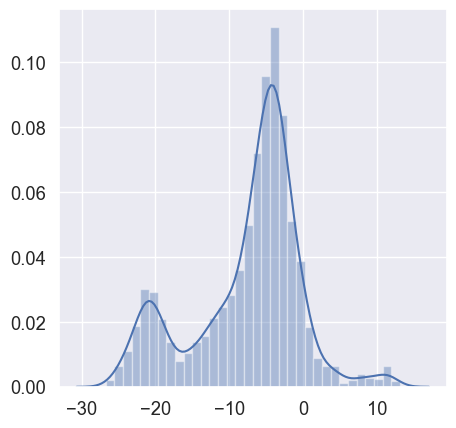

In [674]:
plt.figure(figsize=(5,5))
sns.distplot(model_28.fittedvalues);

### Prediction on Train set

In [675]:
y_predict_train = model_28.predict(X_train)
y_predict_train

662     1.710273e-02
1373    3.356349e-05
3268    5.499508e-09
3246    7.919211e-10
1456    1.962262e-03
            ...     
1130    2.475005e-05
1294    1.818726e-02
860     2.334149e-01
3507    1.148624e-03
3174    1.272921e-02
Length: 2402, dtype: float64

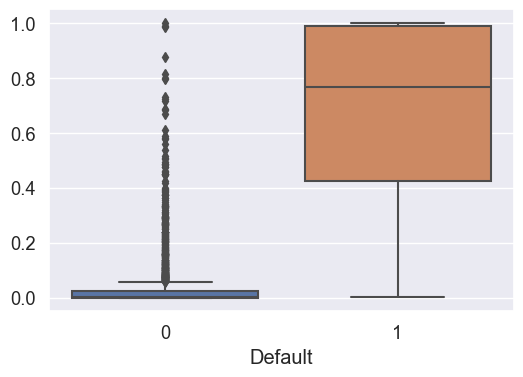

In [676]:
sns.boxplot(x=Default['default'],y=y_predict_train)
plt.xlabel('Default');

From the above boxplot, we need to decide on one such value of a cut-off which will give us the most reasonable descriptive power of the model. Let us take a cut-off of 0.07 and check.

Let us now see the predicted classes

In [677]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

### Checking the accuracy of the model using confusion matrix for training set

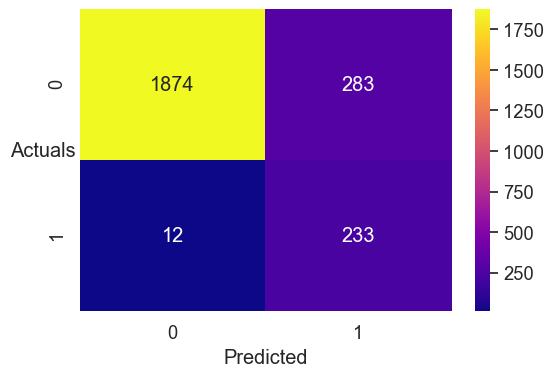

In [678]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [679]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1874 
False Positives: 283 
False Negatives: 12 
True Positives: 233


In [680]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.994     0.869     0.927      2157
           1      0.452     0.951     0.612       245

    accuracy                          0.877      2402
   macro avg      0.723     0.910     0.770      2402
weighted avg      0.938     0.877     0.895      2402



As observed above, accuracy of the model i.e. %overall correct predictions is 87%
Sensitivity of the model is 95% i.e. 95% of those defaulted were correctly identified as defaulters by the model

In [681]:
lr_metrics=classification_report(y_train, y_class_pred,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.45
lr_train_recall  0.95
lr_train_f1  0.61


In [682]:
#Train Data Accuracy
from sklearn.metrics import accuracy_score 
lr_train_acc= accuracy_score(y_train, y_class_pred)
lr_train_acc

0.8771856786011657

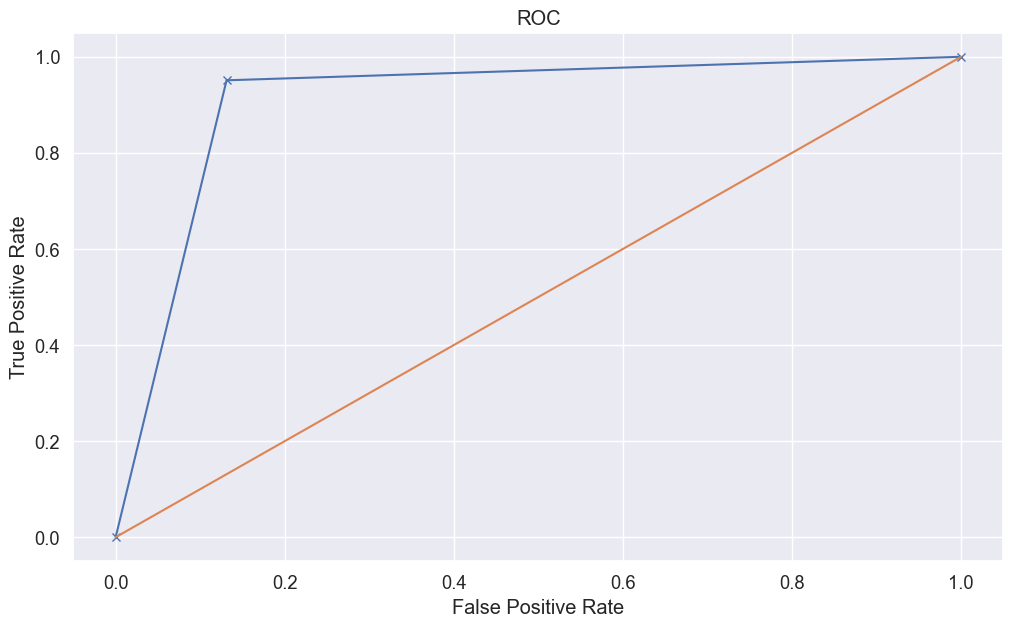

Area under Curve is 0.9099098331961435


In [683]:
#from sklearn.metrics import roc_curve,roc_auc_score
lr_train_fpr, lr_train_tpr,_= roc_curve(y_train,y_class_pred)
plt.figure(figsize=(12,7))
plt.plot(lr_train_fpr,lr_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lr_train_auc = roc_auc_score(y_train,y_class_pred)
print('Area under Curve is', lr_train_auc)

### Prediction on Test set

In [684]:
y_predict_test = model_28.predict(X_test)
y_predict_test

3163    0.078424
3133    0.001393
937     0.049526
196     0.879474
2852    0.047817
          ...   
2953    0.008938
3116    0.000358
1010    0.000106
1292    0.021722
2130    0.000219
Length: 1184, dtype: float64

In [685]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

### Checking the accuracy of the model using confusion matrix for test set

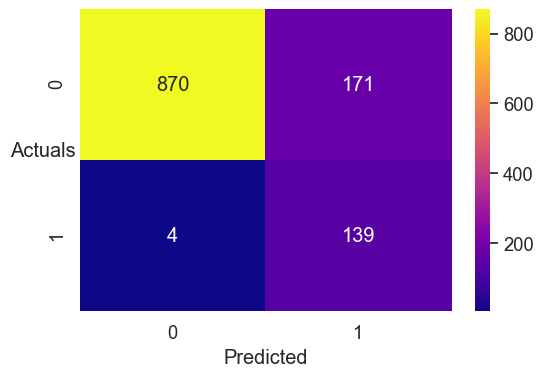

In [686]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [687]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 870 
False Positives: 171 
False Negatives: 4 
True Positives: 139


In [688]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.995     0.836     0.909      1041
           1      0.448     0.972     0.614       143

    accuracy                          0.852      1184
   macro avg      0.722     0.904     0.761      1184
weighted avg      0.929     0.852     0.873      1184



As observed above, accuracy of the model i.e. %overall correct predictions is 85%
Sensitivity of the model is 97% i.e. 97% of those defaulted were correctly identified as defaulters by the model

From the train and test data accuracy it can be concluded that the model created is a decent model which has good accuracy and sensitivity 
and which is neither overfitted nor underfitted.

In [689]:
#Test Data Accuracy
lr_test_acc= accuracy_score(y_test, y_class_pred)
lr_test_acc

0.8521959459459459

In [690]:
lr_metrics=classification_report(y_test, y_class_pred,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.45
lr_test_recall  0.97
lr_test_f1  0.61


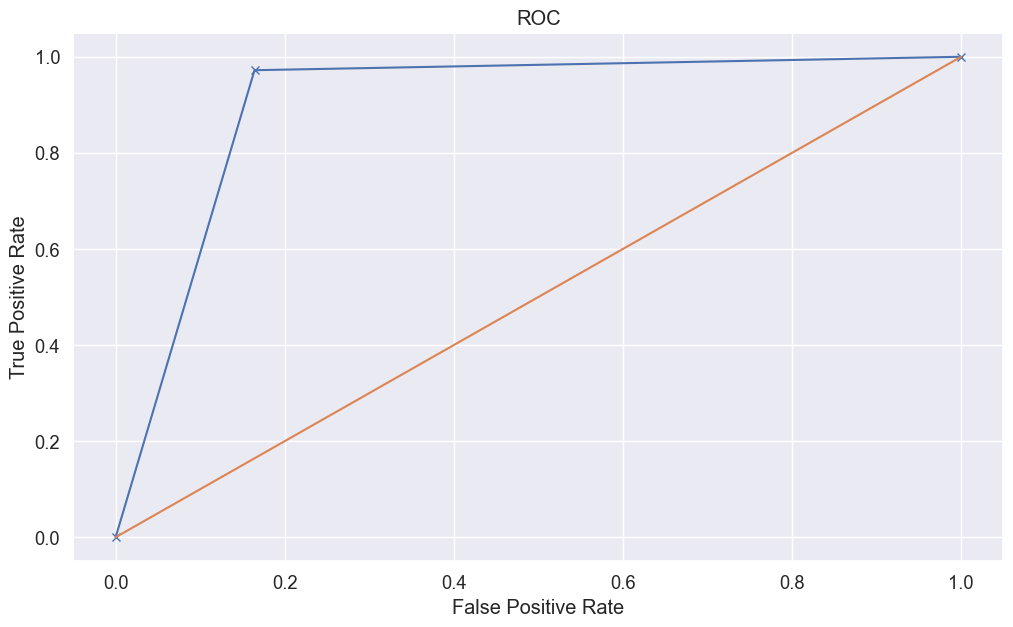

Area under Curve is 0.9038814211724875


In [691]:
#from sklearn.metrics import roc_curve,roc_auc_score
lr_test_fpr, lr_test_tpr,_= roc_curve(y_test,y_class_pred)
plt.figure(figsize=(12,7))
plt.plot(lr_test_fpr,lr_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lr_test_auc = roc_auc_score(y_test,y_class_pred)
print('Area under Curve is', lr_test_auc)

### 1.8 Build a Random Forest Model on Train Dataset

In [692]:
X_train.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Net_Working_Capital', 'Other_Income',
       'Selling_Cost', 'Adjusted_PAT', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIT_perc', 'ROG_CP_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'CPM_perc_Latest',
       'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Days', 'Value_of_Output_by_Tot

In [693]:
X_train = X_train[['Equity_Paid_Up','Total_Debt','Book_Value_Unit_Curr','Cash_Flow_From_Operating_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest','Debtors_Ratio_Latest','PBIDTM_perc_Latest','Debtors_Velocity_Days']]
X_test =  X_test[['Equity_Paid_Up','Total_Debt','Book_Value_Unit_Curr','Cash_Flow_From_Operating_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest','Debtors_Ratio_Latest','PBIDTM_perc_Latest','Debtors_Velocity_Days']]

In [694]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3],
    'max_features': [3],
    'min_samples_leaf': [10],
    'min_samples_split': [20],
    'n_estimators': [150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10, n_jobs= 7, verbose = 1)

In [695]:
X_train.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Book_Value_Unit_Curr',
       'Cash_Flow_From_Operating_Activities', 'ROG_Net_Worth_perc',
       'Current_Ratio_Latest', 'Debtors_Ratio_Latest', 'PBIDTM_perc_Latest',
       'Debtors_Velocity_Days'],
      dtype='object')

In [696]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   8 out of  10 | elapsed:   23.9s remaining:    5.9s
[Parallel(n_jobs=7)]: Done  10 out of  10 | elapsed:   24.1s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=7,
             param_grid={'max_depth': [3], 'max_features': [3],
                         'min_samples_leaf': [10], 'min_samples_split': [20],
                         'n_estimators': [150]},
             verbose=1)

In [697]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 150}

In [698]:
best_grid = grid_search.best_estimator_

In [699]:
best_grid

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=150)

In [700]:
ytrain_predict = best_grid.predict(X_train)

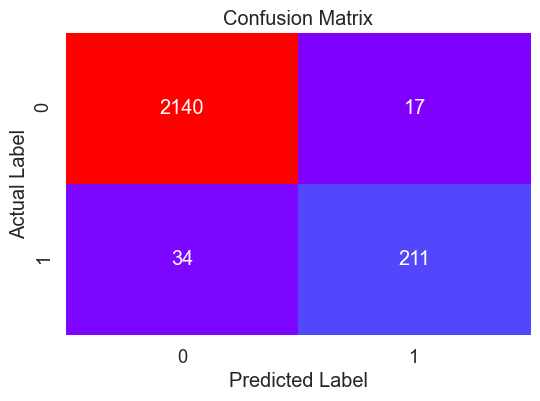

In [701]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [702]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2157
           1       0.93      0.86      0.89       245

    accuracy                           0.98      2402
   macro avg       0.95      0.93      0.94      2402
weighted avg       0.98      0.98      0.98      2402



In [703]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.93
rf_train_recall  0.86
rf_train_f1  0.89


In [704]:
#Train Data Accuracy
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.9787676935886761

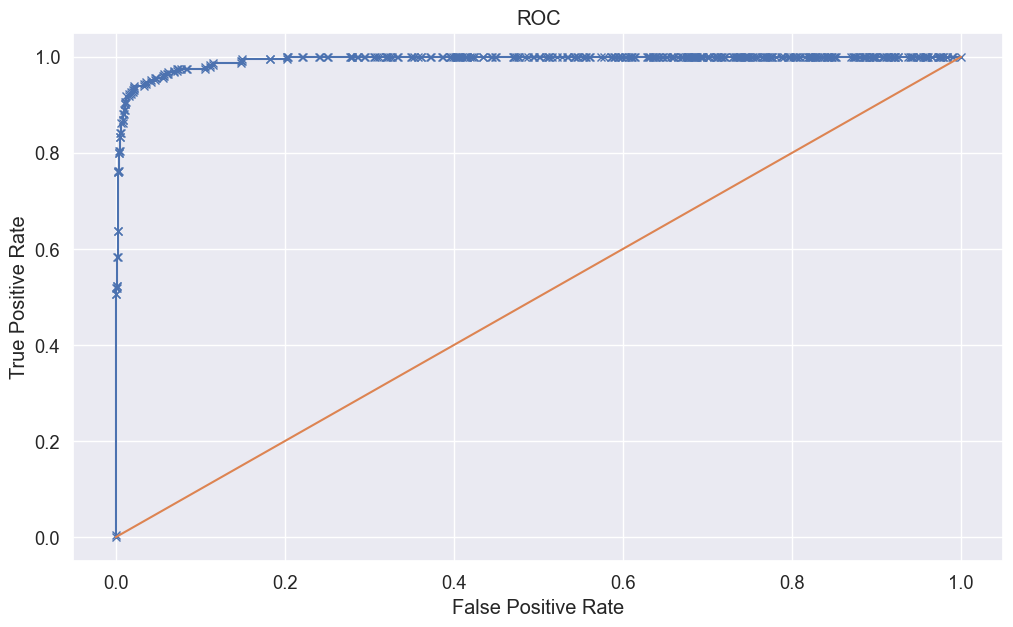

Area under Curve is 0.9266715865762161


In [705]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_train_fpr,rf_train_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_train_auc = roc_auc_score(y_train,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

### 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices

In [706]:
ytest_predict = best_grid.predict(X_test)

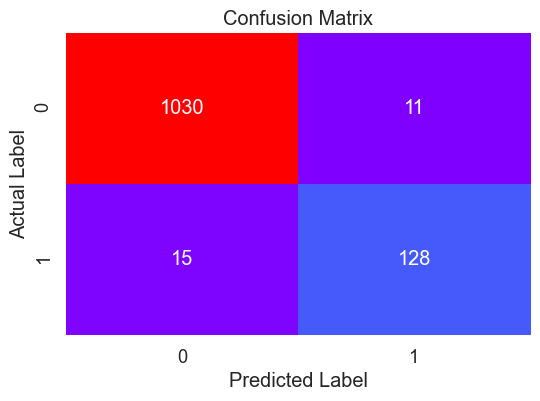

In [707]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [708]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.92      0.90      0.91       143

    accuracy                           0.98      1184
   macro avg       0.95      0.94      0.95      1184
weighted avg       0.98      0.98      0.98      1184



In [709]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.92
rf_test_recall  0.9
rf_test_f1  0.91


In [710]:
#Test Data Accuracy
rf_test_acc=best_grid.score(X_test,y_test) 
rf_test_acc

0.9780405405405406

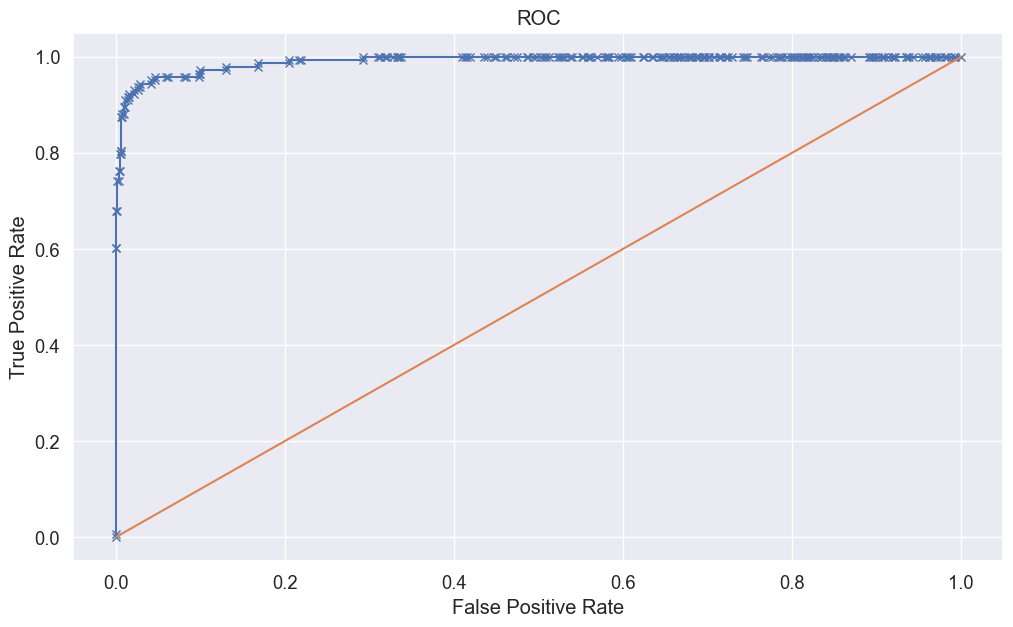

Area under Curve is 0.9422690661883745


In [711]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_test_fpr,rf_test_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_test_auc = roc_auc_score(y_test,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

### 1.10 Build an LDA Model on Train Dataset

In [712]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDAM = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.0001,0.0002,0.0003]
}

gsLDAM = GridSearchCV(LDAM, param_grid = lda_param_grid, scoring="accuracy", n_jobs= 7, verbose = 1, cv = 10)

In [713]:
gsLDAM.fit(X_train, y_train)
lda_model_tun = gsLDAM.best_estimator_
lda_model_tun
gsLDAM.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    1.0s finished


{'solver': 'svd', 'tol': 0.0001}

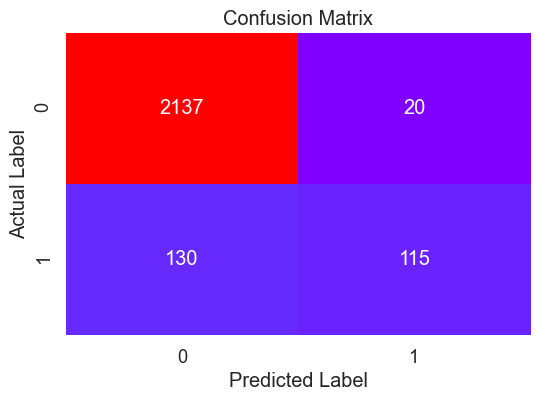

In [714]:
## Performance Matrix on train data set
y_train_predict = lda_model_tun.predict(X_train)
confusion_matrix(y_train,y_train_predict)
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [715]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2157
           1       0.85      0.47      0.61       245

    accuracy                           0.94      2402
   macro avg       0.90      0.73      0.79      2402
weighted avg       0.93      0.94      0.93      2402



In [716]:
lda_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.85
lda_train_recall  0.47
lda_train_f1  0.61


In [717]:
#Train Data Accuracy
lda_train_acc=lda_model_tun.score(X_test,y_test) 
lda_train_acc

0.9206081081081081

AUC: 0.946


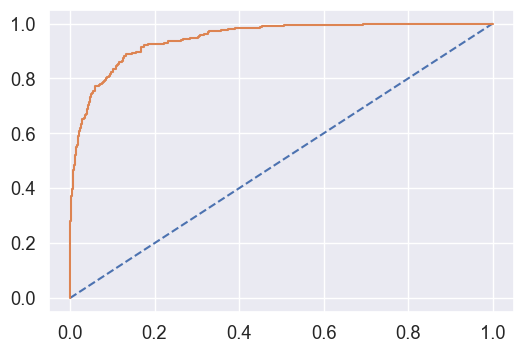

In [718]:
#AUC and ROC for the training data
# predict probabilities
probs = lda_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tun_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

### 1.11 Validate the LDA Model on test Dataset and state the performance matrices

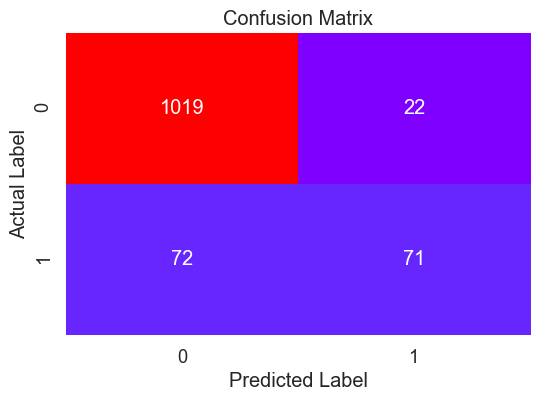

In [719]:
## Performance Matrix on test data set
y_test_predict = lda_model_tun.predict(X_test)
confusion_matrix(y_test,y_test_predict)
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [720]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1041
           1       0.76      0.50      0.60       143

    accuracy                           0.92      1184
   macro avg       0.85      0.74      0.78      1184
weighted avg       0.91      0.92      0.91      1184



In [721]:
lda_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.76
lda_test_recall  0.5
lda_test_f1  0.6


In [722]:
#Test Data Accuracy
lda_test_acc=lda_model_tun.score(X_test,y_test) 
lda_test_acc

0.9206081081081081

AUC: 0.946


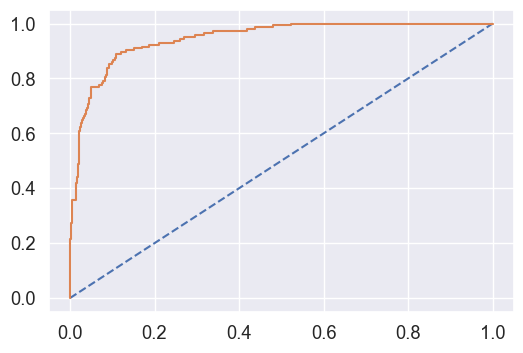

In [723]:
# AUC and ROC for the test data
# predict probabilities
probs = lda_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tun_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

### 1.12 Compare the performances of all the three models (include ROC Curve)

In [724]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'LDA Train':[lda_train_acc,lda_tun_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_tun_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

LR Train  LR Test  RF Train  RF Test  LDA Train  LDA Test
Accuracy       0.88     0.85      0.98     0.98       0.92      0.92
AUC            0.91     0.90      0.93     0.94       0.95      0.95
Recall         0.95     0.97      0.86     0.90       0.47      0.50
Precision      0.45     0.45      0.93     0.92       0.85      0.76
F1 Score       0.61     0.61      0.89     0.91       0.61      0.60

### ROC Curve for all the basic models on the Training data

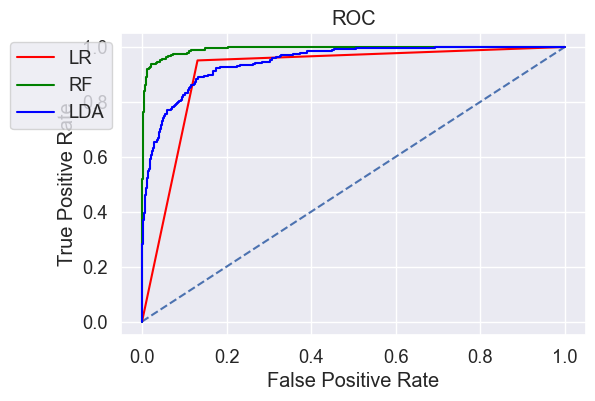

In [725]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the basic models on the Test data

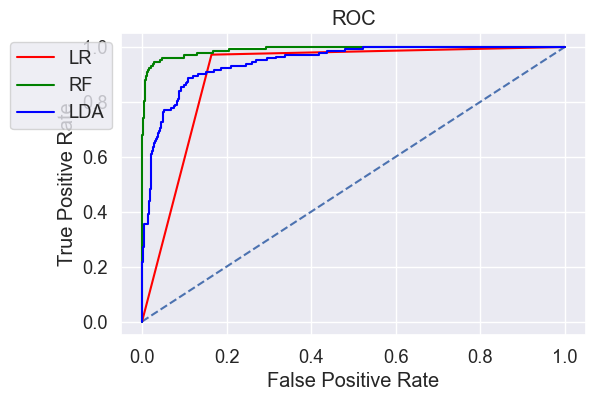

In [726]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### 1.13 Recommendation

### 2.1 Draw Stock Price Chart for any 2 variables

In [727]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [728]:
import os
os.chdir('G:/greatlearning/Project/FRA')
os.getcwd()

'G:\\greatlearning\\Project\\FRA'

In [729]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

Date  Infosys  Indian Hotel  Mahindra & Mahindra  Axis Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree Cement  Sun Pharma  Jindal Steel  Idea Vodafone  Jet Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [730]:
stock_prices.columns = stock_prices.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

In [731]:
stock_prices.head()

Date  Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank  SAIL  \
0  31-03-2014      264            69                  455        263    68   
1  07-04-2014      257            68                  458        276    70   
2  14-04-2014      254            68                  454        270    68   
3  21-04-2014      253            68                  488        283    68   
4  28-04-2014      256            65                  482        282    63   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0          5543         555           298             83          278  
1          5728         610           279             84          303  
2          5649         607           279             83          280  
3          5692         604           274             83          282  
4          5582         611           238             79          243

In [732]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [733]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [734]:
stock_prices.describe()

Infosys  Indian_Hotel  Mahindra_&_Mahindra   Axis_Bank        SAIL  \
count  314.000000    314.000000           314.000000  314.000000  314.000000   
mean   511.340764    114.560510           636.678344  540.742038   59.095541   
std    135.952051     22.509732           102.879975  115.835569   15.810493   
min    234.000000     64.000000           284.000000  263.000000   21.000000   
25%    424.000000     96.000000           572.000000  470.500000   47.000000   
50%    466.500000    115.000000           625.000000  528.000000   57.000000   
75%    630.750000    134.000000           678.000000  605.250000   71.750000   
max    810.000000    157.000000           956.000000  808.000000  104.000000   

       Shree_Cement   Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
count    314.000000   314.000000    314.000000     314.000000   314.000000  
mean   14806.410828   633.468153    147.627389      53.713376   372.659236  
std     4288.275085   171.855893     65.879195      31.248985   202.262668  
min     5543.000000   338.000000     53.000000       3.000000    14.000000  
25%    10952.250000   478.500000     88.250000      25.250000   243.250000  
50%    16018.500000   614.000000    142.500000      53.000000   376.000000  
75%    17773.250000   785.000000    182.750000      82.000000   534.000000  
max    24806.000000  1089.000000    338.000000     117.000000   871.000000

### Lets us plot & see price trend over time for different companies

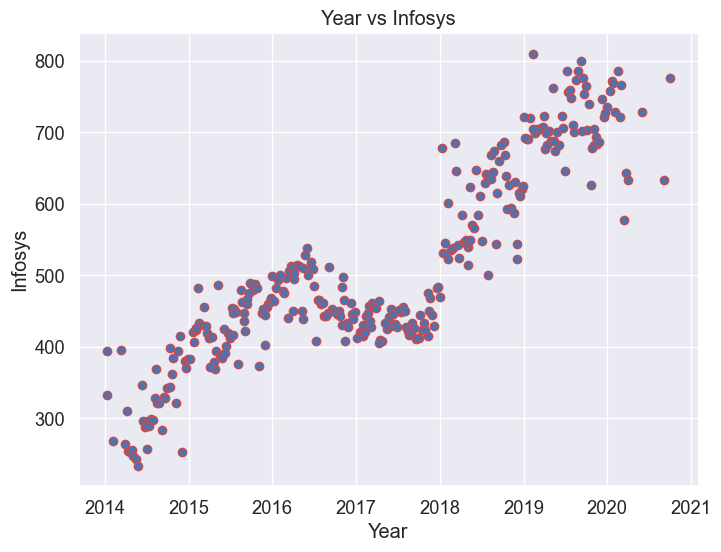

In [743]:
plt.figure(figsize = (8, 6))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Infosys')

plt.show()

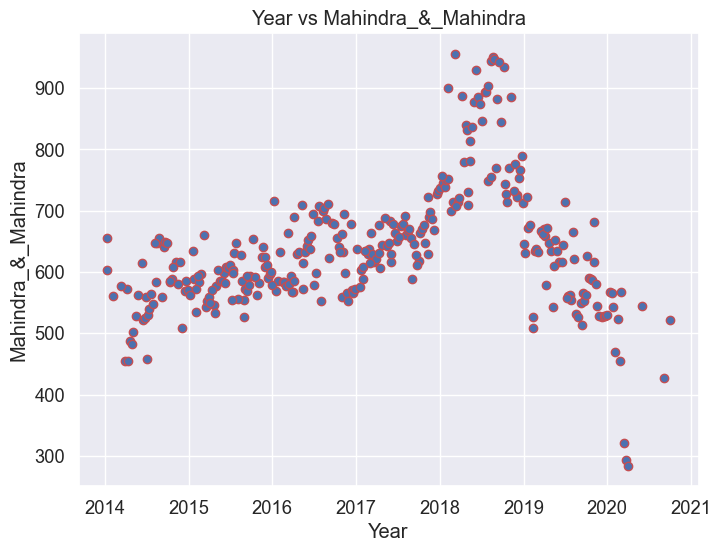

In [744]:
plt.figure(figsize = (8, 6))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Year vs Mahindra_&_Mahindra')
plt.show()

### 2.2 Calculate Returns

Steps for calculating returns from prices:<br>

Take logarithms<br>
Take differences

In [737]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [738]:
stock_returns.shape

(314, 10)

In [739]:
stock_returns.head()

Infosys  Indian_Hotel  Mahindra_&_Mahindra  Axis_Bank      SAIL  \
0       NaN           NaN                  NaN        NaN       NaN   
1 -0.026873     -0.014599             0.006572   0.048247  0.028988   
2 -0.011742      0.000000            -0.008772  -0.021979 -0.028988   
3 -0.003945      0.000000             0.072218   0.047025  0.000000   
4  0.011788     -0.045120            -0.012371  -0.003540 -0.076373   

   Shree_Cement  Sun_Pharma  Jindal_Steel  Idea_Vodafone  Jet_Airways  
0           NaN         NaN           NaN            NaN          NaN  
1      0.032831    0.094491     -0.065882       0.011976     0.086112  
2     -0.013888   -0.004930      0.000000      -0.011976    -0.078943  
3      0.007583   -0.004955     -0.018084       0.000000     0.007117  
4     -0.019515    0.011523     -0.140857      -0.049393    -0.148846

### 2.3 Calculate Stock Means and Standard Deviation

Stock Means: Average returns that the stock is making on a week to week basis<br>
Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

### Calculating stock means

In [740]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

### Calculating stock standard deviation

In [741]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

### 2.4 Draw a plot of Stock Means vs Standard Deviation and share insights

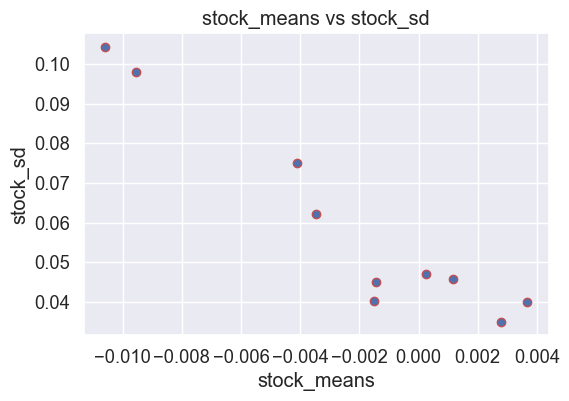

In [742]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

### Insights

1. Stock with a lower mean & higher standard deviation do not play a role in a portfolio that has competing stock with more returns & less risk. Thus we can keep the following stocks out of our portfolio which have negetive returns with high volatality.<br>
    1) Idea_Vodafone         
    2) Jet_Airways           
    3) Jindal_Steel        
    4) SAIL   


2. If we are choosing high returns with low risk then Shree Cement looks ideal.

3. If we are choosing moderate returns with very low risk then Infosys looks good.

4. Axis bank and Indian Hotels fall in the category of low returns and low risk.

## END